### Imports and Setups

In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from os.path import join
import seaborn as sns
import pandas as pd

from build_features import load_moons, load_concentric
from utils import euclidian, plot_plain_separator
from model_selection import run_model_selection, load_model

use_tunned = False

### Load dataframe

Generate a sample dataset with few superposition for test. This dataset is supposed to be the correct one, without error on label acquisition.

In [41]:
x_train, x_test, y_train, y_test = load_concentric(noise=0.00, samples=1000, factor=0.1)
x_test = np.vstack([x_train, x_test])
y_test = np.concatenate([y_train, y_test])
data_test = pd.DataFrame(x_test, columns=['x1', 'x2'])
data_test['class'] = y_test

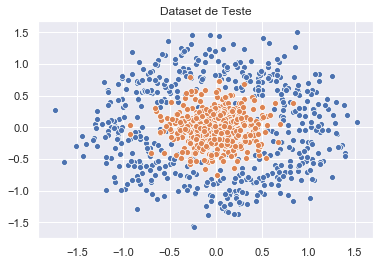

In [42]:
sns.set()
ax_1 = sns.scatterplot(x=x_test[y_test == 0,0], y=x_test[y_test == 0,1])
ax_2 = sns.scatterplot(x=x_test[y_test == 1,0], y=x_test[y_test == 1,1])
plt.title("Dataset de Teste")
plt.show()

Generate a noisy dataset for training. The noise is to simmulate an error on the label acquisition process.

In [43]:
x_train, x_test, y_train, y_test = load_concentric(noise=0.16, samples=200, factor=0.3)
x_train = np.vstack([x_train, x_test])
y_train = np.concatenate([y_train, y_test])
y_backup = y_train.copy()

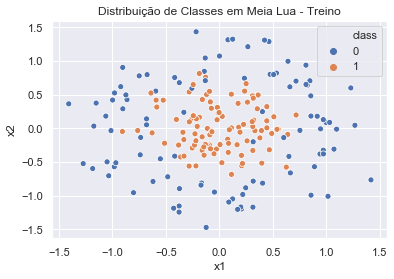

In [44]:
data_train = pd.DataFrame(x_train, columns=['x1', 'x2'])
data_train['class'] = y_train

sns.set()
sns.scatterplot(x='x1', y='x2', hue='class', data=data_train)
plt.title('Distribuição de Classes em Meia Lua - Treino')
plt.show()

### (Optional) Run hyperparameter tuning using grid search

In [ ]:
if False:
    cls = run_model_selection(x_train, y_train)
    best = cls.best_params_
    use_tunned = True

## Run training on noisy dataset without relabeling

In [51]:
if use_tunned:
    mlp = clf
else:
    mlp = load_model()

mlp.fit(x_train, y_train)


Iteration 1, loss = 0.69974918
Iteration 2, loss = 0.69780402
Iteration 3, loss = 0.69590741
Iteration 4, loss = 0.69405713
Iteration 5, loss = 0.69225429
Iteration 6, loss = 0.69049819
Iteration 7, loss = 0.68878573
Iteration 8, loss = 0.68711764
Iteration 9, loss = 0.68549476
Iteration 10, loss = 0.68391352
Iteration 11, loss = 0.68236866
Iteration 12, loss = 0.68086061
Iteration 13, loss = 0.67938761
Iteration 14, loss = 0.67794522
Iteration 15, loss = 0.67653183
Iteration 16, loss = 0.67514779
Iteration 17, loss = 0.67379243
Iteration 18, loss = 0.67246523
Iteration 19, loss = 0.67116183
Iteration 20, loss = 0.66988266
Iteration 21, loss = 0.66863330
Iteration 22, loss = 0.66740369
Iteration 23, loss = 0.66619402
Iteration 24, loss = 0.66500140
Iteration 25, loss = 0.66382753
Iteration 26, loss = 0.66266329
Iteration 27, loss = 0.66150781
Iteration 28, loss = 0.66036268
Iteration 29, loss = 0.65922756
Iteration 30, loss = 0.65809827
Iteration 31, loss = 0.65697393
Iteration 32, los

Iteration 287, loss = 0.34528832
Iteration 288, loss = 0.34452622
Iteration 289, loss = 0.34376903
Iteration 290, loss = 0.34301720
Iteration 291, loss = 0.34227086
Iteration 292, loss = 0.34152919
Iteration 293, loss = 0.34079280
Iteration 294, loss = 0.34006160
Iteration 295, loss = 0.33933542
Iteration 296, loss = 0.33861445
Iteration 297, loss = 0.33789828
Iteration 298, loss = 0.33718682
Iteration 299, loss = 0.33648017
Iteration 300, loss = 0.33577776
Iteration 301, loss = 0.33508020
Iteration 302, loss = 0.33438678
Iteration 303, loss = 0.33369755
Iteration 304, loss = 0.33301334
Iteration 305, loss = 0.33233394
Iteration 306, loss = 0.33165885
Iteration 307, loss = 0.33098851
Iteration 308, loss = 0.33032207
Iteration 309, loss = 0.32966043
Iteration 310, loss = 0.32900322
Iteration 311, loss = 0.32835022
Iteration 312, loss = 0.32770164
Iteration 313, loss = 0.32705780
Iteration 314, loss = 0.32641821
Iteration 315, loss = 0.32578308
Iteration 316, loss = 0.32515291
Iteration 

Iteration 592, loss = 0.24483299
Iteration 593, loss = 0.24472011
Iteration 594, loss = 0.24460860
Iteration 595, loss = 0.24449704
Iteration 596, loss = 0.24438565
Iteration 597, loss = 0.24427473
Iteration 598, loss = 0.24416513
Iteration 599, loss = 0.24405835
Iteration 600, loss = 0.24395220
Iteration 601, loss = 0.24384682
Iteration 602, loss = 0.24374172
Iteration 603, loss = 0.24363698
Iteration 604, loss = 0.24353399
Iteration 605, loss = 0.24343137
Iteration 606, loss = 0.24332866
Iteration 607, loss = 0.24322668
Iteration 608, loss = 0.24312682
Iteration 609, loss = 0.24302690
Iteration 610, loss = 0.24292676
Iteration 611, loss = 0.24282794
Iteration 612, loss = 0.24272954
Iteration 613, loss = 0.24263151
Iteration 614, loss = 0.24253443
Iteration 615, loss = 0.24243693
Iteration 616, loss = 0.24234093
Iteration 617, loss = 0.24224550
Iteration 618, loss = 0.24214986
Iteration 619, loss = 0.24205481
Iteration 620, loss = 0.24196086
Iteration 621, loss = 0.24186641
Iteration 

Iteration 897, loss = 0.22718598
Iteration 898, loss = 0.22715854
Iteration 899, loss = 0.22713073
Iteration 900, loss = 0.22710498
Iteration 901, loss = 0.22707928
Iteration 902, loss = 0.22705284
Iteration 903, loss = 0.22702708
Iteration 904, loss = 0.22700141
Iteration 905, loss = 0.22697568
Iteration 906, loss = 0.22695057
Iteration 907, loss = 0.22692559
Iteration 908, loss = 0.22690017
Iteration 909, loss = 0.22687393
Iteration 910, loss = 0.22684895
Iteration 911, loss = 0.22682347
Iteration 912, loss = 0.22679861
Iteration 913, loss = 0.22677354
Iteration 914, loss = 0.22674834
Iteration 915, loss = 0.22672329
Iteration 916, loss = 0.22669920
Iteration 917, loss = 0.22667417
Iteration 918, loss = 0.22664877
Iteration 919, loss = 0.22662385
Iteration 920, loss = 0.22659927
Iteration 921, loss = 0.22657489
Iteration 922, loss = 0.22655065
Iteration 923, loss = 0.22652658
Iteration 924, loss = 0.22650192
Iteration 925, loss = 0.22647715
Iteration 926, loss = 0.22645261
Iteration 

Iteration 1199, loss = 0.22187914
Iteration 1200, loss = 0.22186560
Iteration 1201, loss = 0.22185109
Iteration 1202, loss = 0.22183865
Iteration 1203, loss = 0.22182562
Iteration 1204, loss = 0.22181251
Iteration 1205, loss = 0.22179941
Iteration 1206, loss = 0.22178664
Iteration 1207, loss = 0.22177437
Iteration 1208, loss = 0.22176170
Iteration 1209, loss = 0.22174963
Iteration 1210, loss = 0.22173659
Iteration 1211, loss = 0.22172412
Iteration 1212, loss = 0.22171250
Iteration 1213, loss = 0.22170013
Iteration 1214, loss = 0.22168676
Iteration 1215, loss = 0.22167527
Iteration 1216, loss = 0.22166336
Iteration 1217, loss = 0.22165065
Iteration 1218, loss = 0.22163847
Iteration 1219, loss = 0.22162596
Iteration 1220, loss = 0.22161387
Iteration 1221, loss = 0.22160192
Iteration 1222, loss = 0.22158942
Iteration 1223, loss = 0.22157831
Iteration 1224, loss = 0.22156608
Iteration 1225, loss = 0.22155337
Iteration 1226, loss = 0.22154104
Iteration 1227, loss = 0.22152868
Iteration 1228

Iteration 1500, loss = 0.21806415
Iteration 1501, loss = 0.21805798
Iteration 1502, loss = 0.21805085
Iteration 1503, loss = 0.21804415
Iteration 1504, loss = 0.21803788
Iteration 1505, loss = 0.21803198
Iteration 1506, loss = 0.21802514
Iteration 1507, loss = 0.21801839
Iteration 1508, loss = 0.21801160
Iteration 1509, loss = 0.21800533
Iteration 1510, loss = 0.21799854
Iteration 1511, loss = 0.21799200
Iteration 1512, loss = 0.21798700
Iteration 1513, loss = 0.21797917
Iteration 1514, loss = 0.21797279
Iteration 1515, loss = 0.21796692
Iteration 1516, loss = 0.21796051
Iteration 1517, loss = 0.21795559
Iteration 1518, loss = 0.21795055
Iteration 1519, loss = 0.21794385
Iteration 1520, loss = 0.21793748
Iteration 1521, loss = 0.21793110
Iteration 1522, loss = 0.21792508
Iteration 1523, loss = 0.21791962
Iteration 1524, loss = 0.21791493
Iteration 1525, loss = 0.21790704
Iteration 1526, loss = 0.21790136
Iteration 1527, loss = 0.21789359
Iteration 1528, loss = 0.21788535
Iteration 1529

Iteration 1817, loss = 0.21482742
Iteration 1818, loss = 0.21482208
Iteration 1819, loss = 0.21481707
Iteration 1820, loss = 0.21481248
Iteration 1821, loss = 0.21480673
Iteration 1822, loss = 0.21480189
Iteration 1823, loss = 0.21479677
Iteration 1824, loss = 0.21479192
Iteration 1825, loss = 0.21478687
Iteration 1826, loss = 0.21478329
Iteration 1827, loss = 0.21477884
Iteration 1828, loss = 0.21477265
Iteration 1829, loss = 0.21476827
Iteration 1830, loss = 0.21476296
Iteration 1831, loss = 0.21475811
Iteration 1832, loss = 0.21475268
Iteration 1833, loss = 0.21474599
Iteration 1834, loss = 0.21474062
Iteration 1835, loss = 0.21473582
Iteration 1836, loss = 0.21473233
Iteration 1837, loss = 0.21472658
Iteration 1838, loss = 0.21472243
Iteration 1839, loss = 0.21471895
Iteration 1840, loss = 0.21471265
Iteration 1841, loss = 0.21470905
Iteration 1842, loss = 0.21470454
Iteration 1843, loss = 0.21469929
Iteration 1844, loss = 0.21469556
Iteration 1845, loss = 0.21468889
Iteration 1846

Iteration 2119, loss = 0.21334886
Iteration 2120, loss = 0.21334264
Iteration 2121, loss = 0.21333838
Iteration 2122, loss = 0.21333378
Iteration 2123, loss = 0.21332972
Iteration 2124, loss = 0.21332404
Iteration 2125, loss = 0.21331843
Iteration 2126, loss = 0.21331533
Iteration 2127, loss = 0.21330874
Iteration 2128, loss = 0.21330353
Iteration 2129, loss = 0.21329993
Iteration 2130, loss = 0.21329594
Iteration 2131, loss = 0.21329181
Iteration 2132, loss = 0.21328575
Iteration 2133, loss = 0.21328143
Iteration 2134, loss = 0.21327637
Iteration 2135, loss = 0.21327232
Iteration 2136, loss = 0.21326635
Iteration 2137, loss = 0.21326214
Iteration 2138, loss = 0.21325727
Iteration 2139, loss = 0.21325112
Iteration 2140, loss = 0.21324563
Iteration 2141, loss = 0.21324152
Iteration 2142, loss = 0.21323696
Iteration 2143, loss = 0.21323077
Iteration 2144, loss = 0.21322696
Iteration 2145, loss = 0.21322220
Iteration 2146, loss = 0.21321686
Iteration 2147, loss = 0.21321151
Iteration 2148

Iteration 2421, loss = 0.21178744
Iteration 2422, loss = 0.21178199
Iteration 2423, loss = 0.21177726
Iteration 2424, loss = 0.21177008
Iteration 2425, loss = 0.21176362
Iteration 2426, loss = 0.21175715
Iteration 2427, loss = 0.21175168
Iteration 2428, loss = 0.21174723
Iteration 2429, loss = 0.21174028
Iteration 2430, loss = 0.21173402
Iteration 2431, loss = 0.21172783
Iteration 2432, loss = 0.21172125
Iteration 2433, loss = 0.21171489
Iteration 2434, loss = 0.21170743
Iteration 2435, loss = 0.21170217
Iteration 2436, loss = 0.21169617
Iteration 2437, loss = 0.21168851
Iteration 2438, loss = 0.21168296
Iteration 2439, loss = 0.21167776
Iteration 2440, loss = 0.21167205
Iteration 2441, loss = 0.21166524
Iteration 2442, loss = 0.21165712
Iteration 2443, loss = 0.21165157
Iteration 2444, loss = 0.21164733
Iteration 2445, loss = 0.21164003
Iteration 2446, loss = 0.21163449
Iteration 2447, loss = 0.21162753
Iteration 2448, loss = 0.21162029
Iteration 2449, loss = 0.21161478
Iteration 2450

Iteration 2731, loss = 0.20947646
Iteration 2732, loss = 0.20946490
Iteration 2733, loss = 0.20945183
Iteration 2734, loss = 0.20944198
Iteration 2735, loss = 0.20943029
Iteration 2736, loss = 0.20942075
Iteration 2737, loss = 0.20941542
Iteration 2738, loss = 0.20940922
Iteration 2739, loss = 0.20940008
Iteration 2740, loss = 0.20939108
Iteration 2741, loss = 0.20938439
Iteration 2742, loss = 0.20937717
Iteration 2743, loss = 0.20936958
Iteration 2744, loss = 0.20936148
Iteration 2745, loss = 0.20935314
Iteration 2746, loss = 0.20934478
Iteration 2747, loss = 0.20933793
Iteration 2748, loss = 0.20932932
Iteration 2749, loss = 0.20932196
Iteration 2750, loss = 0.20931384
Iteration 2751, loss = 0.20930829
Iteration 2752, loss = 0.20929941
Iteration 2753, loss = 0.20929125
Iteration 2754, loss = 0.20928330
Iteration 2755, loss = 0.20927631
Iteration 2756, loss = 0.20926859
Iteration 2757, loss = 0.20926018
Iteration 2758, loss = 0.20925262
Iteration 2759, loss = 0.20924606
Iteration 2760

Iteration 3011, loss = 0.20767087
Iteration 3012, loss = 0.20766634
Iteration 3013, loss = 0.20765883
Iteration 3014, loss = 0.20765189
Iteration 3015, loss = 0.20764834
Iteration 3016, loss = 0.20764275
Iteration 3017, loss = 0.20763649
Iteration 3018, loss = 0.20763157
Iteration 3019, loss = 0.20762672
Iteration 3020, loss = 0.20761975
Iteration 3021, loss = 0.20761333
Iteration 3022, loss = 0.20760886
Iteration 3023, loss = 0.20760315
Iteration 3024, loss = 0.20759901
Iteration 3025, loss = 0.20759100
Iteration 3026, loss = 0.20758337
Iteration 3027, loss = 0.20757821
Iteration 3028, loss = 0.20757200
Iteration 3029, loss = 0.20756502
Iteration 3030, loss = 0.20756042
Iteration 3031, loss = 0.20755688
Iteration 3032, loss = 0.20754948
Iteration 3033, loss = 0.20754440
Iteration 3034, loss = 0.20753739
Iteration 3035, loss = 0.20753364
Iteration 3036, loss = 0.20752641
Iteration 3037, loss = 0.20751862
Iteration 3038, loss = 0.20751507
Iteration 3039, loss = 0.20750920
Iteration 3040

Iteration 3273, loss = 0.20620601
Iteration 3274, loss = 0.20620108
Iteration 3275, loss = 0.20619562
Iteration 3276, loss = 0.20618899
Iteration 3277, loss = 0.20618188
Iteration 3278, loss = 0.20617507
Iteration 3279, loss = 0.20616685
Iteration 3280, loss = 0.20616199
Iteration 3281, loss = 0.20615723
Iteration 3282, loss = 0.20615105
Iteration 3283, loss = 0.20614526
Iteration 3284, loss = 0.20613848
Iteration 3285, loss = 0.20613475
Iteration 3286, loss = 0.20612791
Iteration 3287, loss = 0.20612215
Iteration 3288, loss = 0.20611492
Iteration 3289, loss = 0.20611187
Iteration 3290, loss = 0.20610562
Iteration 3291, loss = 0.20609873
Iteration 3292, loss = 0.20609186
Iteration 3293, loss = 0.20608605
Iteration 3294, loss = 0.20608138
Iteration 3295, loss = 0.20607565
Iteration 3296, loss = 0.20606760
Iteration 3297, loss = 0.20606325
Iteration 3298, loss = 0.20605915
Iteration 3299, loss = 0.20605320
Iteration 3300, loss = 0.20604662
Iteration 3301, loss = 0.20603829
Iteration 3302

Iteration 3553, loss = 0.20435488
Iteration 3554, loss = 0.20435185
Iteration 3555, loss = 0.20434511
Iteration 3556, loss = 0.20434042
Iteration 3557, loss = 0.20433646
Iteration 3558, loss = 0.20433111
Iteration 3559, loss = 0.20432650
Iteration 3560, loss = 0.20432152
Iteration 3561, loss = 0.20431661
Iteration 3562, loss = 0.20431160
Iteration 3563, loss = 0.20430862
Iteration 3564, loss = 0.20430375
Iteration 3565, loss = 0.20429853
Iteration 3566, loss = 0.20429556
Iteration 3567, loss = 0.20429150
Iteration 3568, loss = 0.20428508
Iteration 3569, loss = 0.20427965
Iteration 3570, loss = 0.20427621
Iteration 3571, loss = 0.20427207
Iteration 3572, loss = 0.20426750
Iteration 3573, loss = 0.20426141
Iteration 3574, loss = 0.20425661
Iteration 3575, loss = 0.20425502
Iteration 3576, loss = 0.20425079
Iteration 3577, loss = 0.20424370
Iteration 3578, loss = 0.20423868
Iteration 3579, loss = 0.20423643
Iteration 3580, loss = 0.20423403
Iteration 3581, loss = 0.20422893
Iteration 3582

Iteration 3849, loss = 0.20320829
Iteration 3850, loss = 0.20320285
Iteration 3851, loss = 0.20319411
Iteration 3852, loss = 0.20318305
Iteration 3853, loss = 0.20317390
Iteration 3854, loss = 0.20316615
Iteration 3855, loss = 0.20315949
Iteration 3856, loss = 0.20314893
Iteration 3857, loss = 0.20313768
Iteration 3858, loss = 0.20312914
Iteration 3859, loss = 0.20312151
Iteration 3860, loss = 0.20311298
Iteration 3861, loss = 0.20310334
Iteration 3862, loss = 0.20309331
Iteration 3863, loss = 0.20308517
Iteration 3864, loss = 0.20307744
Iteration 3865, loss = 0.20306950
Iteration 3866, loss = 0.20305993
Iteration 3867, loss = 0.20305193
Iteration 3868, loss = 0.20304488
Iteration 3869, loss = 0.20303608
Iteration 3870, loss = 0.20302990
Iteration 3871, loss = 0.20302132
Iteration 3872, loss = 0.20301102
Iteration 3873, loss = 0.20300538
Iteration 3874, loss = 0.20299708
Iteration 3875, loss = 0.20299047
Iteration 3876, loss = 0.20298393
Iteration 3877, loss = 0.20297420
Iteration 3878

Iteration 4151, loss = 0.20172654
Iteration 4152, loss = 0.20171938
Iteration 4153, loss = 0.20171266
Iteration 4154, loss = 0.20170398
Iteration 4155, loss = 0.20169342
Iteration 4156, loss = 0.20168850
Iteration 4157, loss = 0.20168126
Iteration 4158, loss = 0.20167157
Iteration 4159, loss = 0.20166596
Iteration 4160, loss = 0.20165990
Iteration 4161, loss = 0.20165608
Iteration 4162, loss = 0.20165030
Iteration 4163, loss = 0.20164359
Iteration 4164, loss = 0.20163743
Iteration 4165, loss = 0.20163254
Iteration 4166, loss = 0.20162673
Iteration 4167, loss = 0.20162132
Iteration 4168, loss = 0.20161516
Iteration 4169, loss = 0.20160649
Iteration 4170, loss = 0.20159958
Iteration 4171, loss = 0.20159581
Iteration 4172, loss = 0.20159006
Iteration 4173, loss = 0.20158434
Iteration 4174, loss = 0.20157957
Iteration 4175, loss = 0.20157473
Iteration 4176, loss = 0.20156997
Iteration 4177, loss = 0.20156804
Iteration 4178, loss = 0.20156289
Iteration 4179, loss = 0.20155492
Iteration 4180

Iteration 4451, loss = 0.20092166
Iteration 4452, loss = 0.20092146
Iteration 4453, loss = 0.20091910
Iteration 4454, loss = 0.20091838
Iteration 4455, loss = 0.20091545
Iteration 4456, loss = 0.20091399
Iteration 4457, loss = 0.20091293
Iteration 4458, loss = 0.20091223
Iteration 4459, loss = 0.20091157
Iteration 4460, loss = 0.20090995
Iteration 4461, loss = 0.20090429
Iteration 4462, loss = 0.20090323
Iteration 4463, loss = 0.20090560
Iteration 4464, loss = 0.20090579
Iteration 4465, loss = 0.20090280
Iteration 4466, loss = 0.20089630
Iteration 4467, loss = 0.20089141
Iteration 4468, loss = 0.20089308
Iteration 4469, loss = 0.20089160
Iteration 4470, loss = 0.20088725
Iteration 4471, loss = 0.20088702
Iteration 4472, loss = 0.20088697
Iteration 4473, loss = 0.20088445
Iteration 4474, loss = 0.20088191
Iteration 4475, loss = 0.20087948
Iteration 4476, loss = 0.20087854
Iteration 4477, loss = 0.20087828
Iteration 4478, loss = 0.20087544
Iteration 4479, loss = 0.20087110
Iteration 4480

Iteration 4756, loss = 0.20046364
Iteration 4757, loss = 0.20046203
Iteration 4758, loss = 0.20046217
Iteration 4759, loss = 0.20045903
Iteration 4760, loss = 0.20045866
Iteration 4761, loss = 0.20045873
Iteration 4762, loss = 0.20045579
Iteration 4763, loss = 0.20045618
Iteration 4764, loss = 0.20045553
Iteration 4765, loss = 0.20045407
Iteration 4766, loss = 0.20045270
Iteration 4767, loss = 0.20045148
Iteration 4768, loss = 0.20045377
Iteration 4769, loss = 0.20045310
Iteration 4770, loss = 0.20045053
Iteration 4771, loss = 0.20045065
Iteration 4772, loss = 0.20044782
Iteration 4773, loss = 0.20044940
Iteration 4774, loss = 0.20044949
Iteration 4775, loss = 0.20044676
Iteration 4776, loss = 0.20044303
Iteration 4777, loss = 0.20044171
Iteration 4778, loss = 0.20043813
Iteration 4779, loss = 0.20043383
Iteration 4780, loss = 0.20043429
Iteration 4781, loss = 0.20043316
Iteration 4782, loss = 0.20043008
Iteration 4783, loss = 0.20042906
Iteration 4784, loss = 0.20042979
Iteration 4785

Iteration 5062, loss = 0.20007072
Iteration 5063, loss = 0.20006951
Iteration 5064, loss = 0.20006706
Iteration 5065, loss = 0.20006492
Iteration 5066, loss = 0.20006478
Iteration 5067, loss = 0.20006320
Iteration 5068, loss = 0.20006223
Iteration 5069, loss = 0.20006042
Iteration 5070, loss = 0.20005745
Iteration 5071, loss = 0.20005564
Iteration 5072, loss = 0.20005613
Iteration 5073, loss = 0.20005573
Iteration 5074, loss = 0.20005484
Iteration 5075, loss = 0.20005193
Iteration 5076, loss = 0.20004940
Iteration 5077, loss = 0.20004839
Iteration 5078, loss = 0.20004761
Iteration 5079, loss = 0.20004627
Iteration 5080, loss = 0.20004357
Iteration 5081, loss = 0.20004236
Iteration 5082, loss = 0.20004121
Iteration 5083, loss = 0.20004156
Iteration 5084, loss = 0.20004036
Iteration 5085, loss = 0.20003798
Iteration 5086, loss = 0.20003880
Iteration 5087, loss = 0.20003626
Iteration 5088, loss = 0.20003683
Iteration 5089, loss = 0.20003560
Iteration 5090, loss = 0.20003028
Iteration 5091

Iteration 5348, loss = 0.19938472
Iteration 5349, loss = 0.19937771
Iteration 5350, loss = 0.19937230
Iteration 5351, loss = 0.19936571
Iteration 5352, loss = 0.19936113
Iteration 5353, loss = 0.19935762
Iteration 5354, loss = 0.19935339
Iteration 5355, loss = 0.19934867
Iteration 5356, loss = 0.19934399
Iteration 5357, loss = 0.19933841
Iteration 5358, loss = 0.19933378
Iteration 5359, loss = 0.19932602
Iteration 5360, loss = 0.19932241
Iteration 5361, loss = 0.19932088
Iteration 5362, loss = 0.19931346
Iteration 5363, loss = 0.19930627
Iteration 5364, loss = 0.19930259
Iteration 5365, loss = 0.19929885
Iteration 5366, loss = 0.19929159
Iteration 5367, loss = 0.19928664
Iteration 5368, loss = 0.19928385
Iteration 5369, loss = 0.19927805
Iteration 5370, loss = 0.19927205
Iteration 5371, loss = 0.19926744
Iteration 5372, loss = 0.19926330
Iteration 5373, loss = 0.19925930
Iteration 5374, loss = 0.19925455
Iteration 5375, loss = 0.19925127
Iteration 5376, loss = 0.19924742
Iteration 5377

Iteration 5654, loss = 0.19737683
Iteration 5655, loss = 0.19736934
Iteration 5656, loss = 0.19736046
Iteration 5657, loss = 0.19735176
Iteration 5658, loss = 0.19734381
Iteration 5659, loss = 0.19733456
Iteration 5660, loss = 0.19732124
Iteration 5661, loss = 0.19731184
Iteration 5662, loss = 0.19730352
Iteration 5663, loss = 0.19729453
Iteration 5664, loss = 0.19728505
Iteration 5665, loss = 0.19727664
Iteration 5666, loss = 0.19726792
Iteration 5667, loss = 0.19726185
Iteration 5668, loss = 0.19725102
Iteration 5669, loss = 0.19724193
Iteration 5670, loss = 0.19723479
Iteration 5671, loss = 0.19722474
Iteration 5672, loss = 0.19721284
Iteration 5673, loss = 0.19720386
Iteration 5674, loss = 0.19719688
Iteration 5675, loss = 0.19718811
Iteration 5676, loss = 0.19717738
Iteration 5677, loss = 0.19716512
Iteration 5678, loss = 0.19715929
Iteration 5679, loss = 0.19715185
Iteration 5680, loss = 0.19714156
Iteration 5681, loss = 0.19713097
Iteration 5682, loss = 0.19712474
Iteration 5683

Iteration 5962, loss = 0.19426286
Iteration 5963, loss = 0.19425135
Iteration 5964, loss = 0.19424192
Iteration 5965, loss = 0.19422821
Iteration 5966, loss = 0.19421910
Iteration 5967, loss = 0.19420945
Iteration 5968, loss = 0.19419830
Iteration 5969, loss = 0.19418665
Iteration 5970, loss = 0.19417923
Iteration 5971, loss = 0.19416900
Iteration 5972, loss = 0.19415362
Iteration 5973, loss = 0.19414119
Iteration 5974, loss = 0.19413022
Iteration 5975, loss = 0.19412134
Iteration 5976, loss = 0.19410915
Iteration 5977, loss = 0.19409626
Iteration 5978, loss = 0.19408820
Iteration 5979, loss = 0.19407998
Iteration 5980, loss = 0.19406986
Iteration 5981, loss = 0.19405490
Iteration 5982, loss = 0.19404502
Iteration 5983, loss = 0.19403393
Iteration 5984, loss = 0.19402139
Iteration 5985, loss = 0.19401172
Iteration 5986, loss = 0.19400089
Iteration 5987, loss = 0.19399151
Iteration 5988, loss = 0.19398173
Iteration 5989, loss = 0.19397083
Iteration 5990, loss = 0.19395713
Iteration 5991

Iteration 6252, loss = 0.19103224
Iteration 6253, loss = 0.19101709
Iteration 6254, loss = 0.19100743
Iteration 6255, loss = 0.19099757
Iteration 6256, loss = 0.19098464
Iteration 6257, loss = 0.19096941
Iteration 6258, loss = 0.19095735
Iteration 6259, loss = 0.19094524
Iteration 6260, loss = 0.19093306
Iteration 6261, loss = 0.19091993
Iteration 6262, loss = 0.19090495
Iteration 6263, loss = 0.19089024
Iteration 6264, loss = 0.19087883
Iteration 6265, loss = 0.19086639
Iteration 6266, loss = 0.19085482
Iteration 6267, loss = 0.19084611
Iteration 6268, loss = 0.19083600
Iteration 6269, loss = 0.19082366
Iteration 6270, loss = 0.19081180
Iteration 6271, loss = 0.19080058
Iteration 6272, loss = 0.19079236
Iteration 6273, loss = 0.19077788
Iteration 6274, loss = 0.19076593
Iteration 6275, loss = 0.19075434
Iteration 6276, loss = 0.19074180
Iteration 6277, loss = 0.19072960
Iteration 6278, loss = 0.19071667
Iteration 6279, loss = 0.19070520
Iteration 6280, loss = 0.19069915
Iteration 6281

Iteration 6553, loss = 0.18744579
Iteration 6554, loss = 0.18743775
Iteration 6555, loss = 0.18742355
Iteration 6556, loss = 0.18740926
Iteration 6557, loss = 0.18739606
Iteration 6558, loss = 0.18738251
Iteration 6559, loss = 0.18737004
Iteration 6560, loss = 0.18735523
Iteration 6561, loss = 0.18733871
Iteration 6562, loss = 0.18732813
Iteration 6563, loss = 0.18732100
Iteration 6564, loss = 0.18730550
Iteration 6565, loss = 0.18729255
Iteration 6566, loss = 0.18728341
Iteration 6567, loss = 0.18727566
Iteration 6568, loss = 0.18725886
Iteration 6569, loss = 0.18724409
Iteration 6570, loss = 0.18723358
Iteration 6571, loss = 0.18722237
Iteration 6572, loss = 0.18721125
Iteration 6573, loss = 0.18719683
Iteration 6574, loss = 0.18718236
Iteration 6575, loss = 0.18716901
Iteration 6576, loss = 0.18715562
Iteration 6577, loss = 0.18714225
Iteration 6578, loss = 0.18713355
Iteration 6579, loss = 0.18712063
Iteration 6580, loss = 0.18711053
Iteration 6581, loss = 0.18709566
Iteration 6582

Iteration 6846, loss = 0.18355650
Iteration 6847, loss = 0.18354440
Iteration 6848, loss = 0.18353517
Iteration 6849, loss = 0.18352279
Iteration 6850, loss = 0.18350762
Iteration 6851, loss = 0.18348956
Iteration 6852, loss = 0.18348146
Iteration 6853, loss = 0.18346936
Iteration 6854, loss = 0.18345239
Iteration 6855, loss = 0.18343729
Iteration 6856, loss = 0.18342436
Iteration 6857, loss = 0.18341242
Iteration 6858, loss = 0.18339336
Iteration 6859, loss = 0.18338243
Iteration 6860, loss = 0.18337176
Iteration 6861, loss = 0.18335980
Iteration 6862, loss = 0.18334552
Iteration 6863, loss = 0.18333436
Iteration 6864, loss = 0.18331929
Iteration 6865, loss = 0.18330412
Iteration 6866, loss = 0.18329259
Iteration 6867, loss = 0.18328014
Iteration 6868, loss = 0.18326406
Iteration 6869, loss = 0.18325066
Iteration 6870, loss = 0.18323633
Iteration 6871, loss = 0.18322272
Iteration 6872, loss = 0.18320916
Iteration 6873, loss = 0.18319620
Iteration 6874, loss = 0.18318475
Iteration 6875

Iteration 7142, loss = 0.17967549
Iteration 7143, loss = 0.17966876
Iteration 7144, loss = 0.17964936
Iteration 7145, loss = 0.17963726
Iteration 7146, loss = 0.17962431
Iteration 7147, loss = 0.17961217
Iteration 7148, loss = 0.17960040
Iteration 7149, loss = 0.17959201
Iteration 7150, loss = 0.17957812
Iteration 7151, loss = 0.17956181
Iteration 7152, loss = 0.17954604
Iteration 7153, loss = 0.17953562
Iteration 7154, loss = 0.17952591
Iteration 7155, loss = 0.17951193
Iteration 7156, loss = 0.17949969
Iteration 7157, loss = 0.17948593
Iteration 7158, loss = 0.17947489
Iteration 7159, loss = 0.17946470
Iteration 7160, loss = 0.17945270
Iteration 7161, loss = 0.17943611
Iteration 7162, loss = 0.17942514
Iteration 7163, loss = 0.17941137
Iteration 7164, loss = 0.17939483
Iteration 7165, loss = 0.17938306
Iteration 7166, loss = 0.17937156
Iteration 7167, loss = 0.17935693
Iteration 7168, loss = 0.17934060
Iteration 7169, loss = 0.17933020
Iteration 7170, loss = 0.17931764
Iteration 7171

Iteration 7439, loss = 0.17598845
Iteration 7440, loss = 0.17597625
Iteration 7441, loss = 0.17596227
Iteration 7442, loss = 0.17594885
Iteration 7443, loss = 0.17593667
Iteration 7444, loss = 0.17592603
Iteration 7445, loss = 0.17591265
Iteration 7446, loss = 0.17590051
Iteration 7447, loss = 0.17589245
Iteration 7448, loss = 0.17588039
Iteration 7449, loss = 0.17586580
Iteration 7450, loss = 0.17585258
Iteration 7451, loss = 0.17584488
Iteration 7452, loss = 0.17583284
Iteration 7453, loss = 0.17581964
Iteration 7454, loss = 0.17580684
Iteration 7455, loss = 0.17579274
Iteration 7456, loss = 0.17578462
Iteration 7457, loss = 0.17577621
Iteration 7458, loss = 0.17576558
Iteration 7459, loss = 0.17574837
Iteration 7460, loss = 0.17573223
Iteration 7461, loss = 0.17572496
Iteration 7462, loss = 0.17571470
Iteration 7463, loss = 0.17570086
Iteration 7464, loss = 0.17569098
Iteration 7465, loss = 0.17567511
Iteration 7466, loss = 0.17566330
Iteration 7467, loss = 0.17565169
Iteration 7468

Iteration 7734, loss = 0.17209162
Iteration 7735, loss = 0.17207695
Iteration 7736, loss = 0.17206935
Iteration 7737, loss = 0.17205717
Iteration 7738, loss = 0.17204430
Iteration 7739, loss = 0.17202736
Iteration 7740, loss = 0.17201723
Iteration 7741, loss = 0.17200589
Iteration 7742, loss = 0.17199366
Iteration 7743, loss = 0.17197931
Iteration 7744, loss = 0.17196571
Iteration 7745, loss = 0.17195182
Iteration 7746, loss = 0.17194558
Iteration 7747, loss = 0.17193019
Iteration 7748, loss = 0.17191852
Iteration 7749, loss = 0.17190570
Iteration 7750, loss = 0.17189421
Iteration 7751, loss = 0.17188854
Iteration 7752, loss = 0.17187391
Iteration 7753, loss = 0.17185745
Iteration 7754, loss = 0.17184615
Iteration 7755, loss = 0.17183515
Iteration 7756, loss = 0.17182200
Iteration 7757, loss = 0.17180383
Iteration 7758, loss = 0.17179498
Iteration 7759, loss = 0.17178307
Iteration 7760, loss = 0.17177599
Iteration 7761, loss = 0.17176088
Iteration 7762, loss = 0.17175022
Iteration 7763

Iteration 8028, loss = 0.16862149
Iteration 8029, loss = 0.16861010
Iteration 8030, loss = 0.16860215
Iteration 8031, loss = 0.16859024
Iteration 8032, loss = 0.16857848
Iteration 8033, loss = 0.16856528
Iteration 8034, loss = 0.16855590
Iteration 8035, loss = 0.16854362
Iteration 8036, loss = 0.16853650
Iteration 8037, loss = 0.16852828
Iteration 8038, loss = 0.16851897
Iteration 8039, loss = 0.16850502
Iteration 8040, loss = 0.16849361
Iteration 8041, loss = 0.16848093
Iteration 8042, loss = 0.16846897
Iteration 8043, loss = 0.16845731
Iteration 8044, loss = 0.16844838
Iteration 8045, loss = 0.16843792
Iteration 8046, loss = 0.16842723
Iteration 8047, loss = 0.16841455
Iteration 8048, loss = 0.16840324
Iteration 8049, loss = 0.16839626
Iteration 8050, loss = 0.16838467
Iteration 8051, loss = 0.16837502
Iteration 8052, loss = 0.16836321
Iteration 8053, loss = 0.16834927
Iteration 8054, loss = 0.16833788
Iteration 8055, loss = 0.16833072
Iteration 8056, loss = 0.16831950
Iteration 8057

Iteration 8322, loss = 0.16553903
Iteration 8323, loss = 0.16552710
Iteration 8324, loss = 0.16551551
Iteration 8325, loss = 0.16550286
Iteration 8326, loss = 0.16548868
Iteration 8327, loss = 0.16548255
Iteration 8328, loss = 0.16547292
Iteration 8329, loss = 0.16546419
Iteration 8330, loss = 0.16545016
Iteration 8331, loss = 0.16544030
Iteration 8332, loss = 0.16543106
Iteration 8333, loss = 0.16541957
Iteration 8334, loss = 0.16540786
Iteration 8335, loss = 0.16539839
Iteration 8336, loss = 0.16539214
Iteration 8337, loss = 0.16538325
Iteration 8338, loss = 0.16536893
Iteration 8339, loss = 0.16536013
Iteration 8340, loss = 0.16535198
Iteration 8341, loss = 0.16534215
Iteration 8342, loss = 0.16533455
Iteration 8343, loss = 0.16532339
Iteration 8344, loss = 0.16531533
Iteration 8345, loss = 0.16530364
Iteration 8346, loss = 0.16529067
Iteration 8347, loss = 0.16528635
Iteration 8348, loss = 0.16527901
Iteration 8349, loss = 0.16526625
Iteration 8350, loss = 0.16525090
Iteration 8351

Iteration 8616, loss = 0.16261037
Iteration 8617, loss = 0.16260065
Iteration 8618, loss = 0.16259153
Iteration 8619, loss = 0.16258491
Iteration 8620, loss = 0.16257716
Iteration 8621, loss = 0.16256272
Iteration 8622, loss = 0.16255053
Iteration 8623, loss = 0.16254134
Iteration 8624, loss = 0.16253656
Iteration 8625, loss = 0.16253184
Iteration 8626, loss = 0.16251943
Iteration 8627, loss = 0.16250568
Iteration 8628, loss = 0.16250050
Iteration 8629, loss = 0.16249531
Iteration 8630, loss = 0.16248610
Iteration 8631, loss = 0.16247505
Iteration 8632, loss = 0.16246197
Iteration 8633, loss = 0.16244833
Iteration 8634, loss = 0.16243757
Iteration 8635, loss = 0.16242830
Iteration 8636, loss = 0.16241982
Iteration 8637, loss = 0.16241844
Iteration 8638, loss = 0.16241028
Iteration 8639, loss = 0.16239669
Iteration 8640, loss = 0.16238496
Iteration 8641, loss = 0.16238047
Iteration 8642, loss = 0.16237207
Iteration 8643, loss = 0.16235945
Iteration 8644, loss = 0.16235561
Iteration 8645

Iteration 8907, loss = 0.16005783
Iteration 8908, loss = 0.16005213
Iteration 8909, loss = 0.16004394
Iteration 8910, loss = 0.16003376
Iteration 8911, loss = 0.16002500
Iteration 8912, loss = 0.16001803
Iteration 8913, loss = 0.16001020
Iteration 8914, loss = 0.16000157
Iteration 8915, loss = 0.15999447
Iteration 8916, loss = 0.15998815
Iteration 8917, loss = 0.15997480
Iteration 8918, loss = 0.15996323
Iteration 8919, loss = 0.15995770
Iteration 8920, loss = 0.15995345
Iteration 8921, loss = 0.15994483
Iteration 8922, loss = 0.15993386
Iteration 8923, loss = 0.15992997
Iteration 8924, loss = 0.15992255
Iteration 8925, loss = 0.15991378
Iteration 8926, loss = 0.15990397
Iteration 8927, loss = 0.15989925
Iteration 8928, loss = 0.15989431
Iteration 8929, loss = 0.15988504
Iteration 8930, loss = 0.15987401
Iteration 8931, loss = 0.15986482
Iteration 8932, loss = 0.15986282
Iteration 8933, loss = 0.15985341
Iteration 8934, loss = 0.15985025
Iteration 8935, loss = 0.15984269
Iteration 8936

Iteration 9197, loss = 0.15789832
Iteration 9198, loss = 0.15789795
Iteration 9199, loss = 0.15789023
Iteration 9200, loss = 0.15788137
Iteration 9201, loss = 0.15787455
Iteration 9202, loss = 0.15786730
Iteration 9203, loss = 0.15786013
Iteration 9204, loss = 0.15784966
Iteration 9205, loss = 0.15784817
Iteration 9206, loss = 0.15784090
Iteration 9207, loss = 0.15783504
Iteration 9208, loss = 0.15782745
Iteration 9209, loss = 0.15782453
Iteration 9210, loss = 0.15781248
Iteration 9211, loss = 0.15780164
Iteration 9212, loss = 0.15780071
Iteration 9213, loss = 0.15779757
Iteration 9214, loss = 0.15778588
Iteration 9215, loss = 0.15777676
Iteration 9216, loss = 0.15777312
Iteration 9217, loss = 0.15776623
Iteration 9218, loss = 0.15775954
Iteration 9219, loss = 0.15775311
Iteration 9220, loss = 0.15774647
Iteration 9221, loss = 0.15773532
Iteration 9222, loss = 0.15772955
Iteration 9223, loss = 0.15772547
Iteration 9224, loss = 0.15771911
Iteration 9225, loss = 0.15771011
Iteration 9226

Iteration 9497, loss = 0.15592616
Iteration 9498, loss = 0.15592034
Iteration 9499, loss = 0.15591538
Iteration 9500, loss = 0.15590978
Iteration 9501, loss = 0.15590223
Iteration 9502, loss = 0.15589531
Iteration 9503, loss = 0.15588540
Iteration 9504, loss = 0.15588351
Iteration 9505, loss = 0.15588025
Iteration 9506, loss = 0.15587338
Iteration 9507, loss = 0.15586912
Iteration 9508, loss = 0.15586560
Iteration 9509, loss = 0.15585901
Iteration 9510, loss = 0.15585082
Iteration 9511, loss = 0.15584894
Iteration 9512, loss = 0.15584090
Iteration 9513, loss = 0.15583184
Iteration 9514, loss = 0.15582548
Iteration 9515, loss = 0.15582237
Iteration 9516, loss = 0.15580994
Iteration 9517, loss = 0.15580762
Iteration 9518, loss = 0.15579963
Iteration 9519, loss = 0.15579151
Iteration 9520, loss = 0.15578652
Iteration 9521, loss = 0.15578151
Iteration 9522, loss = 0.15577688
Iteration 9523, loss = 0.15576643
Iteration 9524, loss = 0.15575745
Iteration 9525, loss = 0.15575306
Iteration 9526

Iteration 9801, loss = 0.15400670
Iteration 9802, loss = 0.15400106
Iteration 9803, loss = 0.15399236
Iteration 9804, loss = 0.15398350
Iteration 9805, loss = 0.15397428
Iteration 9806, loss = 0.15397319
Iteration 9807, loss = 0.15396260
Iteration 9808, loss = 0.15395661
Iteration 9809, loss = 0.15395121
Iteration 9810, loss = 0.15395112
Iteration 9811, loss = 0.15394318
Iteration 9812, loss = 0.15393438
Iteration 9813, loss = 0.15392327
Iteration 9814, loss = 0.15392013
Iteration 9815, loss = 0.15391706
Iteration 9816, loss = 0.15390980
Iteration 9817, loss = 0.15390047
Iteration 9818, loss = 0.15388917
Iteration 9819, loss = 0.15388459
Iteration 9820, loss = 0.15388101
Iteration 9821, loss = 0.15387374
Iteration 9822, loss = 0.15386383
Iteration 9823, loss = 0.15385895
Iteration 9824, loss = 0.15385294
Iteration 9825, loss = 0.15384323
Iteration 9826, loss = 0.15383879
Iteration 9827, loss = 0.15382933
Iteration 9828, loss = 0.15382725
Iteration 9829, loss = 0.15382110
Iteration 9830

Iteration 10101, loss = 0.15226102
Iteration 10102, loss = 0.15225173
Iteration 10103, loss = 0.15224329
Iteration 10104, loss = 0.15223904
Iteration 10105, loss = 0.15223059
Iteration 10106, loss = 0.15222805
Iteration 10107, loss = 0.15222098
Iteration 10108, loss = 0.15221433
Iteration 10109, loss = 0.15220728
Iteration 10110, loss = 0.15220244
Iteration 10111, loss = 0.15219382
Iteration 10112, loss = 0.15218756
Iteration 10113, loss = 0.15218559
Iteration 10114, loss = 0.15217854
Iteration 10115, loss = 0.15216941
Iteration 10116, loss = 0.15217070
Iteration 10117, loss = 0.15216484
Iteration 10118, loss = 0.15215730
Iteration 10119, loss = 0.15215217
Iteration 10120, loss = 0.15214884
Iteration 10121, loss = 0.15214429
Iteration 10122, loss = 0.15213436
Iteration 10123, loss = 0.15213502
Iteration 10124, loss = 0.15213267
Iteration 10125, loss = 0.15212525
Iteration 10126, loss = 0.15211828
Iteration 10127, loss = 0.15211001
Iteration 10128, loss = 0.15210578
Iteration 10129, los

Iteration 10392, loss = 0.15069129
Iteration 10393, loss = 0.15068962
Iteration 10394, loss = 0.15068496
Iteration 10395, loss = 0.15067731
Iteration 10396, loss = 0.15066757
Iteration 10397, loss = 0.15066692
Iteration 10398, loss = 0.15066318
Iteration 10399, loss = 0.15065448
Iteration 10400, loss = 0.15064687
Iteration 10401, loss = 0.15064168
Iteration 10402, loss = 0.15063568
Iteration 10403, loss = 0.15063271
Iteration 10404, loss = 0.15062372
Iteration 10405, loss = 0.15062016
Iteration 10406, loss = 0.15061862
Iteration 10407, loss = 0.15061357
Iteration 10408, loss = 0.15060940
Iteration 10409, loss = 0.15060183
Iteration 10410, loss = 0.15059578
Iteration 10411, loss = 0.15059234
Iteration 10412, loss = 0.15058354
Iteration 10413, loss = 0.15057851
Iteration 10414, loss = 0.15057579
Iteration 10415, loss = 0.15057611
Iteration 10416, loss = 0.15056977
Iteration 10417, loss = 0.15056106
Iteration 10418, loss = 0.15055733
Iteration 10419, loss = 0.15054522
Iteration 10420, los

Iteration 10688, loss = 0.14747017
Iteration 10689, loss = 0.14745830
Iteration 10690, loss = 0.14744433
Iteration 10691, loss = 0.14743072
Iteration 10692, loss = 0.14741360
Iteration 10693, loss = 0.14740116
Iteration 10694, loss = 0.14738711
Iteration 10695, loss = 0.14737856
Iteration 10696, loss = 0.14736275
Iteration 10697, loss = 0.14734728
Iteration 10698, loss = 0.14733889
Iteration 10699, loss = 0.14732308
Iteration 10700, loss = 0.14730336
Iteration 10701, loss = 0.14728608
Iteration 10702, loss = 0.14727553
Iteration 10703, loss = 0.14725741
Iteration 10704, loss = 0.14724435
Iteration 10705, loss = 0.14723169
Iteration 10706, loss = 0.14721222
Iteration 10707, loss = 0.14720127
Iteration 10708, loss = 0.14719015
Iteration 10709, loss = 0.14717103
Iteration 10710, loss = 0.14715467
Iteration 10711, loss = 0.14714688
Iteration 10712, loss = 0.14713432
Iteration 10713, loss = 0.14711961
Iteration 10714, loss = 0.14710557
Iteration 10715, loss = 0.14708850
Iteration 10716, los

Iteration 10990, loss = 0.14270749
Iteration 10991, loss = 0.14269501
Iteration 10992, loss = 0.14267401
Iteration 10993, loss = 0.14265507
Iteration 10994, loss = 0.14264188
Iteration 10995, loss = 0.14262599
Iteration 10996, loss = 0.14260687
Iteration 10997, loss = 0.14258798
Iteration 10998, loss = 0.14257598
Iteration 10999, loss = 0.14256202
Iteration 11000, loss = 0.14254262
Iteration 11001, loss = 0.14252235
Iteration 11002, loss = 0.14250665
Iteration 11003, loss = 0.14249342
Iteration 11004, loss = 0.14247511
Iteration 11005, loss = 0.14245218
Iteration 11006, loss = 0.14243523
Iteration 11007, loss = 0.14242581
Iteration 11008, loss = 0.14240463
Iteration 11009, loss = 0.14238552
Iteration 11010, loss = 0.14237014
Iteration 11011, loss = 0.14235653
Iteration 11012, loss = 0.14234087
Iteration 11013, loss = 0.14232400
Iteration 11014, loss = 0.14230471
Iteration 11015, loss = 0.14228392
Iteration 11016, loss = 0.14227021
Iteration 11017, loss = 0.14225078
Iteration 11018, los

Iteration 11287, loss = 0.13771818
Iteration 11288, loss = 0.13770357
Iteration 11289, loss = 0.13768480
Iteration 11290, loss = 0.13766765
Iteration 11291, loss = 0.13765464
Iteration 11292, loss = 0.13763611
Iteration 11293, loss = 0.13761445
Iteration 11294, loss = 0.13759728
Iteration 11295, loss = 0.13758357
Iteration 11296, loss = 0.13756942
Iteration 11297, loss = 0.13755152
Iteration 11298, loss = 0.13753501
Iteration 11299, loss = 0.13751881
Iteration 11300, loss = 0.13750372
Iteration 11301, loss = 0.13749046
Iteration 11302, loss = 0.13747140
Iteration 11303, loss = 0.13745611
Iteration 11304, loss = 0.13743260
Iteration 11305, loss = 0.13742374
Iteration 11306, loss = 0.13741340
Iteration 11307, loss = 0.13739414
Iteration 11308, loss = 0.13737609
Iteration 11309, loss = 0.13736029
Iteration 11310, loss = 0.13734530
Iteration 11311, loss = 0.13732881
Iteration 11312, loss = 0.13731173
Iteration 11313, loss = 0.13729176
Iteration 11314, loss = 0.13727442
Iteration 11315, los

Iteration 11579, loss = 0.13303708
Iteration 11580, loss = 0.13302114
Iteration 11581, loss = 0.13300287
Iteration 11582, loss = 0.13298210
Iteration 11583, loss = 0.13296748
Iteration 11584, loss = 0.13295276
Iteration 11585, loss = 0.13293641
Iteration 11586, loss = 0.13291689
Iteration 11587, loss = 0.13290604
Iteration 11588, loss = 0.13288750
Iteration 11589, loss = 0.13287691
Iteration 11590, loss = 0.13285672
Iteration 11591, loss = 0.13284356
Iteration 11592, loss = 0.13282939
Iteration 11593, loss = 0.13281597
Iteration 11594, loss = 0.13280421
Iteration 11595, loss = 0.13278671
Iteration 11596, loss = 0.13277041
Iteration 11597, loss = 0.13275360
Iteration 11598, loss = 0.13273981
Iteration 11599, loss = 0.13272231
Iteration 11600, loss = 0.13270218
Iteration 11601, loss = 0.13269079
Iteration 11602, loss = 0.13267955
Iteration 11603, loss = 0.13266672
Iteration 11604, loss = 0.13265252
Iteration 11605, loss = 0.13262812
Iteration 11606, loss = 0.13261296
Iteration 11607, los

Iteration 11873, loss = 0.12865360
Iteration 11874, loss = 0.12863693
Iteration 11875, loss = 0.12862459
Iteration 11876, loss = 0.12861119
Iteration 11877, loss = 0.12859730
Iteration 11878, loss = 0.12858334
Iteration 11879, loss = 0.12857328
Iteration 11880, loss = 0.12855901
Iteration 11881, loss = 0.12854336
Iteration 11882, loss = 0.12853124
Iteration 11883, loss = 0.12851711
Iteration 11884, loss = 0.12850356
Iteration 11885, loss = 0.12848068
Iteration 11886, loss = 0.12846763
Iteration 11887, loss = 0.12845456
Iteration 11888, loss = 0.12844246
Iteration 11889, loss = 0.12842932
Iteration 11890, loss = 0.12841349
Iteration 11891, loss = 0.12839794
Iteration 11892, loss = 0.12837792
Iteration 11893, loss = 0.12836893
Iteration 11894, loss = 0.12835952
Iteration 11895, loss = 0.12834609
Iteration 11896, loss = 0.12833101
Iteration 11897, loss = 0.12831512
Iteration 11898, loss = 0.12830002
Iteration 11899, loss = 0.12828750
Iteration 11900, loss = 0.12827349
Iteration 11901, los

Iteration 12167, loss = 0.12463268
Iteration 12168, loss = 0.12461540
Iteration 12169, loss = 0.12460721
Iteration 12170, loss = 0.12459542
Iteration 12171, loss = 0.12458429
Iteration 12172, loss = 0.12456732
Iteration 12173, loss = 0.12455734
Iteration 12174, loss = 0.12454866
Iteration 12175, loss = 0.12453143
Iteration 12176, loss = 0.12451693
Iteration 12177, loss = 0.12450419
Iteration 12178, loss = 0.12448668
Iteration 12179, loss = 0.12447395
Iteration 12180, loss = 0.12445837
Iteration 12181, loss = 0.12444566
Iteration 12182, loss = 0.12444246
Iteration 12183, loss = 0.12442904
Iteration 12184, loss = 0.12440965
Iteration 12185, loss = 0.12440078
Iteration 12186, loss = 0.12438473
Iteration 12187, loss = 0.12437229
Iteration 12188, loss = 0.12436013
Iteration 12189, loss = 0.12434720
Iteration 12190, loss = 0.12433208
Iteration 12191, loss = 0.12431701
Iteration 12192, loss = 0.12431357
Iteration 12193, loss = 0.12430185
Iteration 12194, loss = 0.12428166
Iteration 12195, los

Iteration 12465, loss = 0.12092987
Iteration 12466, loss = 0.12091597
Iteration 12467, loss = 0.12090772
Iteration 12468, loss = 0.12089515
Iteration 12469, loss = 0.12088016
Iteration 12470, loss = 0.12086696
Iteration 12471, loss = 0.12086224
Iteration 12472, loss = 0.12084640
Iteration 12473, loss = 0.12083196
Iteration 12474, loss = 0.12081431
Iteration 12475, loss = 0.12080868
Iteration 12476, loss = 0.12079733
Iteration 12477, loss = 0.12078291
Iteration 12478, loss = 0.12077330
Iteration 12479, loss = 0.12076717
Iteration 12480, loss = 0.12075952
Iteration 12481, loss = 0.12074779
Iteration 12482, loss = 0.12073155
Iteration 12483, loss = 0.12071424
Iteration 12484, loss = 0.12070456
Iteration 12485, loss = 0.12069194
Iteration 12486, loss = 0.12067963
Iteration 12487, loss = 0.12066411
Iteration 12488, loss = 0.12065662
Iteration 12489, loss = 0.12064823
Iteration 12490, loss = 0.12063497
Iteration 12491, loss = 0.12062245
Iteration 12492, loss = 0.12061014
Iteration 12493, los

Iteration 12769, loss = 0.11746435
Iteration 12770, loss = 0.11745543
Iteration 12771, loss = 0.11744497
Iteration 12772, loss = 0.11743219
Iteration 12773, loss = 0.11742293
Iteration 12774, loss = 0.11741338
Iteration 12775, loss = 0.11740488
Iteration 12776, loss = 0.11739169
Iteration 12777, loss = 0.11738108
Iteration 12778, loss = 0.11737324
Iteration 12779, loss = 0.11735973
Iteration 12780, loss = 0.11734825
Iteration 12781, loss = 0.11733898
Iteration 12782, loss = 0.11733417
Iteration 12783, loss = 0.11732042
Iteration 12784, loss = 0.11730487
Iteration 12785, loss = 0.11729648
Iteration 12786, loss = 0.11728540
Iteration 12787, loss = 0.11727729
Iteration 12788, loss = 0.11726187
Iteration 12789, loss = 0.11725047
Iteration 12790, loss = 0.11724319
Iteration 12791, loss = 0.11722582
Iteration 12792, loss = 0.11721735
Iteration 12793, loss = 0.11721164
Iteration 12794, loss = 0.11719405
Iteration 12795, loss = 0.11718930
Iteration 12796, loss = 0.11717845
Iteration 12797, los

Iteration 13071, loss = 0.11376811
Iteration 13072, loss = 0.11375193
Iteration 13073, loss = 0.11373140
Iteration 13074, loss = 0.11372300
Iteration 13075, loss = 0.11371440
Iteration 13076, loss = 0.11369697
Iteration 13077, loss = 0.11367994
Iteration 13078, loss = 0.11366386
Iteration 13079, loss = 0.11364917
Iteration 13080, loss = 0.11363421
Iteration 13081, loss = 0.11361488
Iteration 13082, loss = 0.11360431
Iteration 13083, loss = 0.11358841
Iteration 13084, loss = 0.11357221
Iteration 13085, loss = 0.11356088
Iteration 13086, loss = 0.11354083
Iteration 13087, loss = 0.11352553
Iteration 13088, loss = 0.11352080
Iteration 13089, loss = 0.11350501
Iteration 13090, loss = 0.11348899
Iteration 13091, loss = 0.11346936
Iteration 13092, loss = 0.11345514
Iteration 13093, loss = 0.11344524
Iteration 13094, loss = 0.11342833
Iteration 13095, loss = 0.11341074
Iteration 13096, loss = 0.11339177
Iteration 13097, loss = 0.11337428
Iteration 13098, loss = 0.11336333
Iteration 13099, los

Iteration 13366, loss = 0.10886518
Iteration 13367, loss = 0.10885549
Iteration 13368, loss = 0.10884384
Iteration 13369, loss = 0.10882846
Iteration 13370, loss = 0.10881725
Iteration 13371, loss = 0.10880546
Iteration 13372, loss = 0.10879029
Iteration 13373, loss = 0.10878090
Iteration 13374, loss = 0.10877138
Iteration 13375, loss = 0.10875992
Iteration 13376, loss = 0.10874996
Iteration 13377, loss = 0.10873603
Iteration 13378, loss = 0.10872299
Iteration 13379, loss = 0.10871492
Iteration 13380, loss = 0.10870345
Iteration 13381, loss = 0.10868990
Iteration 13382, loss = 0.10867576
Iteration 13383, loss = 0.10867044
Iteration 13384, loss = 0.10865954
Iteration 13385, loss = 0.10864778
Iteration 13386, loss = 0.10863356
Iteration 13387, loss = 0.10861480
Iteration 13388, loss = 0.10861334
Iteration 13389, loss = 0.10860231
Iteration 13390, loss = 0.10858191
Iteration 13391, loss = 0.10856856
Iteration 13392, loss = 0.10856450
Iteration 13393, loss = 0.10855490
Iteration 13394, los

Iteration 13668, loss = 0.10252428
Iteration 13669, loss = 0.10251071
Iteration 13670, loss = 0.10249363
Iteration 13671, loss = 0.10247652
Iteration 13672, loss = 0.10245098
Iteration 13673, loss = 0.10242865
Iteration 13674, loss = 0.10241286
Iteration 13675, loss = 0.10239492
Iteration 13676, loss = 0.10237800
Iteration 13677, loss = 0.10235772
Iteration 13678, loss = 0.10234416
Iteration 13679, loss = 0.10232556
Iteration 13680, loss = 0.10230575
Iteration 13681, loss = 0.10228849
Iteration 13682, loss = 0.10227194
Iteration 13683, loss = 0.10225414
Iteration 13684, loss = 0.10223072
Iteration 13685, loss = 0.10221233
Iteration 13686, loss = 0.10219452
Iteration 13687, loss = 0.10218852
Iteration 13688, loss = 0.10216707
Iteration 13689, loss = 0.10214535
Iteration 13690, loss = 0.10212558
Iteration 13691, loss = 0.10210927
Iteration 13692, loss = 0.10209982
Iteration 13693, loss = 0.10208568
Iteration 13694, loss = 0.10206564
Iteration 13695, loss = 0.10204641
Iteration 13696, los

Iteration 13968, loss = 0.09726335
Iteration 13969, loss = 0.09725514
Iteration 13970, loss = 0.09724328
Iteration 13971, loss = 0.09722982
Iteration 13972, loss = 0.09721614
Iteration 13973, loss = 0.09720455
Iteration 13974, loss = 0.09719364
Iteration 13975, loss = 0.09717897
Iteration 13976, loss = 0.09716543
Iteration 13977, loss = 0.09716050
Iteration 13978, loss = 0.09714523
Iteration 13979, loss = 0.09712447
Iteration 13980, loss = 0.09711714
Iteration 13981, loss = 0.09710694
Iteration 13982, loss = 0.09709296
Iteration 13983, loss = 0.09708132
Iteration 13984, loss = 0.09706796
Iteration 13985, loss = 0.09705591
Iteration 13986, loss = 0.09704307
Iteration 13987, loss = 0.09702672
Iteration 13988, loss = 0.09701291
Iteration 13989, loss = 0.09700145
Iteration 13990, loss = 0.09698976
Iteration 13991, loss = 0.09696792
Iteration 13992, loss = 0.09695919
Iteration 13993, loss = 0.09694994
Iteration 13994, loss = 0.09693307
Iteration 13995, loss = 0.09691755
Iteration 13996, los

Iteration 14273, loss = 0.09352688
Iteration 14274, loss = 0.09351680
Iteration 14275, loss = 0.09350766
Iteration 14276, loss = 0.09349841
Iteration 14277, loss = 0.09348452
Iteration 14278, loss = 0.09346839
Iteration 14279, loss = 0.09345935
Iteration 14280, loss = 0.09345136
Iteration 14281, loss = 0.09343610
Iteration 14282, loss = 0.09343136
Iteration 14283, loss = 0.09342070
Iteration 14284, loss = 0.09340862
Iteration 14285, loss = 0.09339546
Iteration 14286, loss = 0.09338497
Iteration 14287, loss = 0.09337456
Iteration 14288, loss = 0.09336005
Iteration 14289, loss = 0.09334609
Iteration 14290, loss = 0.09333587
Iteration 14291, loss = 0.09332352
Iteration 14292, loss = 0.09330920
Iteration 14293, loss = 0.09330119
Iteration 14294, loss = 0.09328947
Iteration 14295, loss = 0.09327402
Iteration 14296, loss = 0.09326778
Iteration 14297, loss = 0.09325745
Iteration 14298, loss = 0.09324361
Iteration 14299, loss = 0.09322500
Iteration 14300, loss = 0.09321829
Iteration 14301, los

Iteration 14575, loss = 0.09017768
Iteration 14576, loss = 0.09016974
Iteration 14577, loss = 0.09015822
Iteration 14578, loss = 0.09015150
Iteration 14579, loss = 0.09013978
Iteration 14580, loss = 0.09012546
Iteration 14581, loss = 0.09011322
Iteration 14582, loss = 0.09010262
Iteration 14583, loss = 0.09009299
Iteration 14584, loss = 0.09007870
Iteration 14585, loss = 0.09006745
Iteration 14586, loss = 0.09006339
Iteration 14587, loss = 0.09005269
Iteration 14588, loss = 0.09003744
Iteration 14589, loss = 0.09002966
Iteration 14590, loss = 0.09002047
Iteration 14591, loss = 0.09001164
Iteration 14592, loss = 0.08999400
Iteration 14593, loss = 0.08998273
Iteration 14594, loss = 0.08997589
Iteration 14595, loss = 0.08996523
Iteration 14596, loss = 0.08995638
Iteration 14597, loss = 0.08994677
Iteration 14598, loss = 0.08993258
Iteration 14599, loss = 0.08992335
Iteration 14600, loss = 0.08991554
Iteration 14601, loss = 0.08990429
Iteration 14602, loss = 0.08989219
Iteration 14603, los

Iteration 14879, loss = 0.08710897
Iteration 14880, loss = 0.08709824
Iteration 14881, loss = 0.08708699
Iteration 14882, loss = 0.08707584
Iteration 14883, loss = 0.08707038
Iteration 14884, loss = 0.08706128
Iteration 14885, loss = 0.08705303
Iteration 14886, loss = 0.08704029
Iteration 14887, loss = 0.08703242
Iteration 14888, loss = 0.08701634
Iteration 14889, loss = 0.08701380
Iteration 14890, loss = 0.08700524
Iteration 14891, loss = 0.08699424
Iteration 14892, loss = 0.08698262
Iteration 14893, loss = 0.08697041
Iteration 14894, loss = 0.08696202
Iteration 14895, loss = 0.08694972
Iteration 14896, loss = 0.08694205
Iteration 14897, loss = 0.08693309
Iteration 14898, loss = 0.08691794
Iteration 14899, loss = 0.08691148
Iteration 14900, loss = 0.08690366
Iteration 14901, loss = 0.08689320
Iteration 14902, loss = 0.08688595
Iteration 14903, loss = 0.08687423
Iteration 14904, loss = 0.08686482
Iteration 14905, loss = 0.08684918
Iteration 14906, loss = 0.08683893
Iteration 14907, los

Iteration 15182, loss = 0.08428833
Iteration 15183, loss = 0.08427670
Iteration 15184, loss = 0.08427122
Iteration 15185, loss = 0.08426513
Iteration 15186, loss = 0.08425183
Iteration 15187, loss = 0.08424623
Iteration 15188, loss = 0.08423765
Iteration 15189, loss = 0.08422632
Iteration 15190, loss = 0.08421774
Iteration 15191, loss = 0.08420600
Iteration 15192, loss = 0.08419293
Iteration 15193, loss = 0.08418793
Iteration 15194, loss = 0.08418354
Iteration 15195, loss = 0.08417426
Iteration 15196, loss = 0.08416122
Iteration 15197, loss = 0.08415703
Iteration 15198, loss = 0.08414824
Iteration 15199, loss = 0.08414067
Iteration 15200, loss = 0.08413414
Iteration 15201, loss = 0.08412530
Iteration 15202, loss = 0.08411552
Iteration 15203, loss = 0.08410444
Iteration 15204, loss = 0.08409836
Iteration 15205, loss = 0.08408780
Iteration 15206, loss = 0.08407847
Iteration 15207, loss = 0.08406937
Iteration 15208, loss = 0.08406052
Iteration 15209, loss = 0.08404773
Iteration 15210, los

Iteration 15475, loss = 0.08178628
Iteration 15476, loss = 0.08177875
Iteration 15477, loss = 0.08177164
Iteration 15478, loss = 0.08176336
Iteration 15479, loss = 0.08175399
Iteration 15480, loss = 0.08174204
Iteration 15481, loss = 0.08173198
Iteration 15482, loss = 0.08172791
Iteration 15483, loss = 0.08172215
Iteration 15484, loss = 0.08171173
Iteration 15485, loss = 0.08170068
Iteration 15486, loss = 0.08169431
Iteration 15487, loss = 0.08168842
Iteration 15488, loss = 0.08168204
Iteration 15489, loss = 0.08167566
Iteration 15490, loss = 0.08167115
Iteration 15491, loss = 0.08165772
Iteration 15492, loss = 0.08164720
Iteration 15493, loss = 0.08163628
Iteration 15494, loss = 0.08162439
Iteration 15495, loss = 0.08161495
Iteration 15496, loss = 0.08160773
Iteration 15497, loss = 0.08160380
Iteration 15498, loss = 0.08159627
Iteration 15499, loss = 0.08158715
Iteration 15500, loss = 0.08157705
Iteration 15501, loss = 0.08157034
Iteration 15502, loss = 0.08156109
Iteration 15503, los

Iteration 15770, loss = 0.07944919
Iteration 15771, loss = 0.07944237
Iteration 15772, loss = 0.07943286
Iteration 15773, loss = 0.07942868
Iteration 15774, loss = 0.07942000
Iteration 15775, loss = 0.07940995
Iteration 15776, loss = 0.07940364
Iteration 15777, loss = 0.07939507
Iteration 15778, loss = 0.07938746
Iteration 15779, loss = 0.07937686
Iteration 15780, loss = 0.07937303
Iteration 15781, loss = 0.07936509
Iteration 15782, loss = 0.07935848
Iteration 15783, loss = 0.07934734
Iteration 15784, loss = 0.07933952
Iteration 15785, loss = 0.07933151
Iteration 15786, loss = 0.07932396
Iteration 15787, loss = 0.07931544
Iteration 15788, loss = 0.07930679
Iteration 15789, loss = 0.07929979
Iteration 15790, loss = 0.07929154
Iteration 15791, loss = 0.07928533
Iteration 15792, loss = 0.07927916
Iteration 15793, loss = 0.07927049
Iteration 15794, loss = 0.07926192
Iteration 15795, loss = 0.07925603
Iteration 15796, loss = 0.07925001
Iteration 15797, loss = 0.07924246
Iteration 15798, los

Iteration 16062, loss = 0.07732545
Iteration 16063, loss = 0.07731620
Iteration 16064, loss = 0.07730534
Iteration 16065, loss = 0.07729898
Iteration 16066, loss = 0.07729204
Iteration 16067, loss = 0.07728537
Iteration 16068, loss = 0.07728430
Iteration 16069, loss = 0.07727420
Iteration 16070, loss = 0.07726769
Iteration 16071, loss = 0.07725612
Iteration 16072, loss = 0.07724900
Iteration 16073, loss = 0.07724192
Iteration 16074, loss = 0.07724070
Iteration 16075, loss = 0.07723747
Iteration 16076, loss = 0.07722615
Iteration 16077, loss = 0.07721812
Iteration 16078, loss = 0.07721095
Iteration 16079, loss = 0.07720281
Iteration 16080, loss = 0.07720135
Iteration 16081, loss = 0.07719045
Iteration 16082, loss = 0.07717931
Iteration 16083, loss = 0.07717622
Iteration 16084, loss = 0.07717048
Iteration 16085, loss = 0.07716241
Iteration 16086, loss = 0.07715844
Iteration 16087, loss = 0.07715341
Iteration 16088, loss = 0.07714624
Iteration 16089, loss = 0.07713921
Iteration 16090, los

Iteration 16354, loss = 0.07534683
Iteration 16355, loss = 0.07533984
Iteration 16356, loss = 0.07533356
Iteration 16357, loss = 0.07532661
Iteration 16358, loss = 0.07532171
Iteration 16359, loss = 0.07531526
Iteration 16360, loss = 0.07530943
Iteration 16361, loss = 0.07530024
Iteration 16362, loss = 0.07529405
Iteration 16363, loss = 0.07529005
Iteration 16364, loss = 0.07528394
Iteration 16365, loss = 0.07527515
Iteration 16366, loss = 0.07526771
Iteration 16367, loss = 0.07526527
Iteration 16368, loss = 0.07525348
Iteration 16369, loss = 0.07524673
Iteration 16370, loss = 0.07524094
Iteration 16371, loss = 0.07523595
Iteration 16372, loss = 0.07523320
Iteration 16373, loss = 0.07522717
Iteration 16374, loss = 0.07521704
Iteration 16375, loss = 0.07520691
Iteration 16376, loss = 0.07520613
Iteration 16377, loss = 0.07519763
Iteration 16378, loss = 0.07518817
Iteration 16379, loss = 0.07518239
Iteration 16380, loss = 0.07517860
Iteration 16381, loss = 0.07517526
Iteration 16382, los

Iteration 16645, loss = 0.07352542
Iteration 16646, loss = 0.07351684
Iteration 16647, loss = 0.07351367
Iteration 16648, loss = 0.07351217
Iteration 16649, loss = 0.07350286
Iteration 16650, loss = 0.07349765
Iteration 16651, loss = 0.07349147
Iteration 16652, loss = 0.07348760
Iteration 16653, loss = 0.07347981
Iteration 16654, loss = 0.07347417
Iteration 16655, loss = 0.07346697
Iteration 16656, loss = 0.07346102
Iteration 16657, loss = 0.07345193
Iteration 16658, loss = 0.07344568
Iteration 16659, loss = 0.07344388
Iteration 16660, loss = 0.07343739
Iteration 16661, loss = 0.07343099
Iteration 16662, loss = 0.07342741
Iteration 16663, loss = 0.07342357
Iteration 16664, loss = 0.07341308
Iteration 16665, loss = 0.07340777
Iteration 16666, loss = 0.07340068
Iteration 16667, loss = 0.07339794
Iteration 16668, loss = 0.07339214
Iteration 16669, loss = 0.07338492
Iteration 16670, loss = 0.07337985
Iteration 16671, loss = 0.07337260
Iteration 16672, loss = 0.07336402
Iteration 16673, los

Iteration 16943, loss = 0.07164386
Iteration 16944, loss = 0.07163722
Iteration 16945, loss = 0.07162962
Iteration 16946, loss = 0.07162239
Iteration 16947, loss = 0.07161554
Iteration 16948, loss = 0.07161284
Iteration 16949, loss = 0.07160219
Iteration 16950, loss = 0.07159445
Iteration 16951, loss = 0.07158292
Iteration 16952, loss = 0.07157330
Iteration 16953, loss = 0.07157205
Iteration 16954, loss = 0.07156524
Iteration 16955, loss = 0.07155461
Iteration 16956, loss = 0.07154765
Iteration 16957, loss = 0.07154441
Iteration 16958, loss = 0.07153840
Iteration 16959, loss = 0.07153012
Iteration 16960, loss = 0.07152112
Iteration 16961, loss = 0.07151399
Iteration 16962, loss = 0.07150834
Iteration 16963, loss = 0.07149692
Iteration 16964, loss = 0.07148698
Iteration 16965, loss = 0.07148503
Iteration 16966, loss = 0.07147778
Iteration 16967, loss = 0.07146816
Iteration 16968, loss = 0.07145842
Iteration 16969, loss = 0.07144871
Iteration 16970, loss = 0.07144467
Iteration 16971, los

Iteration 17243, loss = 0.06975129
Iteration 17244, loss = 0.06974344
Iteration 17245, loss = 0.06973973
Iteration 17246, loss = 0.06973509
Iteration 17247, loss = 0.06972449
Iteration 17248, loss = 0.06972099
Iteration 17249, loss = 0.06972107
Iteration 17250, loss = 0.06971583
Iteration 17251, loss = 0.06970763
Iteration 17252, loss = 0.06969933
Iteration 17253, loss = 0.06969919
Iteration 17254, loss = 0.06969426
Iteration 17255, loss = 0.06968751
Iteration 17256, loss = 0.06967888
Iteration 17257, loss = 0.06967364
Iteration 17258, loss = 0.06966807
Iteration 17259, loss = 0.06966161
Iteration 17260, loss = 0.06965285
Iteration 17261, loss = 0.06964712
Iteration 17262, loss = 0.06963872
Iteration 17263, loss = 0.06963464
Iteration 17264, loss = 0.06962479
Iteration 17265, loss = 0.06962102
Iteration 17266, loss = 0.06961623
Iteration 17267, loss = 0.06961246
Iteration 17268, loss = 0.06960653
Iteration 17269, loss = 0.06960222
Iteration 17270, loss = 0.06959517
Iteration 17271, los

Iteration 17544, loss = 0.06807537
Iteration 17545, loss = 0.06807300
Iteration 17546, loss = 0.06806629
Iteration 17547, loss = 0.06805838
Iteration 17548, loss = 0.06805022
Iteration 17549, loss = 0.06804382
Iteration 17550, loss = 0.06804087
Iteration 17551, loss = 0.06803771
Iteration 17552, loss = 0.06803380
Iteration 17553, loss = 0.06802541
Iteration 17554, loss = 0.06802165
Iteration 17555, loss = 0.06801522
Iteration 17556, loss = 0.06800864
Iteration 17557, loss = 0.06800233
Iteration 17558, loss = 0.06800378
Iteration 17559, loss = 0.06799695
Iteration 17560, loss = 0.06798116
Iteration 17561, loss = 0.06798247
Iteration 17562, loss = 0.06798058
Iteration 17563, loss = 0.06797532
Iteration 17564, loss = 0.06797156
Iteration 17565, loss = 0.06796434
Iteration 17566, loss = 0.06795685
Iteration 17567, loss = 0.06795549
Iteration 17568, loss = 0.06794909
Iteration 17569, loss = 0.06794245
Iteration 17570, loss = 0.06792999
Iteration 17571, loss = 0.06793191
Iteration 17572, los

Iteration 17855, loss = 0.06646414
Iteration 17856, loss = 0.06646228
Iteration 17857, loss = 0.06645515
Iteration 17858, loss = 0.06644720
Iteration 17859, loss = 0.06643866
Iteration 17860, loss = 0.06643474
Iteration 17861, loss = 0.06643771
Iteration 17862, loss = 0.06643259
Iteration 17863, loss = 0.06641806
Iteration 17864, loss = 0.06641981
Iteration 17865, loss = 0.06641943
Iteration 17866, loss = 0.06641255
Iteration 17867, loss = 0.06640155
Iteration 17868, loss = 0.06639748
Iteration 17869, loss = 0.06639906
Iteration 17870, loss = 0.06639391
Iteration 17871, loss = 0.06638264
Iteration 17872, loss = 0.06637761
Iteration 17873, loss = 0.06637266
Iteration 17874, loss = 0.06636704
Iteration 17875, loss = 0.06636459
Iteration 17876, loss = 0.06635694
Iteration 17877, loss = 0.06635549
Iteration 17878, loss = 0.06634995
Iteration 17879, loss = 0.06634284
Iteration 17880, loss = 0.06634004
Iteration 17881, loss = 0.06633542
Iteration 17882, loss = 0.06633071
Iteration 17883, los

Iteration 18165, loss = 0.06493614
Iteration 18166, loss = 0.06493322
Iteration 18167, loss = 0.06492895
Iteration 18168, loss = 0.06492279
Iteration 18169, loss = 0.06491958
Iteration 18170, loss = 0.06491306
Iteration 18171, loss = 0.06491193
Iteration 18172, loss = 0.06490542
Iteration 18173, loss = 0.06490179
Iteration 18174, loss = 0.06489576
Iteration 18175, loss = 0.06488992
Iteration 18176, loss = 0.06488486
Iteration 18177, loss = 0.06488567
Iteration 18178, loss = 0.06487638
Iteration 18179, loss = 0.06486536
Iteration 18180, loss = 0.06486403
Iteration 18181, loss = 0.06486031
Iteration 18182, loss = 0.06485358
Iteration 18183, loss = 0.06484928
Iteration 18184, loss = 0.06484549
Iteration 18185, loss = 0.06483671
Iteration 18186, loss = 0.06483333
Iteration 18187, loss = 0.06482958
Iteration 18188, loss = 0.06482131
Iteration 18189, loss = 0.06481867
Iteration 18190, loss = 0.06480937
Iteration 18191, loss = 0.06480754
Iteration 18192, loss = 0.06480330
Iteration 18193, los

Iteration 18459, loss = 0.06350678
Iteration 18460, loss = 0.06350642
Iteration 18461, loss = 0.06350290
Iteration 18462, loss = 0.06349522
Iteration 18463, loss = 0.06349094
Iteration 18464, loss = 0.06348552
Iteration 18465, loss = 0.06348177
Iteration 18466, loss = 0.06347927
Iteration 18467, loss = 0.06347309
Iteration 18468, loss = 0.06346269
Iteration 18469, loss = 0.06346212
Iteration 18470, loss = 0.06345930
Iteration 18471, loss = 0.06345544
Iteration 18472, loss = 0.06345075
Iteration 18473, loss = 0.06344557
Iteration 18474, loss = 0.06343723
Iteration 18475, loss = 0.06342749
Iteration 18476, loss = 0.06343155
Iteration 18477, loss = 0.06342938
Iteration 18478, loss = 0.06341935
Iteration 18479, loss = 0.06341783
Iteration 18480, loss = 0.06341397
Iteration 18481, loss = 0.06341280
Iteration 18482, loss = 0.06340936
Iteration 18483, loss = 0.06340318
Iteration 18484, loss = 0.06339629
Iteration 18485, loss = 0.06339398
Iteration 18486, loss = 0.06338646
Iteration 18487, los

Iteration 18753, loss = 0.06204619
Iteration 18754, loss = 0.06204022
Iteration 18755, loss = 0.06203093
Iteration 18756, loss = 0.06202310
Iteration 18757, loss = 0.06202037
Iteration 18758, loss = 0.06201238
Iteration 18759, loss = 0.06200813
Iteration 18760, loss = 0.06200361
Iteration 18761, loss = 0.06199780
Iteration 18762, loss = 0.06199214
Iteration 18763, loss = 0.06198566
Iteration 18764, loss = 0.06198127
Iteration 18765, loss = 0.06197187
Iteration 18766, loss = 0.06196789
Iteration 18767, loss = 0.06196449
Iteration 18768, loss = 0.06196012
Iteration 18769, loss = 0.06195244
Iteration 18770, loss = 0.06194986
Iteration 18771, loss = 0.06194304
Iteration 18772, loss = 0.06193513
Iteration 18773, loss = 0.06192664
Iteration 18774, loss = 0.06192273
Iteration 18775, loss = 0.06191699
Iteration 18776, loss = 0.06191565
Iteration 18777, loss = 0.06190973
Iteration 18778, loss = 0.06190423
Iteration 18779, loss = 0.06189648
Iteration 18780, loss = 0.06189280
Iteration 18781, los

Iteration 19046, loss = 0.06057348
Iteration 19047, loss = 0.06056938
Iteration 19048, loss = 0.06056485
Iteration 19049, loss = 0.06055788
Iteration 19050, loss = 0.06055242
Iteration 19051, loss = 0.06054581
Iteration 19052, loss = 0.06055028
Iteration 19053, loss = 0.06054576
Iteration 19054, loss = 0.06053572
Iteration 19055, loss = 0.06053241
Iteration 19056, loss = 0.06052790
Iteration 19057, loss = 0.06052508
Iteration 19058, loss = 0.06052088
Iteration 19059, loss = 0.06051477
Iteration 19060, loss = 0.06051068
Iteration 19061, loss = 0.06050491
Iteration 19062, loss = 0.06049996
Iteration 19063, loss = 0.06048967
Iteration 19064, loss = 0.06048864
Iteration 19065, loss = 0.06048497
Iteration 19066, loss = 0.06047957
Iteration 19067, loss = 0.06047535
Iteration 19068, loss = 0.06047093
Iteration 19069, loss = 0.06046756
Iteration 19070, loss = 0.06046640
Iteration 19071, loss = 0.06046442
Iteration 19072, loss = 0.06045639
Iteration 19073, loss = 0.06044897
Iteration 19074, los

Iteration 19342, loss = 0.05918435
Iteration 19343, loss = 0.05917931
Iteration 19344, loss = 0.05917391
Iteration 19345, loss = 0.05917062
Iteration 19346, loss = 0.05916398
Iteration 19347, loss = 0.05915670
Iteration 19348, loss = 0.05915198
Iteration 19349, loss = 0.05915663
Iteration 19350, loss = 0.05915137
Iteration 19351, loss = 0.05914078
Iteration 19352, loss = 0.05913659
Iteration 19353, loss = 0.05913337
Iteration 19354, loss = 0.05912617
Iteration 19355, loss = 0.05911847
Iteration 19356, loss = 0.05911449
Iteration 19357, loss = 0.05911066
Iteration 19358, loss = 0.05910341
Iteration 19359, loss = 0.05910175
Iteration 19360, loss = 0.05909759
Iteration 19361, loss = 0.05909312
Iteration 19362, loss = 0.05908807
Iteration 19363, loss = 0.05908625
Iteration 19364, loss = 0.05908103
Iteration 19365, loss = 0.05907725
Iteration 19366, loss = 0.05907087
Iteration 19367, loss = 0.05906393
Iteration 19368, loss = 0.05906194
Iteration 19369, loss = 0.05905528
Iteration 19370, los

Iteration 19635, loss = 0.05780384
Iteration 19636, loss = 0.05780358
Iteration 19637, loss = 0.05779822
Iteration 19638, loss = 0.05779449
Iteration 19639, loss = 0.05778573
Iteration 19640, loss = 0.05777583
Iteration 19641, loss = 0.05777270
Iteration 19642, loss = 0.05777148
Iteration 19643, loss = 0.05776899
Iteration 19644, loss = 0.05777020
Iteration 19645, loss = 0.05776410
Iteration 19646, loss = 0.05775558
Iteration 19647, loss = 0.05774762
Iteration 19648, loss = 0.05774511
Iteration 19649, loss = 0.05774621
Iteration 19650, loss = 0.05773800
Iteration 19651, loss = 0.05773541
Iteration 19652, loss = 0.05772904
Iteration 19653, loss = 0.05773195
Iteration 19654, loss = 0.05772840
Iteration 19655, loss = 0.05772264
Iteration 19656, loss = 0.05771871
Iteration 19657, loss = 0.05771142
Iteration 19658, loss = 0.05770236
Iteration 19659, loss = 0.05769042
Iteration 19660, loss = 0.05769505
Iteration 19661, loss = 0.05769493
Iteration 19662, loss = 0.05768469
Iteration 19663, los

Iteration 19928, loss = 0.05655206
Iteration 19929, loss = 0.05654848
Iteration 19930, loss = 0.05654291
Iteration 19931, loss = 0.05654008
Iteration 19932, loss = 0.05653757
Iteration 19933, loss = 0.05653174
Iteration 19934, loss = 0.05652595
Iteration 19935, loss = 0.05651586
Iteration 19936, loss = 0.05650901
Iteration 19937, loss = 0.05651543
Iteration 19938, loss = 0.05651369
Iteration 19939, loss = 0.05650145
Iteration 19940, loss = 0.05649848
Iteration 19941, loss = 0.05650180
Iteration 19942, loss = 0.05649999
Iteration 19943, loss = 0.05649260
Iteration 19944, loss = 0.05649088
Iteration 19945, loss = 0.05648832
Iteration 19946, loss = 0.05648057
Iteration 19947, loss = 0.05647318
Iteration 19948, loss = 0.05647095
Iteration 19949, loss = 0.05646678
Iteration 19950, loss = 0.05646249
Iteration 19951, loss = 0.05645854
Iteration 19952, loss = 0.05644661
Iteration 19953, loss = 0.05644738
Iteration 19954, loss = 0.05644876
Iteration 19955, loss = 0.05644300
Iteration 19956, los

Iteration 20221, loss = 0.05534969
Iteration 20222, loss = 0.05534478
Iteration 20223, loss = 0.05533904
Iteration 20224, loss = 0.05533519
Iteration 20225, loss = 0.05533639
Iteration 20226, loss = 0.05533245
Iteration 20227, loss = 0.05532565
Iteration 20228, loss = 0.05531826
Iteration 20229, loss = 0.05531929
Iteration 20230, loss = 0.05531652
Iteration 20231, loss = 0.05531240
Iteration 20232, loss = 0.05530675
Iteration 20233, loss = 0.05529947
Iteration 20234, loss = 0.05529588
Iteration 20235, loss = 0.05529214
Iteration 20236, loss = 0.05528467
Iteration 20237, loss = 0.05528182
Iteration 20238, loss = 0.05527814
Iteration 20239, loss = 0.05527450
Iteration 20240, loss = 0.05527368
Iteration 20241, loss = 0.05527000
Iteration 20242, loss = 0.05526784
Iteration 20243, loss = 0.05526452
Iteration 20244, loss = 0.05526268
Iteration 20245, loss = 0.05525536
Iteration 20246, loss = 0.05525052
Iteration 20247, loss = 0.05524595
Iteration 20248, loss = 0.05524158
Iteration 20249, los

Iteration 20512, loss = 0.05425935
Iteration 20513, loss = 0.05425756
Iteration 20514, loss = 0.05425708
Iteration 20515, loss = 0.05425628
Iteration 20516, loss = 0.05425392
Iteration 20517, loss = 0.05424579
Iteration 20518, loss = 0.05424236
Iteration 20519, loss = 0.05424008
Iteration 20520, loss = 0.05423449
Iteration 20521, loss = 0.05422666
Iteration 20522, loss = 0.05422646
Iteration 20523, loss = 0.05421810
Iteration 20524, loss = 0.05422195
Iteration 20525, loss = 0.05421259
Iteration 20526, loss = 0.05420616
Iteration 20527, loss = 0.05420796
Iteration 20528, loss = 0.05420711
Iteration 20529, loss = 0.05419914
Iteration 20530, loss = 0.05419573
Iteration 20531, loss = 0.05419043
Iteration 20532, loss = 0.05418753
Iteration 20533, loss = 0.05418242
Iteration 20534, loss = 0.05418411
Iteration 20535, loss = 0.05417936
Iteration 20536, loss = 0.05417556
Iteration 20537, loss = 0.05417234
Iteration 20538, loss = 0.05416676
Iteration 20539, loss = 0.05416446
Iteration 20540, los

Iteration 20805, loss = 0.05323090
Iteration 20806, loss = 0.05322420
Iteration 20807, loss = 0.05322084
Iteration 20808, loss = 0.05321724
Iteration 20809, loss = 0.05321568
Iteration 20810, loss = 0.05320941
Iteration 20811, loss = 0.05321191
Iteration 20812, loss = 0.05320931
Iteration 20813, loss = 0.05320223
Iteration 20814, loss = 0.05319959
Iteration 20815, loss = 0.05319801
Iteration 20816, loss = 0.05319260
Iteration 20817, loss = 0.05318540
Iteration 20818, loss = 0.05318490
Iteration 20819, loss = 0.05318124
Iteration 20820, loss = 0.05317523
Iteration 20821, loss = 0.05317552
Iteration 20822, loss = 0.05317508
Iteration 20823, loss = 0.05317045
Iteration 20824, loss = 0.05316373
Iteration 20825, loss = 0.05316462
Iteration 20826, loss = 0.05316114
Iteration 20827, loss = 0.05315369
Iteration 20828, loss = 0.05315034
Iteration 20829, loss = 0.05315060
Iteration 20830, loss = 0.05314663
Iteration 20831, loss = 0.05313967
Iteration 20832, loss = 0.05314098
Iteration 20833, los

Iteration 21096, loss = 0.05229263
Iteration 21097, loss = 0.05229053
Iteration 21098, loss = 0.05228861
Iteration 21099, loss = 0.05228469
Iteration 21100, loss = 0.05228333
Iteration 21101, loss = 0.05227979
Iteration 21102, loss = 0.05227786
Iteration 21103, loss = 0.05227377
Iteration 21104, loss = 0.05226947
Iteration 21105, loss = 0.05226462
Iteration 21106, loss = 0.05226055
Iteration 21107, loss = 0.05225927
Iteration 21108, loss = 0.05225929
Iteration 21109, loss = 0.05225339
Iteration 21110, loss = 0.05224552
Iteration 21111, loss = 0.05224722
Iteration 21112, loss = 0.05224748
Iteration 21113, loss = 0.05224339
Iteration 21114, loss = 0.05223854
Iteration 21115, loss = 0.05223728
Iteration 21116, loss = 0.05223247
Iteration 21117, loss = 0.05223151
Iteration 21118, loss = 0.05222627
Iteration 21119, loss = 0.05222704
Iteration 21120, loss = 0.05222085
Iteration 21121, loss = 0.05221864
Iteration 21122, loss = 0.05221934
Iteration 21123, loss = 0.05221530
Iteration 21124, los

Iteration 21394, loss = 0.05139104
Iteration 21395, loss = 0.05138986
Iteration 21396, loss = 0.05138881
Iteration 21397, loss = 0.05137949
Iteration 21398, loss = 0.05138372
Iteration 21399, loss = 0.05138238
Iteration 21400, loss = 0.05137909
Iteration 21401, loss = 0.05137842
Iteration 21402, loss = 0.05137620
Iteration 21403, loss = 0.05136983
Iteration 21404, loss = 0.05136310
Iteration 21405, loss = 0.05136168
Iteration 21406, loss = 0.05135959
Iteration 21407, loss = 0.05135817
Iteration 21408, loss = 0.05134975
Iteration 21409, loss = 0.05134724
Iteration 21410, loss = 0.05134755
Iteration 21411, loss = 0.05134314
Iteration 21412, loss = 0.05134213
Iteration 21413, loss = 0.05133545
Iteration 21414, loss = 0.05133345
Iteration 21415, loss = 0.05133363
Iteration 21416, loss = 0.05133310
Iteration 21417, loss = 0.05133166
Iteration 21418, loss = 0.05132079
Iteration 21419, loss = 0.05131758
Iteration 21420, loss = 0.05131812
Iteration 21421, loss = 0.05131564
Iteration 21422, los

Iteration 21684, loss = 0.05056027
Iteration 21685, loss = 0.05055588
Iteration 21686, loss = 0.05054920
Iteration 21687, loss = 0.05055485
Iteration 21688, loss = 0.05055178
Iteration 21689, loss = 0.05054174
Iteration 21690, loss = 0.05054143
Iteration 21691, loss = 0.05054494
Iteration 21692, loss = 0.05054336
Iteration 21693, loss = 0.05054261
Iteration 21694, loss = 0.05054173
Iteration 21695, loss = 0.05053332
Iteration 21696, loss = 0.05052716
Iteration 21697, loss = 0.05052417
Iteration 21698, loss = 0.05052542
Iteration 21699, loss = 0.05052279
Iteration 21700, loss = 0.05051523
Iteration 21701, loss = 0.05050921
Iteration 21702, loss = 0.05050990
Iteration 21703, loss = 0.05051052
Iteration 21704, loss = 0.05050733
Iteration 21705, loss = 0.05050656
Iteration 21706, loss = 0.05050283
Iteration 21707, loss = 0.05049788
Iteration 21708, loss = 0.05049490
Iteration 21709, loss = 0.05049320
Iteration 21710, loss = 0.05049050
Iteration 21711, loss = 0.05048793
Iteration 21712, los

Iteration 21977, loss = 0.04979408
Iteration 21978, loss = 0.04979136
Iteration 21979, loss = 0.04978187
Iteration 21980, loss = 0.04978287
Iteration 21981, loss = 0.04978198
Iteration 21982, loss = 0.04977715
Iteration 21983, loss = 0.04977520
Iteration 21984, loss = 0.04977146
Iteration 21985, loss = 0.04976839
Iteration 21986, loss = 0.04976759
Iteration 21987, loss = 0.04976454
Iteration 21988, loss = 0.04976082
Iteration 21989, loss = 0.04975706
Iteration 21990, loss = 0.04975856
Iteration 21991, loss = 0.04975629
Iteration 21992, loss = 0.04975172
Iteration 21993, loss = 0.04975241
Iteration 21994, loss = 0.04974853
Iteration 21995, loss = 0.04974690
Iteration 21996, loss = 0.04974588
Iteration 21997, loss = 0.04974132
Iteration 21998, loss = 0.04973723
Iteration 21999, loss = 0.04973545
Iteration 22000, loss = 0.04973918
Iteration 22001, loss = 0.04973744
Iteration 22002, loss = 0.04972923
Iteration 22003, loss = 0.04972588
Iteration 22004, loss = 0.04972775
Iteration 22005, los

Iteration 22269, loss = 0.04907743
Iteration 22270, loss = 0.04907083
Iteration 22271, loss = 0.04907263
Iteration 22272, loss = 0.04907152
Iteration 22273, loss = 0.04907051
Iteration 22274, loss = 0.04906699
Iteration 22275, loss = 0.04906370
Iteration 22276, loss = 0.04906033
Iteration 22277, loss = 0.04905696
Iteration 22278, loss = 0.04905310
Iteration 22279, loss = 0.04905117
Iteration 22280, loss = 0.04904671
Iteration 22281, loss = 0.04904368
Iteration 22282, loss = 0.04904315
Iteration 22283, loss = 0.04903992
Iteration 22284, loss = 0.04903930
Iteration 22285, loss = 0.04904165
Iteration 22286, loss = 0.04904360
Iteration 22287, loss = 0.04903529
Iteration 22288, loss = 0.04903198
Iteration 22289, loss = 0.04903097
Iteration 22290, loss = 0.04903126
Iteration 22291, loss = 0.04902564
Iteration 22292, loss = 0.04901894
Iteration 22293, loss = 0.04901971
Iteration 22294, loss = 0.04901990
Iteration 22295, loss = 0.04901804
Iteration 22296, loss = 0.04901515
Iteration 22297, los

Iteration 22566, loss = 0.04838329
Iteration 22567, loss = 0.04838086
Iteration 22568, loss = 0.04837653
Iteration 22569, loss = 0.04837958
Iteration 22570, loss = 0.04837634
Iteration 22571, loss = 0.04837035
Iteration 22572, loss = 0.04836916
Iteration 22573, loss = 0.04836973
Iteration 22574, loss = 0.04836965
Iteration 22575, loss = 0.04836382
Iteration 22576, loss = 0.04836491
Iteration 22577, loss = 0.04836576
Iteration 22578, loss = 0.04836066
Iteration 22579, loss = 0.04835114
Iteration 22580, loss = 0.04835576
Iteration 22581, loss = 0.04835756
Iteration 22582, loss = 0.04835200
Iteration 22583, loss = 0.04834153
Iteration 22584, loss = 0.04833917
Iteration 22585, loss = 0.04833775
Iteration 22586, loss = 0.04833340
Iteration 22587, loss = 0.04833337
Iteration 22588, loss = 0.04833119
Iteration 22589, loss = 0.04833315
Iteration 22590, loss = 0.04833245
Iteration 22591, loss = 0.04832614
Iteration 22592, loss = 0.04832483
Iteration 22593, loss = 0.04833007
Iteration 22594, los

Iteration 22862, loss = 0.04774748
Iteration 22863, loss = 0.04774337
Iteration 22864, loss = 0.04773885
Iteration 22865, loss = 0.04773450
Iteration 22866, loss = 0.04773727
Iteration 22867, loss = 0.04773360
Iteration 22868, loss = 0.04772980
Iteration 22869, loss = 0.04772755
Iteration 22870, loss = 0.04772383
Iteration 22871, loss = 0.04772571
Iteration 22872, loss = 0.04772002
Iteration 22873, loss = 0.04771984
Iteration 22874, loss = 0.04771807
Iteration 22875, loss = 0.04771413
Iteration 22876, loss = 0.04771474
Iteration 22877, loss = 0.04771588
Iteration 22878, loss = 0.04771278
Iteration 22879, loss = 0.04771160
Iteration 22880, loss = 0.04770886
Iteration 22881, loss = 0.04770694
Iteration 22882, loss = 0.04770241
Iteration 22883, loss = 0.04769941
Iteration 22884, loss = 0.04769864
Iteration 22885, loss = 0.04769873
Iteration 22886, loss = 0.04769001
Iteration 22887, loss = 0.04768564
Iteration 22888, loss = 0.04768636
Iteration 22889, loss = 0.04768742
Iteration 22890, los

Iteration 23158, loss = 0.04714284
Iteration 23159, loss = 0.04714111
Iteration 23160, loss = 0.04714323
Iteration 23161, loss = 0.04713640
Iteration 23162, loss = 0.04713213
Iteration 23163, loss = 0.04714132
Iteration 23164, loss = 0.04713854
Iteration 23165, loss = 0.04712695
Iteration 23166, loss = 0.04712709
Iteration 23167, loss = 0.04713374
Iteration 23168, loss = 0.04713125
Iteration 23169, loss = 0.04712845
Iteration 23170, loss = 0.04712277
Iteration 23171, loss = 0.04711959
Iteration 23172, loss = 0.04711367
Iteration 23173, loss = 0.04711587
Iteration 23174, loss = 0.04711726
Iteration 23175, loss = 0.04711391
Iteration 23176, loss = 0.04710467
Iteration 23177, loss = 0.04710986
Iteration 23178, loss = 0.04711060
Iteration 23179, loss = 0.04710478
Iteration 23180, loss = 0.04710533
Iteration 23181, loss = 0.04710107
Iteration 23182, loss = 0.04710306
Iteration 23183, loss = 0.04710654
Iteration 23184, loss = 0.04710690
Iteration 23185, loss = 0.04709629
Iteration 23186, los

Iteration 23448, loss = 0.04659941
Iteration 23449, loss = 0.04659650
Iteration 23450, loss = 0.04659296
Iteration 23451, loss = 0.04659603
Iteration 23452, loss = 0.04659512
Iteration 23453, loss = 0.04658334
Iteration 23454, loss = 0.04658686
Iteration 23455, loss = 0.04659547
Iteration 23456, loss = 0.04659637
Iteration 23457, loss = 0.04659451
Iteration 23458, loss = 0.04658565
Iteration 23459, loss = 0.04657805
Iteration 23460, loss = 0.04657928
Iteration 23461, loss = 0.04657496
Iteration 23462, loss = 0.04657640
Iteration 23463, loss = 0.04657781
Iteration 23464, loss = 0.04657294
Iteration 23465, loss = 0.04656797
Iteration 23466, loss = 0.04656814
Iteration 23467, loss = 0.04656495
Iteration 23468, loss = 0.04656470
Iteration 23469, loss = 0.04656543
Iteration 23470, loss = 0.04655965
Iteration 23471, loss = 0.04656123
Iteration 23472, loss = 0.04656089
Iteration 23473, loss = 0.04655076
Iteration 23474, loss = 0.04654691
Iteration 23475, loss = 0.04655247
Iteration 23476, los

Iteration 23741, loss = 0.04607358
Iteration 23742, loss = 0.04607425
Iteration 23743, loss = 0.04607390
Iteration 23744, loss = 0.04606885
Iteration 23745, loss = 0.04606077
Iteration 23746, loss = 0.04606415
Iteration 23747, loss = 0.04606802
Iteration 23748, loss = 0.04606713
Iteration 23749, loss = 0.04606104
Iteration 23750, loss = 0.04605630
Iteration 23751, loss = 0.04605532
Iteration 23752, loss = 0.04605904
Iteration 23753, loss = 0.04605472
Iteration 23754, loss = 0.04604878
Iteration 23755, loss = 0.04604987
Iteration 23756, loss = 0.04605066
Iteration 23757, loss = 0.04604875
Iteration 23758, loss = 0.04604064
Iteration 23759, loss = 0.04604141
Iteration 23760, loss = 0.04604128
Iteration 23761, loss = 0.04603965
Iteration 23762, loss = 0.04603513
Iteration 23763, loss = 0.04603232
Iteration 23764, loss = 0.04603441
Iteration 23765, loss = 0.04602945
Iteration 23766, loss = 0.04602555
Iteration 23767, loss = 0.04602625
Iteration 23768, loss = 0.04603004
Iteration 23769, los

Iteration 24036, loss = 0.04556714
Iteration 24037, loss = 0.04556838
Iteration 24038, loss = 0.04556634
Iteration 24039, loss = 0.04556185
Iteration 24040, loss = 0.04556364
Iteration 24041, loss = 0.04556192
Iteration 24042, loss = 0.04556192
Iteration 24043, loss = 0.04555888
Iteration 24044, loss = 0.04555932
Iteration 24045, loss = 0.04555658
Iteration 24046, loss = 0.04555393
Iteration 24047, loss = 0.04555061
Iteration 24048, loss = 0.04554631
Iteration 24049, loss = 0.04554718
Iteration 24050, loss = 0.04554434
Iteration 24051, loss = 0.04554056
Iteration 24052, loss = 0.04554504
Iteration 24053, loss = 0.04554351
Iteration 24054, loss = 0.04554002
Iteration 24055, loss = 0.04553687
Iteration 24056, loss = 0.04553452
Iteration 24057, loss = 0.04553394
Iteration 24058, loss = 0.04553127
Iteration 24059, loss = 0.04553388
Iteration 24060, loss = 0.04553311
Iteration 24061, loss = 0.04552884
Iteration 24062, loss = 0.04552542
Iteration 24063, loss = 0.04553202
Iteration 24064, los

Iteration 24331, loss = 0.04444693
Iteration 24332, loss = 0.04444190
Iteration 24333, loss = 0.04443414
Iteration 24334, loss = 0.04442553
Iteration 24335, loss = 0.04441284
Iteration 24336, loss = 0.04440710
Iteration 24337, loss = 0.04440337
Iteration 24338, loss = 0.04439510
Iteration 24339, loss = 0.04438495
Iteration 24340, loss = 0.04438024
Iteration 24341, loss = 0.04436969
Iteration 24342, loss = 0.04436598
Iteration 24343, loss = 0.04435613
Iteration 24344, loss = 0.04434875
Iteration 24345, loss = 0.04434175
Iteration 24346, loss = 0.04433851
Iteration 24347, loss = 0.04433452
Iteration 24348, loss = 0.04433110
Iteration 24349, loss = 0.04432745
Iteration 24350, loss = 0.04432384
Iteration 24351, loss = 0.04432467
Iteration 24352, loss = 0.04432229
Iteration 24353, loss = 0.04431494
Iteration 24354, loss = 0.04430937
Iteration 24355, loss = 0.04430133
Iteration 24356, loss = 0.04430573
Iteration 24357, loss = 0.04430264
Iteration 24358, loss = 0.04429924
Iteration 24359, los

Iteration 24623, loss = 0.04378330
Iteration 24624, loss = 0.04378174
Iteration 24625, loss = 0.04378559
Iteration 24626, loss = 0.04378363
Iteration 24627, loss = 0.04377898
Iteration 24628, loss = 0.04377901
Iteration 24629, loss = 0.04377419
Iteration 24630, loss = 0.04377159
Iteration 24631, loss = 0.04377734
Iteration 24632, loss = 0.04377912
Iteration 24633, loss = 0.04377037
Iteration 24634, loss = 0.04375898
Iteration 24635, loss = 0.04375949
Iteration 24636, loss = 0.04376093
Iteration 24637, loss = 0.04376176
Iteration 24638, loss = 0.04375525
Iteration 24639, loss = 0.04375779
Iteration 24640, loss = 0.04375177
Iteration 24641, loss = 0.04374974
Iteration 24642, loss = 0.04374536
Iteration 24643, loss = 0.04374591
Iteration 24644, loss = 0.04374913
Iteration 24645, loss = 0.04374756
Iteration 24646, loss = 0.04374533
Iteration 24647, loss = 0.04373317
Iteration 24648, loss = 0.04374398
Iteration 24649, loss = 0.04374966
Iteration 24650, loss = 0.04374072
Iteration 24651, los

Iteration 24918, loss = 0.04330316
Iteration 24919, loss = 0.04330092
Iteration 24920, loss = 0.04330405
Iteration 24921, loss = 0.04329870
Iteration 24922, loss = 0.04329177
Iteration 24923, loss = 0.04329714
Iteration 24924, loss = 0.04329620
Iteration 24925, loss = 0.04329172
Iteration 24926, loss = 0.04328811
Iteration 24927, loss = 0.04328450
Iteration 24928, loss = 0.04328202
Iteration 24929, loss = 0.04327869
Iteration 24930, loss = 0.04327790
Iteration 24931, loss = 0.04327882
Iteration 24932, loss = 0.04327405
Iteration 24933, loss = 0.04327415
Iteration 24934, loss = 0.04327650
Iteration 24935, loss = 0.04327346
Iteration 24936, loss = 0.04327206
Iteration 24937, loss = 0.04326199
Iteration 24938, loss = 0.04327023
Iteration 24939, loss = 0.04327094
Iteration 24940, loss = 0.04326435
Iteration 24941, loss = 0.04326479
Iteration 24942, loss = 0.04326478
Iteration 24943, loss = 0.04326063
Iteration 24944, loss = 0.04326319
Iteration 24945, loss = 0.04326196
Iteration 24946, los

Iteration 25210, loss = 0.04279606
Iteration 25211, loss = 0.04279348
Iteration 25212, loss = 0.04278732
Iteration 25213, loss = 0.04278992
Iteration 25214, loss = 0.04278769
Iteration 25215, loss = 0.04278612
Iteration 25216, loss = 0.04278514
Iteration 25217, loss = 0.04278349
Iteration 25218, loss = 0.04278254
Iteration 25219, loss = 0.04278175
Iteration 25220, loss = 0.04277485
Iteration 25221, loss = 0.04277449
Iteration 25222, loss = 0.04277722
Iteration 25223, loss = 0.04277536
Iteration 25224, loss = 0.04277277
Iteration 25225, loss = 0.04277224
Iteration 25226, loss = 0.04276610
Iteration 25227, loss = 0.04276734
Iteration 25228, loss = 0.04277641
Iteration 25229, loss = 0.04277221
Iteration 25230, loss = 0.04276543
Iteration 25231, loss = 0.04276788
Iteration 25232, loss = 0.04276589
Iteration 25233, loss = 0.04276286
Iteration 25234, loss = 0.04276111
Iteration 25235, loss = 0.04276062
Iteration 25236, loss = 0.04275614
Iteration 25237, loss = 0.04275540
Iteration 25238, los

Iteration 25505, loss = 0.04231697
Iteration 25506, loss = 0.04231761
Iteration 25507, loss = 0.04231736
Iteration 25508, loss = 0.04231552
Iteration 25509, loss = 0.04231601
Iteration 25510, loss = 0.04231276
Iteration 25511, loss = 0.04230720
Iteration 25512, loss = 0.04230330
Iteration 25513, loss = 0.04229878
Iteration 25514, loss = 0.04230073
Iteration 25515, loss = 0.04229856
Iteration 25516, loss = 0.04229526
Iteration 25517, loss = 0.04229168
Iteration 25518, loss = 0.04229512
Iteration 25519, loss = 0.04229702
Iteration 25520, loss = 0.04229531
Iteration 25521, loss = 0.04228693
Iteration 25522, loss = 0.04228610
Iteration 25523, loss = 0.04228562
Iteration 25524, loss = 0.04228214
Iteration 25525, loss = 0.04227983
Iteration 25526, loss = 0.04228358
Iteration 25527, loss = 0.04227975
Iteration 25528, loss = 0.04227628
Iteration 25529, loss = 0.04227261
Iteration 25530, loss = 0.04227605
Iteration 25531, loss = 0.04227956
Iteration 25532, loss = 0.04227308
Iteration 25533, los

Iteration 25798, loss = 0.04185948
Iteration 25799, loss = 0.04185822
Iteration 25800, loss = 0.04185726
Iteration 25801, loss = 0.04185398
Iteration 25802, loss = 0.04184564
Iteration 25803, loss = 0.04185391
Iteration 25804, loss = 0.04185702
Iteration 25805, loss = 0.04184999
Iteration 25806, loss = 0.04184382
Iteration 25807, loss = 0.04184482
Iteration 25808, loss = 0.04184618
Iteration 25809, loss = 0.04184443
Iteration 25810, loss = 0.04184690
Iteration 25811, loss = 0.04184423
Iteration 25812, loss = 0.04183563
Iteration 25813, loss = 0.04183301
Iteration 25814, loss = 0.04183110
Iteration 25815, loss = 0.04182890
Iteration 25816, loss = 0.04182961
Iteration 25817, loss = 0.04182778
Iteration 25818, loss = 0.04182574
Iteration 25819, loss = 0.04181961
Iteration 25820, loss = 0.04182844
Iteration 25821, loss = 0.04183218
Iteration 25822, loss = 0.04182364
Iteration 25823, loss = 0.04181451
Iteration 25824, loss = 0.04182007
Iteration 25825, loss = 0.04182205
Iteration 25826, los

Iteration 26103, loss = 0.04137765
Iteration 26104, loss = 0.04138687
Iteration 26105, loss = 0.04138629
Iteration 26106, loss = 0.04137631
Iteration 26107, loss = 0.04137716
Iteration 26108, loss = 0.04137886
Iteration 26109, loss = 0.04137283
Iteration 26110, loss = 0.04137062
Iteration 26111, loss = 0.04137609
Iteration 26112, loss = 0.04136982
Iteration 26113, loss = 0.04136829
Iteration 26114, loss = 0.04136595
Iteration 26115, loss = 0.04136587
Iteration 26116, loss = 0.04136086
Iteration 26117, loss = 0.04135577
Iteration 26118, loss = 0.04135244
Iteration 26119, loss = 0.04135763
Iteration 26120, loss = 0.04135904
Iteration 26121, loss = 0.04135434
Iteration 26122, loss = 0.04135126
Iteration 26123, loss = 0.04134972
Iteration 26124, loss = 0.04134773
Iteration 26125, loss = 0.04134778
Iteration 26126, loss = 0.04134389
Iteration 26127, loss = 0.04134351
Iteration 26128, loss = 0.04134785
Iteration 26129, loss = 0.04134566
Iteration 26130, loss = 0.04134506
Iteration 26131, los

Iteration 26402, loss = 0.04093612
Iteration 26403, loss = 0.04093076
Iteration 26404, loss = 0.04092871
Iteration 26405, loss = 0.04093170
Iteration 26406, loss = 0.04092968
Iteration 26407, loss = 0.04092145
Iteration 26408, loss = 0.04092309
Iteration 26409, loss = 0.04092322
Iteration 26410, loss = 0.04091502
Iteration 26411, loss = 0.04091053
Iteration 26412, loss = 0.04091823
Iteration 26413, loss = 0.04091960
Iteration 26414, loss = 0.04091236
Iteration 26415, loss = 0.04090709
Iteration 26416, loss = 0.04091184
Iteration 26417, loss = 0.04090867
Iteration 26418, loss = 0.04090664
Iteration 26419, loss = 0.04090950
Iteration 26420, loss = 0.04090595
Iteration 26421, loss = 0.04089959
Iteration 26422, loss = 0.04089925
Iteration 26423, loss = 0.04089905
Iteration 26424, loss = 0.04089629
Iteration 26425, loss = 0.04090068
Iteration 26426, loss = 0.04089892
Iteration 26427, loss = 0.04089115
Iteration 26428, loss = 0.04088974
Iteration 26429, loss = 0.04089060
Iteration 26430, los

Iteration 26694, loss = 0.04051451
Iteration 26695, loss = 0.04051151
Iteration 26696, loss = 0.04050801
Iteration 26697, loss = 0.04051225
Iteration 26698, loss = 0.04051443
Iteration 26699, loss = 0.04050769
Iteration 26700, loss = 0.04050985
Iteration 26701, loss = 0.04050399
Iteration 26702, loss = 0.04049850
Iteration 26703, loss = 0.04050014
Iteration 26704, loss = 0.04049666
Iteration 26705, loss = 0.04049947
Iteration 26706, loss = 0.04049879
Iteration 26707, loss = 0.04049903
Iteration 26708, loss = 0.04049499
Iteration 26709, loss = 0.04049299
Iteration 26710, loss = 0.04049296
Iteration 26711, loss = 0.04049589
Iteration 26712, loss = 0.04049520
Iteration 26713, loss = 0.04048724
Iteration 26714, loss = 0.04048895
Iteration 26715, loss = 0.04048438
Iteration 26716, loss = 0.04048025
Iteration 26717, loss = 0.04048886
Iteration 26718, loss = 0.04048319
Iteration 26719, loss = 0.04047621
Iteration 26720, loss = 0.04048083
Iteration 26721, loss = 0.04047883
Iteration 26722, los

Iteration 26989, loss = 0.04012025
Iteration 26990, loss = 0.04012104
Iteration 26991, loss = 0.04011657
Iteration 26992, loss = 0.04011863
Iteration 26993, loss = 0.04011903
Iteration 26994, loss = 0.04011477
Iteration 26995, loss = 0.04011518
Iteration 26996, loss = 0.04010993
Iteration 26997, loss = 0.04011719
Iteration 26998, loss = 0.04012011
Iteration 26999, loss = 0.04011924
Iteration 27000, loss = 0.04011431
Iteration 27001, loss = 0.04011055
Iteration 27002, loss = 0.04010713
Iteration 27003, loss = 0.04011014
Iteration 27004, loss = 0.04010571
Iteration 27005, loss = 0.04011027
Iteration 27006, loss = 0.04010449
Iteration 27007, loss = 0.04009357
Iteration 27008, loss = 0.04010095
Iteration 27009, loss = 0.04010490
Iteration 27010, loss = 0.04010330
Iteration 27011, loss = 0.04010095
Iteration 27012, loss = 0.04009891
Iteration 27013, loss = 0.04009051
Iteration 27014, loss = 0.04008599
Iteration 27015, loss = 0.04008808
Iteration 27016, loss = 0.04008688
Iteration 27017, los

Iteration 27282, loss = 0.03973615
Iteration 27283, loss = 0.03973535
Iteration 27284, loss = 0.03972963
Iteration 27285, loss = 0.03972834
Iteration 27286, loss = 0.03973169
Iteration 27287, loss = 0.03972917
Iteration 27288, loss = 0.03972732
Iteration 27289, loss = 0.03972459
Iteration 27290, loss = 0.03972883
Iteration 27291, loss = 0.03973039
Iteration 27292, loss = 0.03972538
Iteration 27293, loss = 0.03972480
Iteration 27294, loss = 0.03972086
Iteration 27295, loss = 0.03971753
Iteration 27296, loss = 0.03971936
Iteration 27297, loss = 0.03971847
Iteration 27298, loss = 0.03971966
Iteration 27299, loss = 0.03971942
Iteration 27300, loss = 0.03972452
Iteration 27301, loss = 0.03971994
Iteration 27302, loss = 0.03971179
Iteration 27303, loss = 0.03970655
Iteration 27304, loss = 0.03970360
Iteration 27305, loss = 0.03970882
Iteration 27306, loss = 0.03970682
Iteration 27307, loss = 0.03969761
Iteration 27308, loss = 0.03970002
Iteration 27309, loss = 0.03970069
Iteration 27310, los

Iteration 27573, loss = 0.03937709
Iteration 27574, loss = 0.03937854
Iteration 27575, loss = 0.03937837
Iteration 27576, loss = 0.03937104
Iteration 27577, loss = 0.03937118
Iteration 27578, loss = 0.03937541
Iteration 27579, loss = 0.03937523
Iteration 27580, loss = 0.03936971
Iteration 27581, loss = 0.03936552
Iteration 27582, loss = 0.03936861
Iteration 27583, loss = 0.03936997
Iteration 27584, loss = 0.03936489
Iteration 27585, loss = 0.03936272
Iteration 27586, loss = 0.03936370
Iteration 27587, loss = 0.03936065
Iteration 27588, loss = 0.03936114
Iteration 27589, loss = 0.03936190
Iteration 27590, loss = 0.03936177
Iteration 27591, loss = 0.03935913
Iteration 27592, loss = 0.03935429
Iteration 27593, loss = 0.03934778
Iteration 27594, loss = 0.03935128
Iteration 27595, loss = 0.03935556
Iteration 27596, loss = 0.03935524
Iteration 27597, loss = 0.03935000
Iteration 27598, loss = 0.03934807
Iteration 27599, loss = 0.03934686
Iteration 27600, loss = 0.03935362
Iteration 27601, los

Iteration 27865, loss = 0.03905923
Iteration 27866, loss = 0.03904794
Iteration 27867, loss = 0.03904810
Iteration 27868, loss = 0.03905276
Iteration 27869, loss = 0.03904882
Iteration 27870, loss = 0.03905390
Iteration 27871, loss = 0.03905438
Iteration 27872, loss = 0.03904675
Iteration 27873, loss = 0.03904076
Iteration 27874, loss = 0.03904106
Iteration 27875, loss = 0.03904033
Iteration 27876, loss = 0.03903465
Iteration 27877, loss = 0.03903810
Iteration 27878, loss = 0.03904263
Iteration 27879, loss = 0.03904238
Iteration 27880, loss = 0.03903974
Iteration 27881, loss = 0.03903603
Iteration 27882, loss = 0.03903260
Iteration 27883, loss = 0.03903411
Iteration 27884, loss = 0.03903477
Iteration 27885, loss = 0.03903289
Iteration 27886, loss = 0.03902902
Iteration 27887, loss = 0.03902842
Iteration 27888, loss = 0.03903172
Iteration 27889, loss = 0.03903317
Iteration 27890, loss = 0.03902873
Iteration 27891, loss = 0.03902463
Iteration 27892, loss = 0.03903087
Iteration 27893, los

Iteration 28160, loss = 0.03875100
Iteration 28161, loss = 0.03875165
Iteration 28162, loss = 0.03874660
Iteration 28163, loss = 0.03874424
Iteration 28164, loss = 0.03874043
Iteration 28165, loss = 0.03874152
Iteration 28166, loss = 0.03874239
Iteration 28167, loss = 0.03874681
Iteration 28168, loss = 0.03874027
Iteration 28169, loss = 0.03873901
Iteration 28170, loss = 0.03873666
Iteration 28171, loss = 0.03873837
Iteration 28172, loss = 0.03873443
Iteration 28173, loss = 0.03873322
Iteration 28174, loss = 0.03873270
Iteration 28175, loss = 0.03872516
Iteration 28176, loss = 0.03873417
Iteration 28177, loss = 0.03873635
Iteration 28178, loss = 0.03873850
Iteration 28179, loss = 0.03873676
Iteration 28180, loss = 0.03873050
Iteration 28181, loss = 0.03873234
Iteration 28182, loss = 0.03873093
Iteration 28183, loss = 0.03872129
Iteration 28184, loss = 0.03872316
Iteration 28185, loss = 0.03872037
Iteration 28186, loss = 0.03872228
Iteration 28187, loss = 0.03872228
Iteration 28188, los

Iteration 28455, loss = 0.03846192
Iteration 28456, loss = 0.03845903
Iteration 28457, loss = 0.03846159
Iteration 28458, loss = 0.03846170
Iteration 28459, loss = 0.03846504
Iteration 28460, loss = 0.03846634
Iteration 28461, loss = 0.03845837
Iteration 28462, loss = 0.03845609
Iteration 28463, loss = 0.03845907
Iteration 28464, loss = 0.03845690
Iteration 28465, loss = 0.03845577
Iteration 28466, loss = 0.03845959
Iteration 28467, loss = 0.03845597
Iteration 28468, loss = 0.03846285
Iteration 28469, loss = 0.03846225
Iteration 28470, loss = 0.03845177
Iteration 28471, loss = 0.03845080
Iteration 28472, loss = 0.03846179
Iteration 28473, loss = 0.03846051
Iteration 28474, loss = 0.03845403
Iteration 28475, loss = 0.03844573
Iteration 28476, loss = 0.03844386
Iteration 28477, loss = 0.03844977
Iteration 28478, loss = 0.03844726
Iteration 28479, loss = 0.03844588
Iteration 28480, loss = 0.03844125
Iteration 28481, loss = 0.03844545
Iteration 28482, loss = 0.03844097
Iteration 28483, los

Iteration 28751, loss = 0.03819669
Iteration 28752, loss = 0.03819332
Iteration 28753, loss = 0.03819564
Iteration 28754, loss = 0.03819913
Iteration 28755, loss = 0.03819543
Iteration 28756, loss = 0.03819211
Iteration 28757, loss = 0.03819006
Iteration 28758, loss = 0.03819032
Iteration 28759, loss = 0.03818956
Iteration 28760, loss = 0.03819265
Iteration 28761, loss = 0.03818575
Iteration 28762, loss = 0.03819101
Iteration 28763, loss = 0.03819067
Iteration 28764, loss = 0.03818642
Iteration 28765, loss = 0.03818533
Iteration 28766, loss = 0.03819195
Iteration 28767, loss = 0.03819206
Iteration 28768, loss = 0.03818343
Iteration 28769, loss = 0.03818390
Iteration 28770, loss = 0.03819055
Iteration 28771, loss = 0.03818755
Iteration 28772, loss = 0.03818308
Iteration 28773, loss = 0.03818201
Iteration 28774, loss = 0.03818646
Iteration 28775, loss = 0.03818695
Iteration 28776, loss = 0.03818533
Iteration 28777, loss = 0.03818432
Iteration 28778, loss = 0.03817239
Iteration 28779, los

Iteration 29043, loss = 0.03794300
Iteration 29044, loss = 0.03794738
Iteration 29045, loss = 0.03794666
Iteration 29046, loss = 0.03794223
Iteration 29047, loss = 0.03793781
Iteration 29048, loss = 0.03793886
Iteration 29049, loss = 0.03793697
Iteration 29050, loss = 0.03793600
Iteration 29051, loss = 0.03793592
Iteration 29052, loss = 0.03793127
Iteration 29053, loss = 0.03794122
Iteration 29054, loss = 0.03794107
Iteration 29055, loss = 0.03793770
Iteration 29056, loss = 0.03793248
Iteration 29057, loss = 0.03793235
Iteration 29058, loss = 0.03793176
Iteration 29059, loss = 0.03792871
Iteration 29060, loss = 0.03792683
Iteration 29061, loss = 0.03792698
Iteration 29062, loss = 0.03793211
Iteration 29063, loss = 0.03792555
Iteration 29064, loss = 0.03792743
Iteration 29065, loss = 0.03792718
Iteration 29066, loss = 0.03793171
Iteration 29067, loss = 0.03792747
Iteration 29068, loss = 0.03793238
Iteration 29069, loss = 0.03793748
Iteration 29070, loss = 0.03793095
Iteration 29071, los

Iteration 29339, loss = 0.03771533
Iteration 29340, loss = 0.03770759
Iteration 29341, loss = 0.03771553
Iteration 29342, loss = 0.03771755
Iteration 29343, loss = 0.03770708
Iteration 29344, loss = 0.03771279
Iteration 29345, loss = 0.03771265
Iteration 29346, loss = 0.03771077
Iteration 29347, loss = 0.03771047
Iteration 29348, loss = 0.03770672
Iteration 29349, loss = 0.03769904
Iteration 29350, loss = 0.03770726
Iteration 29351, loss = 0.03770066
Iteration 29352, loss = 0.03769487
Iteration 29353, loss = 0.03769831
Iteration 29354, loss = 0.03770391
Iteration 29355, loss = 0.03770380
Iteration 29356, loss = 0.03769864
Iteration 29357, loss = 0.03769391
Iteration 29358, loss = 0.03768798
Iteration 29359, loss = 0.03768996
Iteration 29360, loss = 0.03768706
Iteration 29361, loss = 0.03768749
Iteration 29362, loss = 0.03768829
Iteration 29363, loss = 0.03769064
Iteration 29364, loss = 0.03769148
Iteration 29365, loss = 0.03768226
Iteration 29366, loss = 0.03768987
Iteration 29367, los

Iteration 29633, loss = 0.03747991
Iteration 29634, loss = 0.03748018
Iteration 29635, loss = 0.03747892
Iteration 29636, loss = 0.03747622
Iteration 29637, loss = 0.03747185
Iteration 29638, loss = 0.03747361
Iteration 29639, loss = 0.03748474
Iteration 29640, loss = 0.03747860
Iteration 29641, loss = 0.03747366
Iteration 29642, loss = 0.03747646
Iteration 29643, loss = 0.03747735
Iteration 29644, loss = 0.03747927
Iteration 29645, loss = 0.03747453
Iteration 29646, loss = 0.03747622
Iteration 29647, loss = 0.03747578
Iteration 29648, loss = 0.03747319
Iteration 29649, loss = 0.03746771
Iteration 29650, loss = 0.03746918
Iteration 29651, loss = 0.03747363
Iteration 29652, loss = 0.03747659
Iteration 29653, loss = 0.03746737
Iteration 29654, loss = 0.03746839
Iteration 29655, loss = 0.03746592
Iteration 29656, loss = 0.03747547
Iteration 29657, loss = 0.03747674
Iteration 29658, loss = 0.03747699
Iteration 29659, loss = 0.03746417
Iteration 29660, loss = 0.03746256
Iteration 29661, los

Iteration 29927, loss = 0.03726226
Iteration 29928, loss = 0.03726466
Iteration 29929, loss = 0.03726471
Iteration 29930, loss = 0.03726464
Iteration 29931, loss = 0.03725975
Iteration 29932, loss = 0.03726079
Iteration 29933, loss = 0.03726571
Iteration 29934, loss = 0.03725873
Iteration 29935, loss = 0.03725856
Iteration 29936, loss = 0.03726183
Iteration 29937, loss = 0.03725678
Iteration 29938, loss = 0.03725846
Iteration 29939, loss = 0.03725613
Iteration 29940, loss = 0.03725486
Iteration 29941, loss = 0.03725128
Iteration 29942, loss = 0.03725449
Iteration 29943, loss = 0.03725586
Iteration 29944, loss = 0.03725947
Iteration 29945, loss = 0.03725401
Iteration 29946, loss = 0.03724569
Iteration 29947, loss = 0.03725271
Iteration 29948, loss = 0.03725407
Iteration 29949, loss = 0.03724816
Iteration 29950, loss = 0.03725082
Iteration 29951, loss = 0.03725482
Iteration 29952, loss = 0.03725323
Iteration 29953, loss = 0.03725055
Iteration 29954, loss = 0.03725080
Iteration 29955, los

Iteration 30218, loss = 0.03707234
Iteration 30219, loss = 0.03706720
Iteration 30220, loss = 0.03706493
Iteration 30221, loss = 0.03706111
Iteration 30222, loss = 0.03706074
Iteration 30223, loss = 0.03705426
Iteration 30224, loss = 0.03705509
Iteration 30225, loss = 0.03705551
Iteration 30226, loss = 0.03705548
Iteration 30227, loss = 0.03705569
Iteration 30228, loss = 0.03705897
Iteration 30229, loss = 0.03705526
Iteration 30230, loss = 0.03706232
Iteration 30231, loss = 0.03705797
Iteration 30232, loss = 0.03705700
Iteration 30233, loss = 0.03706351
Iteration 30234, loss = 0.03706741
Iteration 30235, loss = 0.03706614
Iteration 30236, loss = 0.03706232
Iteration 30237, loss = 0.03706094
Iteration 30238, loss = 0.03705273
Iteration 30239, loss = 0.03705530
Iteration 30240, loss = 0.03706039
Iteration 30241, loss = 0.03705243
Iteration 30242, loss = 0.03704333
Iteration 30243, loss = 0.03704674
Iteration 30244, loss = 0.03704553
Iteration 30245, loss = 0.03704613
Iteration 30246, los

Iteration 30510, loss = 0.03686424
Iteration 30511, loss = 0.03686509
Iteration 30512, loss = 0.03686938
Iteration 30513, loss = 0.03686517
Iteration 30514, loss = 0.03686130
Iteration 30515, loss = 0.03686736
Iteration 30516, loss = 0.03686730
Iteration 30517, loss = 0.03686055
Iteration 30518, loss = 0.03686092
Iteration 30519, loss = 0.03686828
Iteration 30520, loss = 0.03687310
Iteration 30521, loss = 0.03687181
Iteration 30522, loss = 0.03687341
Iteration 30523, loss = 0.03686680
Iteration 30524, loss = 0.03686727
Iteration 30525, loss = 0.03686546
Iteration 30526, loss = 0.03685484
Iteration 30527, loss = 0.03686386
Iteration 30528, loss = 0.03686531
Iteration 30529, loss = 0.03687372
Iteration 30530, loss = 0.03687341
Iteration 30531, loss = 0.03686456
Iteration 30532, loss = 0.03685540
Iteration 30533, loss = 0.03685722
Iteration 30534, loss = 0.03685865
Iteration 30535, loss = 0.03685894
Iteration 30536, loss = 0.03685767
Iteration 30537, loss = 0.03685654
Iteration 30538, los

Iteration 30809, loss = 0.03668127
Iteration 30810, loss = 0.03668648
Iteration 30811, loss = 0.03668908
Iteration 30812, loss = 0.03668314
Iteration 30813, loss = 0.03668175
Iteration 30814, loss = 0.03668061
Iteration 30815, loss = 0.03667565
Iteration 30816, loss = 0.03667511
Iteration 30817, loss = 0.03667089
Iteration 30818, loss = 0.03666982
Iteration 30819, loss = 0.03667731
Iteration 30820, loss = 0.03667186
Iteration 30821, loss = 0.03666963
Iteration 30822, loss = 0.03667370
Iteration 30823, loss = 0.03666709
Iteration 30824, loss = 0.03667024
Iteration 30825, loss = 0.03667509
Iteration 30826, loss = 0.03667344
Iteration 30827, loss = 0.03666588
Iteration 30828, loss = 0.03666904
Iteration 30829, loss = 0.03666893
Iteration 30830, loss = 0.03666870
Iteration 30831, loss = 0.03666437
Iteration 30832, loss = 0.03666340
Iteration 30833, loss = 0.03666441
Iteration 30834, loss = 0.03666262
Iteration 30835, loss = 0.03665602
Iteration 30836, loss = 0.03665653
Iteration 30837, los

Iteration 31102, loss = 0.03650131
Iteration 31103, loss = 0.03649937
Iteration 31104, loss = 0.03649518
Iteration 31105, loss = 0.03649796
Iteration 31106, loss = 0.03650167
Iteration 31107, loss = 0.03649912
Iteration 31108, loss = 0.03649715
Iteration 31109, loss = 0.03649673
Iteration 31110, loss = 0.03649086
Iteration 31111, loss = 0.03649270
Iteration 31112, loss = 0.03649797
Iteration 31113, loss = 0.03649388
Iteration 31114, loss = 0.03648587
Iteration 31115, loss = 0.03648836
Iteration 31116, loss = 0.03649300
Iteration 31117, loss = 0.03649448
Iteration 31118, loss = 0.03649215
Iteration 31119, loss = 0.03648876
Iteration 31120, loss = 0.03648637
Iteration 31121, loss = 0.03648315
Iteration 31122, loss = 0.03648353
Iteration 31123, loss = 0.03648422
Iteration 31124, loss = 0.03648647
Iteration 31125, loss = 0.03648731
Iteration 31126, loss = 0.03647779
Iteration 31127, loss = 0.03648016
Iteration 31128, loss = 0.03649161
Iteration 31129, loss = 0.03649199
Iteration 31130, los

Iteration 31392, loss = 0.03631943
Iteration 31393, loss = 0.03632229
Iteration 31394, loss = 0.03632750
Iteration 31395, loss = 0.03632265
Iteration 31396, loss = 0.03632046
Iteration 31397, loss = 0.03632246
Iteration 31398, loss = 0.03631780
Iteration 31399, loss = 0.03632090
Iteration 31400, loss = 0.03632270
Iteration 31401, loss = 0.03632274
Iteration 31402, loss = 0.03632152
Iteration 31403, loss = 0.03631781
Iteration 31404, loss = 0.03631597
Iteration 31405, loss = 0.03632154
Iteration 31406, loss = 0.03632082
Iteration 31407, loss = 0.03631496
Iteration 31408, loss = 0.03630971
Iteration 31409, loss = 0.03631712
Iteration 31410, loss = 0.03631451
Iteration 31411, loss = 0.03630965
Iteration 31412, loss = 0.03631317
Iteration 31413, loss = 0.03631688
Iteration 31414, loss = 0.03631750
Iteration 31415, loss = 0.03631753
Iteration 31416, loss = 0.03631095
Iteration 31417, loss = 0.03631854
Iteration 31418, loss = 0.03631666
Iteration 31419, loss = 0.03630613
Iteration 31420, los

Iteration 31686, loss = 0.03617313
Iteration 31687, loss = 0.03616987
Iteration 31688, loss = 0.03616925
Iteration 31689, loss = 0.03616154
Iteration 31690, loss = 0.03616396
Iteration 31691, loss = 0.03616031
Iteration 31692, loss = 0.03616024
Iteration 31693, loss = 0.03617324
Iteration 31694, loss = 0.03617068
Iteration 31695, loss = 0.03615754
Iteration 31696, loss = 0.03615221
Iteration 31697, loss = 0.03616365
Iteration 31698, loss = 0.03617277
Iteration 31699, loss = 0.03616797
Iteration 31700, loss = 0.03615286
Iteration 31701, loss = 0.03615108
Iteration 31702, loss = 0.03616345
Iteration 31703, loss = 0.03616130
Iteration 31704, loss = 0.03615869
Iteration 31705, loss = 0.03615256
Iteration 31706, loss = 0.03615463
Iteration 31707, loss = 0.03616218
Iteration 31708, loss = 0.03616918
Iteration 31709, loss = 0.03616586
Iteration 31710, loss = 0.03615245
Iteration 31711, loss = 0.03614593
Iteration 31712, loss = 0.03615179
Iteration 31713, loss = 0.03616727
Iteration 31714, los

Iteration 31983, loss = 0.03599865
Iteration 31984, loss = 0.03599341
Iteration 31985, loss = 0.03598681
Iteration 31986, loss = 0.03599420
Iteration 31987, loss = 0.03599433
Iteration 31988, loss = 0.03598803
Iteration 31989, loss = 0.03599127
Iteration 31990, loss = 0.03599311
Iteration 31991, loss = 0.03599146
Iteration 31992, loss = 0.03598641
Iteration 31993, loss = 0.03598441
Iteration 31994, loss = 0.03598523
Iteration 31995, loss = 0.03598169
Iteration 31996, loss = 0.03598495
Iteration 31997, loss = 0.03598447
Iteration 31998, loss = 0.03598619
Iteration 31999, loss = 0.03598753
Iteration 32000, loss = 0.03598508
Iteration 32001, loss = 0.03598291
Iteration 32002, loss = 0.03598188
Iteration 32003, loss = 0.03598044
Iteration 32004, loss = 0.03597738
Iteration 32005, loss = 0.03598083
Iteration 32006, loss = 0.03597744
Iteration 32007, loss = 0.03597775
Iteration 32008, loss = 0.03597758
Iteration 32009, loss = 0.03597561
Iteration 32010, loss = 0.03597928
Iteration 32011, los

Iteration 32287, loss = 0.03583566
Iteration 32288, loss = 0.03583290
Iteration 32289, loss = 0.03583216
Iteration 32290, loss = 0.03583181
Iteration 32291, loss = 0.03582139
Iteration 32292, loss = 0.03582929
Iteration 32293, loss = 0.03583487
Iteration 32294, loss = 0.03583473
Iteration 32295, loss = 0.03582989
Iteration 32296, loss = 0.03582360
Iteration 32297, loss = 0.03582367
Iteration 32298, loss = 0.03583832
Iteration 32299, loss = 0.03583420
Iteration 32300, loss = 0.03582555
Iteration 32301, loss = 0.03582480
Iteration 32302, loss = 0.03581930
Iteration 32303, loss = 0.03581928
Iteration 32304, loss = 0.03582054
Iteration 32305, loss = 0.03582157
Iteration 32306, loss = 0.03582223
Iteration 32307, loss = 0.03582572
Iteration 32308, loss = 0.03582605
Iteration 32309, loss = 0.03582615
Iteration 32310, loss = 0.03582322
Iteration 32311, loss = 0.03581551
Iteration 32312, loss = 0.03581930
Iteration 32313, loss = 0.03581929
Iteration 32314, loss = 0.03581361
Iteration 32315, los

Iteration 32585, loss = 0.03568684
Iteration 32586, loss = 0.03568577
Iteration 32587, loss = 0.03567994
Iteration 32588, loss = 0.03568478
Iteration 32589, loss = 0.03569253
Iteration 32590, loss = 0.03568963
Iteration 32591, loss = 0.03568609
Iteration 32592, loss = 0.03568101
Iteration 32593, loss = 0.03567380
Iteration 32594, loss = 0.03567961
Iteration 32595, loss = 0.03568167
Iteration 32596, loss = 0.03567996
Iteration 32597, loss = 0.03567501
Iteration 32598, loss = 0.03568198
Iteration 32599, loss = 0.03567875
Iteration 32600, loss = 0.03567228
Iteration 32601, loss = 0.03567760
Iteration 32602, loss = 0.03568450
Iteration 32603, loss = 0.03568286
Iteration 32604, loss = 0.03567652
Iteration 32605, loss = 0.03567267
Iteration 32606, loss = 0.03567444
Iteration 32607, loss = 0.03567685
Iteration 32608, loss = 0.03567937
Iteration 32609, loss = 0.03568114
Iteration 32610, loss = 0.03567007
Iteration 32611, loss = 0.03566011
Iteration 32612, loss = 0.03566561
Iteration 32613, los

Iteration 32885, loss = 0.03552607
Iteration 32886, loss = 0.03552860
Iteration 32887, loss = 0.03553178
Iteration 32888, loss = 0.03552777
Iteration 32889, loss = 0.03552779
Iteration 32890, loss = 0.03552789
Iteration 32891, loss = 0.03552225
Iteration 32892, loss = 0.03551703
Iteration 32893, loss = 0.03552108
Iteration 32894, loss = 0.03552503
Iteration 32895, loss = 0.03551939
Iteration 32896, loss = 0.03551553
Iteration 32897, loss = 0.03551670
Iteration 32898, loss = 0.03552166
Iteration 32899, loss = 0.03551738
Iteration 32900, loss = 0.03551787
Iteration 32901, loss = 0.03551630
Iteration 32902, loss = 0.03551921
Iteration 32903, loss = 0.03551364
Iteration 32904, loss = 0.03551648
Iteration 32905, loss = 0.03552164
Iteration 32906, loss = 0.03551774
Iteration 32907, loss = 0.03551136
Iteration 32908, loss = 0.03551685
Iteration 32909, loss = 0.03551190
Iteration 32910, loss = 0.03551762
Iteration 32911, loss = 0.03552059
Iteration 32912, loss = 0.03551630
Iteration 32913, los

Iteration 33192, loss = 0.03537433
Iteration 33193, loss = 0.03537248
Iteration 33194, loss = 0.03537960
Iteration 33195, loss = 0.03537679
Iteration 33196, loss = 0.03537222
Iteration 33197, loss = 0.03537573
Iteration 33198, loss = 0.03538293
Iteration 33199, loss = 0.03537756
Iteration 33200, loss = 0.03537126
Iteration 33201, loss = 0.03537880
Iteration 33202, loss = 0.03537807
Iteration 33203, loss = 0.03536961
Iteration 33204, loss = 0.03536467
Iteration 33205, loss = 0.03537291
Iteration 33206, loss = 0.03537237
Iteration 33207, loss = 0.03536261
Iteration 33208, loss = 0.03536563
Iteration 33209, loss = 0.03536548
Iteration 33210, loss = 0.03536404
Iteration 33211, loss = 0.03536257
Iteration 33212, loss = 0.03536138
Iteration 33213, loss = 0.03535906
Iteration 33214, loss = 0.03536178
Iteration 33215, loss = 0.03536213
Iteration 33216, loss = 0.03536301
Iteration 33217, loss = 0.03536112
Iteration 33218, loss = 0.03535766
Iteration 33219, loss = 0.03536473
Iteration 33220, los

Iteration 33498, loss = 0.03522953
Iteration 33499, loss = 0.03522869
Iteration 33500, loss = 0.03523635
Iteration 33501, loss = 0.03523220
Iteration 33502, loss = 0.03522506
Iteration 33503, loss = 0.03522858
Iteration 33504, loss = 0.03522854
Iteration 33505, loss = 0.03522457
Iteration 33506, loss = 0.03521998
Iteration 33507, loss = 0.03522301
Iteration 33508, loss = 0.03522810
Iteration 33509, loss = 0.03522553
Iteration 33510, loss = 0.03522365
Iteration 33511, loss = 0.03521919
Iteration 33512, loss = 0.03522404
Iteration 33513, loss = 0.03523182
Iteration 33514, loss = 0.03522970
Iteration 33515, loss = 0.03522224
Iteration 33516, loss = 0.03521853
Iteration 33517, loss = 0.03522618
Iteration 33518, loss = 0.03523663
Iteration 33519, loss = 0.03524012
Iteration 33520, loss = 0.03523444
Iteration 33521, loss = 0.03522445
Iteration 33522, loss = 0.03521662
Iteration 33523, loss = 0.03521819
Iteration 33524, loss = 0.03521797
Iteration 33525, loss = 0.03521877
Iteration 33526, los

Iteration 33803, loss = 0.03509295
Iteration 33804, loss = 0.03509375
Iteration 33805, loss = 0.03509514
Iteration 33806, loss = 0.03508845
Iteration 33807, loss = 0.03508884
Iteration 33808, loss = 0.03509440
Iteration 33809, loss = 0.03508977
Iteration 33810, loss = 0.03508989
Iteration 33811, loss = 0.03509005
Iteration 33812, loss = 0.03509047
Iteration 33813, loss = 0.03508442
Iteration 33814, loss = 0.03508562
Iteration 33815, loss = 0.03508823
Iteration 33816, loss = 0.03508408
Iteration 33817, loss = 0.03508247
Iteration 33818, loss = 0.03508476
Iteration 33819, loss = 0.03508691
Iteration 33820, loss = 0.03508605
Iteration 33821, loss = 0.03508041
Iteration 33822, loss = 0.03507636
Iteration 33823, loss = 0.03507901
Iteration 33824, loss = 0.03507669
Iteration 33825, loss = 0.03507947
Iteration 33826, loss = 0.03507548
Iteration 33827, loss = 0.03508051
Iteration 33828, loss = 0.03508251
Iteration 33829, loss = 0.03507955
Iteration 33830, loss = 0.03508200
Iteration 33831, los

Iteration 34110, loss = 0.03495367
Iteration 34111, loss = 0.03495971
Iteration 34112, loss = 0.03496165
Iteration 34113, loss = 0.03495886
Iteration 34114, loss = 0.03495249
Iteration 34115, loss = 0.03495485
Iteration 34116, loss = 0.03494896
Iteration 34117, loss = 0.03495084
Iteration 34118, loss = 0.03495761
Iteration 34119, loss = 0.03495434
Iteration 34120, loss = 0.03495051
Iteration 34121, loss = 0.03495129
Iteration 34122, loss = 0.03496653
Iteration 34123, loss = 0.03496651
Iteration 34124, loss = 0.03495262
Iteration 34125, loss = 0.03495388
Iteration 34126, loss = 0.03495509
Iteration 34127, loss = 0.03495498
Iteration 34128, loss = 0.03495535
Iteration 34129, loss = 0.03494588
Iteration 34130, loss = 0.03494504
Iteration 34131, loss = 0.03494982
Iteration 34132, loss = 0.03495370
Iteration 34133, loss = 0.03495358
Iteration 34134, loss = 0.03494722
Iteration 34135, loss = 0.03494508
Iteration 34136, loss = 0.03495505
Iteration 34137, loss = 0.03495581
Iteration 34138, los

Iteration 34416, loss = 0.03483107
Iteration 34417, loss = 0.03483743
Iteration 34418, loss = 0.03483717
Iteration 34419, loss = 0.03483899
Iteration 34420, loss = 0.03483383
Iteration 34421, loss = 0.03482599
Iteration 34422, loss = 0.03482173
Iteration 34423, loss = 0.03481468
Iteration 34424, loss = 0.03482412
Iteration 34425, loss = 0.03482575
Iteration 34426, loss = 0.03482102
Iteration 34427, loss = 0.03481369
Iteration 34428, loss = 0.03481544
Iteration 34429, loss = 0.03481111
Iteration 34430, loss = 0.03481586
Iteration 34431, loss = 0.03481924
Iteration 34432, loss = 0.03481543
Iteration 34433, loss = 0.03481856
Iteration 34434, loss = 0.03481218
Iteration 34435, loss = 0.03481005
Iteration 34436, loss = 0.03481210
Iteration 34437, loss = 0.03482098
Iteration 34438, loss = 0.03482072
Iteration 34439, loss = 0.03482285
Iteration 34440, loss = 0.03482076
Iteration 34441, loss = 0.03482025
Iteration 34442, loss = 0.03482116
Iteration 34443, loss = 0.03481362
Iteration 34444, los

Iteration 34722, loss = 0.03470347
Iteration 34723, loss = 0.03469058
Iteration 34724, loss = 0.03468778
Iteration 34725, loss = 0.03469606
Iteration 34726, loss = 0.03469565
Iteration 34727, loss = 0.03469601
Iteration 34728, loss = 0.03469363
Iteration 34729, loss = 0.03468544
Iteration 34730, loss = 0.03468530
Iteration 34731, loss = 0.03469743
Iteration 34732, loss = 0.03469983
Iteration 34733, loss = 0.03469543
Iteration 34734, loss = 0.03469024
Iteration 34735, loss = 0.03469646
Iteration 34736, loss = 0.03470405
Iteration 34737, loss = 0.03470631
Iteration 34738, loss = 0.03469782
Iteration 34739, loss = 0.03468597
Iteration 34740, loss = 0.03468136
Iteration 34741, loss = 0.03469502
Iteration 34742, loss = 0.03469818
Iteration 34743, loss = 0.03468271
Iteration 34744, loss = 0.03468724
Iteration 34745, loss = 0.03468841
Iteration 34746, loss = 0.03468265
Iteration 34747, loss = 0.03468848
Iteration 34748, loss = 0.03469515
Iteration 34749, loss = 0.03469490
Iteration 34750, los

Iteration 35029, loss = 0.03456887
Iteration 35030, loss = 0.03457036
Iteration 35031, loss = 0.03457736
Iteration 35032, loss = 0.03457487
Iteration 35033, loss = 0.03455663
Iteration 35034, loss = 0.03456668
Iteration 35035, loss = 0.03457809
Iteration 35036, loss = 0.03457702
Iteration 35037, loss = 0.03457195
Iteration 35038, loss = 0.03456688
Iteration 35039, loss = 0.03455819
Iteration 35040, loss = 0.03455610
Iteration 35041, loss = 0.03456193
Iteration 35042, loss = 0.03456421
Iteration 35043, loss = 0.03455587
Iteration 35044, loss = 0.03455729
Iteration 35045, loss = 0.03456036
Iteration 35046, loss = 0.03456376
Iteration 35047, loss = 0.03455858
Iteration 35048, loss = 0.03455994
Iteration 35049, loss = 0.03456541
Iteration 35050, loss = 0.03456100
Iteration 35051, loss = 0.03456243
Iteration 35052, loss = 0.03455918
Iteration 35053, loss = 0.03455511
Iteration 35054, loss = 0.03454665
Iteration 35055, loss = 0.03455356
Iteration 35056, loss = 0.03455958
Iteration 35057, los

Iteration 35333, loss = 0.03444120
Iteration 35334, loss = 0.03444378
Iteration 35335, loss = 0.03444354
Iteration 35336, loss = 0.03443106
Iteration 35337, loss = 0.03443129
Iteration 35338, loss = 0.03443048
Iteration 35339, loss = 0.03442979
Iteration 35340, loss = 0.03443507
Iteration 35341, loss = 0.03443693
Iteration 35342, loss = 0.03444052
Iteration 35343, loss = 0.03444337
Iteration 35344, loss = 0.03443292
Iteration 35345, loss = 0.03443969
Iteration 35346, loss = 0.03443993
Iteration 35347, loss = 0.03444174
Iteration 35348, loss = 0.03444738
Iteration 35349, loss = 0.03444110
Iteration 35350, loss = 0.03443842
Iteration 35351, loss = 0.03443219
Iteration 35352, loss = 0.03443204
Iteration 35353, loss = 0.03442955
Iteration 35354, loss = 0.03443261
Iteration 35355, loss = 0.03443570
Iteration 35356, loss = 0.03443204
Iteration 35357, loss = 0.03442761
Iteration 35358, loss = 0.03443109
Iteration 35359, loss = 0.03443579
Iteration 35360, loss = 0.03443422
Iteration 35361, los

Iteration 35643, loss = 0.03431894
Iteration 35644, loss = 0.03431833
Iteration 35645, loss = 0.03431349
Iteration 35646, loss = 0.03431082
Iteration 35647, loss = 0.03431982
Iteration 35648, loss = 0.03431728
Iteration 35649, loss = 0.03431324
Iteration 35650, loss = 0.03430349
Iteration 35651, loss = 0.03431057
Iteration 35652, loss = 0.03431350
Iteration 35653, loss = 0.03430872
Iteration 35654, loss = 0.03430924
Iteration 35655, loss = 0.03431011
Iteration 35656, loss = 0.03430327
Iteration 35657, loss = 0.03430404
Iteration 35658, loss = 0.03430489
Iteration 35659, loss = 0.03430174
Iteration 35660, loss = 0.03430287
Iteration 35661, loss = 0.03430776
Iteration 35662, loss = 0.03430602
Iteration 35663, loss = 0.03429925
Iteration 35664, loss = 0.03430339
Iteration 35665, loss = 0.03430012
Iteration 35666, loss = 0.03429875
Iteration 35667, loss = 0.03430376
Iteration 35668, loss = 0.03430299
Iteration 35669, loss = 0.03429595
Iteration 35670, loss = 0.03429534
Iteration 35671, los

Iteration 35944, loss = 0.03419164
Iteration 35945, loss = 0.03419243
Iteration 35946, loss = 0.03419221
Iteration 35947, loss = 0.03419002
Iteration 35948, loss = 0.03419252
Iteration 35949, loss = 0.03418941
Iteration 35950, loss = 0.03419073
Iteration 35951, loss = 0.03419779
Iteration 35952, loss = 0.03419624
Iteration 35953, loss = 0.03418329
Iteration 35954, loss = 0.03419202
Iteration 35955, loss = 0.03419876
Iteration 35956, loss = 0.03420507
Iteration 35957, loss = 0.03420322
Iteration 35958, loss = 0.03419498
Iteration 35959, loss = 0.03418831
Iteration 35960, loss = 0.03419184
Iteration 35961, loss = 0.03420317
Iteration 35962, loss = 0.03420208
Iteration 35963, loss = 0.03419134
Iteration 35964, loss = 0.03419123
Iteration 35965, loss = 0.03418633
Iteration 35966, loss = 0.03419167
Iteration 35967, loss = 0.03419607
Iteration 35968, loss = 0.03419340
Iteration 35969, loss = 0.03418228
Iteration 35970, loss = 0.03418260
Iteration 35971, loss = 0.03418894
Iteration 35972, los

Iteration 36243, loss = 0.03407252
Iteration 36244, loss = 0.03407840
Iteration 36245, loss = 0.03407733
Iteration 36246, loss = 0.03407978
Iteration 36247, loss = 0.03408446
Iteration 36248, loss = 0.03408323
Iteration 36249, loss = 0.03407488
Iteration 36250, loss = 0.03407160
Iteration 36251, loss = 0.03407265
Iteration 36252, loss = 0.03407895
Iteration 36253, loss = 0.03408177
Iteration 36254, loss = 0.03407863
Iteration 36255, loss = 0.03407635
Iteration 36256, loss = 0.03408344
Iteration 36257, loss = 0.03407483
Iteration 36258, loss = 0.03407389
Iteration 36259, loss = 0.03406898
Iteration 36260, loss = 0.03407059
Iteration 36261, loss = 0.03406929
Iteration 36262, loss = 0.03407962
Iteration 36263, loss = 0.03407616
Iteration 36264, loss = 0.03406702
Iteration 36265, loss = 0.03406968
Iteration 36266, loss = 0.03407684
Iteration 36267, loss = 0.03407281
Iteration 36268, loss = 0.03406929
Iteration 36269, loss = 0.03406718
Iteration 36270, loss = 0.03405970
Iteration 36271, los

Iteration 36545, loss = 0.03395684
Iteration 36546, loss = 0.03395262
Iteration 36547, loss = 0.03396140
Iteration 36548, loss = 0.03395739
Iteration 36549, loss = 0.03395843
Iteration 36550, loss = 0.03395623
Iteration 36551, loss = 0.03395182
Iteration 36552, loss = 0.03396080
Iteration 36553, loss = 0.03395845
Iteration 36554, loss = 0.03395371
Iteration 36555, loss = 0.03395252
Iteration 36556, loss = 0.03395211
Iteration 36557, loss = 0.03394659
Iteration 36558, loss = 0.03395215
Iteration 36559, loss = 0.03395352
Iteration 36560, loss = 0.03395509
Iteration 36561, loss = 0.03395318
Iteration 36562, loss = 0.03394432
Iteration 36563, loss = 0.03394750
Iteration 36564, loss = 0.03395433
Iteration 36565, loss = 0.03395400
Iteration 36566, loss = 0.03394571
Iteration 36567, loss = 0.03394529
Iteration 36568, loss = 0.03394740
Iteration 36569, loss = 0.03394216
Iteration 36570, loss = 0.03393875
Iteration 36571, loss = 0.03394188
Iteration 36572, loss = 0.03394210
Iteration 36573, los

Iteration 36845, loss = 0.03385968
Iteration 36846, loss = 0.03386679
Iteration 36847, loss = 0.03385265
Iteration 36848, loss = 0.03384745
Iteration 36849, loss = 0.03385232
Iteration 36850, loss = 0.03385715
Iteration 36851, loss = 0.03385549
Iteration 36852, loss = 0.03384783
Iteration 36853, loss = 0.03385224
Iteration 36854, loss = 0.03384636
Iteration 36855, loss = 0.03383635
Iteration 36856, loss = 0.03384022
Iteration 36857, loss = 0.03383602
Iteration 36858, loss = 0.03384112
Iteration 36859, loss = 0.03383955
Iteration 36860, loss = 0.03383291
Iteration 36861, loss = 0.03383660
Iteration 36862, loss = 0.03384770
Iteration 36863, loss = 0.03384917
Iteration 36864, loss = 0.03384556
Iteration 36865, loss = 0.03384213
Iteration 36866, loss = 0.03383093
Iteration 36867, loss = 0.03383048
Iteration 36868, loss = 0.03384960
Iteration 36869, loss = 0.03384617
Iteration 36870, loss = 0.03383179
Iteration 36871, loss = 0.03384117
Iteration 36872, loss = 0.03385206
Iteration 36873, los

Iteration 37144, loss = 0.03372524
Iteration 37145, loss = 0.03373556
Iteration 37146, loss = 0.03373402
Iteration 37147, loss = 0.03373162
Iteration 37148, loss = 0.03373815
Iteration 37149, loss = 0.03373423
Iteration 37150, loss = 0.03372175
Iteration 37151, loss = 0.03372124
Iteration 37152, loss = 0.03372907
Iteration 37153, loss = 0.03373160
Iteration 37154, loss = 0.03371912
Iteration 37155, loss = 0.03371032
Iteration 37156, loss = 0.03371671
Iteration 37157, loss = 0.03372718
Iteration 37158, loss = 0.03372291
Iteration 37159, loss = 0.03371746
Iteration 37160, loss = 0.03371685
Iteration 37161, loss = 0.03371483
Iteration 37162, loss = 0.03371374
Iteration 37163, loss = 0.03371533
Iteration 37164, loss = 0.03371816
Iteration 37165, loss = 0.03371393
Iteration 37166, loss = 0.03371384
Iteration 37167, loss = 0.03370859
Iteration 37168, loss = 0.03371125
Iteration 37169, loss = 0.03370704
Iteration 37170, loss = 0.03370852
Iteration 37171, loss = 0.03371118
Iteration 37172, los

Iteration 37451, loss = 0.03360841
Iteration 37452, loss = 0.03361127
Iteration 37453, loss = 0.03360339
Iteration 37454, loss = 0.03359595
Iteration 37455, loss = 0.03360159
Iteration 37456, loss = 0.03360786
Iteration 37457, loss = 0.03359998
Iteration 37458, loss = 0.03359595
Iteration 37459, loss = 0.03360403
Iteration 37460, loss = 0.03360334
Iteration 37461, loss = 0.03360106
Iteration 37462, loss = 0.03359771
Iteration 37463, loss = 0.03360060
Iteration 37464, loss = 0.03359789
Iteration 37465, loss = 0.03359580
Iteration 37466, loss = 0.03359410
Iteration 37467, loss = 0.03359507
Iteration 37468, loss = 0.03360749
Iteration 37469, loss = 0.03360412
Iteration 37470, loss = 0.03359111
Iteration 37471, loss = 0.03359977
Iteration 37472, loss = 0.03360932
Iteration 37473, loss = 0.03360448
Iteration 37474, loss = 0.03360078
Iteration 37475, loss = 0.03360298
Iteration 37476, loss = 0.03359825
Iteration 37477, loss = 0.03359325
Iteration 37478, loss = 0.03359870
Iteration 37479, los

Iteration 37759, loss = 0.03348764
Iteration 37760, loss = 0.03349288
Iteration 37761, loss = 0.03349214
Iteration 37762, loss = 0.03349264
Iteration 37763, loss = 0.03348329
Iteration 37764, loss = 0.03348964
Iteration 37765, loss = 0.03349671
Iteration 37766, loss = 0.03349166
Iteration 37767, loss = 0.03348558
Iteration 37768, loss = 0.03349305
Iteration 37769, loss = 0.03350313
Iteration 37770, loss = 0.03350198
Iteration 37771, loss = 0.03348947
Iteration 37772, loss = 0.03348582
Iteration 37773, loss = 0.03348555
Iteration 37774, loss = 0.03348428
Iteration 37775, loss = 0.03348521
Iteration 37776, loss = 0.03347712
Iteration 37777, loss = 0.03348043
Iteration 37778, loss = 0.03348230
Iteration 37779, loss = 0.03348659
Iteration 37780, loss = 0.03348544
Iteration 37781, loss = 0.03348203
Iteration 37782, loss = 0.03347477
Iteration 37783, loss = 0.03347994
Iteration 37784, loss = 0.03348448
Iteration 37785, loss = 0.03348083
Iteration 37786, loss = 0.03347812
Iteration 37787, los

Iteration 38068, loss = 0.03337969
Iteration 38069, loss = 0.03338337
Iteration 38070, loss = 0.03337874
Iteration 38071, loss = 0.03337266
Iteration 38072, loss = 0.03337503
Iteration 38073, loss = 0.03337789
Iteration 38074, loss = 0.03336471
Iteration 38075, loss = 0.03337305
Iteration 38076, loss = 0.03337674
Iteration 38077, loss = 0.03337597
Iteration 38078, loss = 0.03337985
Iteration 38079, loss = 0.03337977
Iteration 38080, loss = 0.03337957
Iteration 38081, loss = 0.03337289
Iteration 38082, loss = 0.03336597
Iteration 38083, loss = 0.03336685
Iteration 38084, loss = 0.03335916
Iteration 38085, loss = 0.03336301
Iteration 38086, loss = 0.03336713
Iteration 38087, loss = 0.03337209
Iteration 38088, loss = 0.03336945
Iteration 38089, loss = 0.03336461
Iteration 38090, loss = 0.03336645
Iteration 38091, loss = 0.03336819
Iteration 38092, loss = 0.03336345
Iteration 38093, loss = 0.03336412
Iteration 38094, loss = 0.03336690
Iteration 38095, loss = 0.03336081
Iteration 38096, los

Iteration 38375, loss = 0.03325672
Iteration 38376, loss = 0.03326941
Iteration 38377, loss = 0.03327294
Iteration 38378, loss = 0.03326945
Iteration 38379, loss = 0.03326155
Iteration 38380, loss = 0.03326191
Iteration 38381, loss = 0.03325423
Iteration 38382, loss = 0.03325402
Iteration 38383, loss = 0.03326379
Iteration 38384, loss = 0.03325967
Iteration 38385, loss = 0.03324848
Iteration 38386, loss = 0.03326538
Iteration 38387, loss = 0.03326441
Iteration 38388, loss = 0.03324817
Iteration 38389, loss = 0.03325683
Iteration 38390, loss = 0.03325859
Iteration 38391, loss = 0.03324790
Iteration 38392, loss = 0.03325222
Iteration 38393, loss = 0.03326104
Iteration 38394, loss = 0.03326033
Iteration 38395, loss = 0.03325967
Iteration 38396, loss = 0.03325450
Iteration 38397, loss = 0.03326327
Iteration 38398, loss = 0.03326300
Iteration 38399, loss = 0.03326665
Iteration 38400, loss = 0.03326273
Iteration 38401, loss = 0.03325167
Iteration 38402, loss = 0.03324840
Iteration 38403, los

Iteration 38680, loss = 0.03315589
Iteration 38681, loss = 0.03315834
Iteration 38682, loss = 0.03315163
Iteration 38683, loss = 0.03314336
Iteration 38684, loss = 0.03314655
Iteration 38685, loss = 0.03314686
Iteration 38686, loss = 0.03314013
Iteration 38687, loss = 0.03314097
Iteration 38688, loss = 0.03313984
Iteration 38689, loss = 0.03314056
Iteration 38690, loss = 0.03313810
Iteration 38691, loss = 0.03314144
Iteration 38692, loss = 0.03314539
Iteration 38693, loss = 0.03313903
Iteration 38694, loss = 0.03314250
Iteration 38695, loss = 0.03314980
Iteration 38696, loss = 0.03314563
Iteration 38697, loss = 0.03314263
Iteration 38698, loss = 0.03313659
Iteration 38699, loss = 0.03313839
Iteration 38700, loss = 0.03314148
Iteration 38701, loss = 0.03314357
Iteration 38702, loss = 0.03314510
Iteration 38703, loss = 0.03314737
Iteration 38704, loss = 0.03314528
Iteration 38705, loss = 0.03315005
Iteration 38706, loss = 0.03315156
Iteration 38707, loss = 0.03314257
Iteration 38708, los

Iteration 38979, loss = 0.03304370
Iteration 38980, loss = 0.03304549
Iteration 38981, loss = 0.03304153
Iteration 38982, loss = 0.03303576
Iteration 38983, loss = 0.03303187
Iteration 38984, loss = 0.03303645
Iteration 38985, loss = 0.03303990
Iteration 38986, loss = 0.03303184
Iteration 38987, loss = 0.03303445
Iteration 38988, loss = 0.03304420
Iteration 38989, loss = 0.03304752
Iteration 38990, loss = 0.03304707
Iteration 38991, loss = 0.03303823
Iteration 38992, loss = 0.03303773
Iteration 38993, loss = 0.03303333
Iteration 38994, loss = 0.03302982
Iteration 38995, loss = 0.03304237
Iteration 38996, loss = 0.03304315
Iteration 38997, loss = 0.03303386
Iteration 38998, loss = 0.03302950
Iteration 38999, loss = 0.03303957
Iteration 39000, loss = 0.03303692
Iteration 39001, loss = 0.03302918
Iteration 39002, loss = 0.03302765
Iteration 39003, loss = 0.03303490
Iteration 39004, loss = 0.03303930
Iteration 39005, loss = 0.03303152
Iteration 39006, loss = 0.03303229
Iteration 39007, los

Iteration 39278, loss = 0.03292927
Iteration 39279, loss = 0.03293462
Iteration 39280, loss = 0.03294463
Iteration 39281, loss = 0.03294106
Iteration 39282, loss = 0.03293215
Iteration 39283, loss = 0.03293855
Iteration 39284, loss = 0.03294305
Iteration 39285, loss = 0.03294130
Iteration 39286, loss = 0.03293655
Iteration 39287, loss = 0.03293683
Iteration 39288, loss = 0.03294227
Iteration 39289, loss = 0.03294362
Iteration 39290, loss = 0.03293738
Iteration 39291, loss = 0.03292222
Iteration 39292, loss = 0.03293704
Iteration 39293, loss = 0.03293756
Iteration 39294, loss = 0.03292990
Iteration 39295, loss = 0.03293057
Iteration 39296, loss = 0.03292871
Iteration 39297, loss = 0.03292396
Iteration 39298, loss = 0.03292205
Iteration 39299, loss = 0.03291856
Iteration 39300, loss = 0.03292900
Iteration 39301, loss = 0.03293074
Iteration 39302, loss = 0.03292131
Iteration 39303, loss = 0.03292204
Iteration 39304, loss = 0.03293685
Iteration 39305, loss = 0.03293563
Iteration 39306, los

Iteration 39567, loss = 0.03284862
Iteration 39568, loss = 0.03284486
Iteration 39569, loss = 0.03283564
Iteration 39570, loss = 0.03282949
Iteration 39571, loss = 0.03283092
Iteration 39572, loss = 0.03284693
Iteration 39573, loss = 0.03284936
Iteration 39574, loss = 0.03283997
Iteration 39575, loss = 0.03283212
Iteration 39576, loss = 0.03283283
Iteration 39577, loss = 0.03283539
Iteration 39578, loss = 0.03283216
Iteration 39579, loss = 0.03282947
Iteration 39580, loss = 0.03282353
Iteration 39581, loss = 0.03282441
Iteration 39582, loss = 0.03283293
Iteration 39583, loss = 0.03282816
Iteration 39584, loss = 0.03282452
Iteration 39585, loss = 0.03282106
Iteration 39586, loss = 0.03282340
Iteration 39587, loss = 0.03282498
Iteration 39588, loss = 0.03282863
Iteration 39589, loss = 0.03282677
Iteration 39590, loss = 0.03282716
Iteration 39591, loss = 0.03283274
Iteration 39592, loss = 0.03282880
Iteration 39593, loss = 0.03283020
Iteration 39594, loss = 0.03283108
Iteration 39595, los

Iteration 39856, loss = 0.03274772
Iteration 39857, loss = 0.03273307
Iteration 39858, loss = 0.03273506
Iteration 39859, loss = 0.03273463
Iteration 39860, loss = 0.03273851
Iteration 39861, loss = 0.03273417
Iteration 39862, loss = 0.03272549
Iteration 39863, loss = 0.03271404
Iteration 39864, loss = 0.03273659
Iteration 39865, loss = 0.03274568
Iteration 39866, loss = 0.03273935
Iteration 39867, loss = 0.03272191
Iteration 39868, loss = 0.03272594
Iteration 39869, loss = 0.03273275
Iteration 39870, loss = 0.03274486
Iteration 39871, loss = 0.03274425
Iteration 39872, loss = 0.03272914
Iteration 39873, loss = 0.03272535
Iteration 39874, loss = 0.03271930
Iteration 39875, loss = 0.03273329
Iteration 39876, loss = 0.03273138
Iteration 39877, loss = 0.03272415
Iteration 39878, loss = 0.03271945
Iteration 39879, loss = 0.03272916
Iteration 39880, loss = 0.03273251
Iteration 39881, loss = 0.03273357
Iteration 39882, loss = 0.03273101
Iteration 39883, loss = 0.03271963
Iteration 39884, los

Iteration 40151, loss = 0.03262917
Iteration 40152, loss = 0.03263272
Iteration 40153, loss = 0.03263519
Iteration 40154, loss = 0.03262673
Iteration 40155, loss = 0.03261429
Iteration 40156, loss = 0.03263224
Iteration 40157, loss = 0.03263913
Iteration 40158, loss = 0.03263074
Iteration 40159, loss = 0.03262120
Iteration 40160, loss = 0.03262649
Iteration 40161, loss = 0.03263355
Iteration 40162, loss = 0.03263123
Iteration 40163, loss = 0.03263842
Iteration 40164, loss = 0.03263441
Iteration 40165, loss = 0.03261907
Iteration 40166, loss = 0.03262496
Iteration 40167, loss = 0.03264080
Iteration 40168, loss = 0.03264295
Iteration 40169, loss = 0.03261977
Iteration 40170, loss = 0.03261793
Iteration 40171, loss = 0.03262346
Iteration 40172, loss = 0.03262890
Iteration 40173, loss = 0.03262207
Iteration 40174, loss = 0.03263458
Iteration 40175, loss = 0.03263296
Iteration 40176, loss = 0.03261306
Iteration 40177, loss = 0.03261472
Iteration 40178, loss = 0.03262749
Iteration 40179, los

Iteration 40447, loss = 0.03252102
Iteration 40448, loss = 0.03250943
Iteration 40449, loss = 0.03252456
Iteration 40450, loss = 0.03253047
Iteration 40451, loss = 0.03251969
Iteration 40452, loss = 0.03251148
Iteration 40453, loss = 0.03252323
Iteration 40454, loss = 0.03253179
Iteration 40455, loss = 0.03252694
Iteration 40456, loss = 0.03251633
Iteration 40457, loss = 0.03252086
Iteration 40458, loss = 0.03252800
Iteration 40459, loss = 0.03254207
Iteration 40460, loss = 0.03253805
Iteration 40461, loss = 0.03252734
Iteration 40462, loss = 0.03251907
Iteration 40463, loss = 0.03252809
Iteration 40464, loss = 0.03253110
Iteration 40465, loss = 0.03253795
Iteration 40466, loss = 0.03252734
Iteration 40467, loss = 0.03251568
Iteration 40468, loss = 0.03251225
Iteration 40469, loss = 0.03250753
Iteration 40470, loss = 0.03250445
Iteration 40471, loss = 0.03250957
Iteration 40472, loss = 0.03251362
Iteration 40473, loss = 0.03250328
Iteration 40474, loss = 0.03250808
Iteration 40475, los

Iteration 40738, loss = 0.03241992
Iteration 40739, loss = 0.03242294
Iteration 40740, loss = 0.03240442
Iteration 40741, loss = 0.03241665
Iteration 40742, loss = 0.03242710
Iteration 40743, loss = 0.03242606
Iteration 40744, loss = 0.03243174
Iteration 40745, loss = 0.03242851
Iteration 40746, loss = 0.03241954
Iteration 40747, loss = 0.03241004
Iteration 40748, loss = 0.03240465
Iteration 40749, loss = 0.03242304
Iteration 40750, loss = 0.03242398
Iteration 40751, loss = 0.03241928
Iteration 40752, loss = 0.03241623
Iteration 40753, loss = 0.03240392
Iteration 40754, loss = 0.03240763
Iteration 40755, loss = 0.03240895
Iteration 40756, loss = 0.03241112
Iteration 40757, loss = 0.03240366
Iteration 40758, loss = 0.03241424
Iteration 40759, loss = 0.03241577
Iteration 40760, loss = 0.03241317
Iteration 40761, loss = 0.03241141
Iteration 40762, loss = 0.03240625
Iteration 40763, loss = 0.03241201
Iteration 40764, loss = 0.03241457
Iteration 40765, loss = 0.03240905
Iteration 40766, los

Iteration 41034, loss = 0.03231349
Iteration 41035, loss = 0.03230880
Iteration 41036, loss = 0.03230926
Iteration 41037, loss = 0.03231227
Iteration 41038, loss = 0.03230580
Iteration 41039, loss = 0.03229973
Iteration 41040, loss = 0.03231186
Iteration 41041, loss = 0.03231625
Iteration 41042, loss = 0.03231401
Iteration 41043, loss = 0.03230301
Iteration 41044, loss = 0.03231737
Iteration 41045, loss = 0.03232284
Iteration 41046, loss = 0.03232978
Iteration 41047, loss = 0.03232997
Iteration 41048, loss = 0.03231903
Iteration 41049, loss = 0.03229994
Iteration 41050, loss = 0.03232504
Iteration 41051, loss = 0.03233696
Iteration 41052, loss = 0.03232374
Iteration 41053, loss = 0.03231206
Iteration 41054, loss = 0.03231092
Iteration 41055, loss = 0.03232278
Iteration 41056, loss = 0.03232230
Iteration 41057, loss = 0.03231167
Iteration 41058, loss = 0.03230276
Iteration 41059, loss = 0.03230879
Iteration 41060, loss = 0.03231616
Iteration 41061, loss = 0.03231283
Iteration 41062, los

Iteration 41326, loss = 0.03220146
Iteration 41327, loss = 0.03220056
Iteration 41328, loss = 0.03219906
Iteration 41329, loss = 0.03220837
Iteration 41330, loss = 0.03220640
Iteration 41331, loss = 0.03220563
Iteration 41332, loss = 0.03220056
Iteration 41333, loss = 0.03220067
Iteration 41334, loss = 0.03221392
Iteration 41335, loss = 0.03220980
Iteration 41336, loss = 0.03220587
Iteration 41337, loss = 0.03221388
Iteration 41338, loss = 0.03221717
Iteration 41339, loss = 0.03221961
Iteration 41340, loss = 0.03221744
Iteration 41341, loss = 0.03220349
Iteration 41342, loss = 0.03220770
Iteration 41343, loss = 0.03221028
Iteration 41344, loss = 0.03220210
Iteration 41345, loss = 0.03219158
Iteration 41346, loss = 0.03220499
Iteration 41347, loss = 0.03220645
Iteration 41348, loss = 0.03220247
Iteration 41349, loss = 0.03218768
Iteration 41350, loss = 0.03219746
Iteration 41351, loss = 0.03221037
Iteration 41352, loss = 0.03221240
Iteration 41353, loss = 0.03221204
Iteration 41354, los

Iteration 41619, loss = 0.03211530
Iteration 41620, loss = 0.03210791
Iteration 41621, loss = 0.03210446
Iteration 41622, loss = 0.03210366
Iteration 41623, loss = 0.03209877
Iteration 41624, loss = 0.03210735
Iteration 41625, loss = 0.03210669
Iteration 41626, loss = 0.03209468
Iteration 41627, loss = 0.03210651
Iteration 41628, loss = 0.03211450
Iteration 41629, loss = 0.03210481
Iteration 41630, loss = 0.03211238
Iteration 41631, loss = 0.03211471
Iteration 41632, loss = 0.03210726
Iteration 41633, loss = 0.03209916
Iteration 41634, loss = 0.03209713
Iteration 41635, loss = 0.03209228
Iteration 41636, loss = 0.03209670
Iteration 41637, loss = 0.03209664
Iteration 41638, loss = 0.03209831
Iteration 41639, loss = 0.03209473
Iteration 41640, loss = 0.03209157
Iteration 41641, loss = 0.03209812
Iteration 41642, loss = 0.03210194
Iteration 41643, loss = 0.03210305
Iteration 41644, loss = 0.03209526
Iteration 41645, loss = 0.03209658
Iteration 41646, loss = 0.03210147
Iteration 41647, los

Iteration 41911, loss = 0.03200567
Iteration 41912, loss = 0.03199866
Iteration 41913, loss = 0.03199637
Iteration 41914, loss = 0.03200726
Iteration 41915, loss = 0.03200838
Iteration 41916, loss = 0.03200478
Iteration 41917, loss = 0.03199880
Iteration 41918, loss = 0.03200029
Iteration 41919, loss = 0.03199837
Iteration 41920, loss = 0.03199112
Iteration 41921, loss = 0.03199135
Iteration 41922, loss = 0.03199074
Iteration 41923, loss = 0.03199410
Iteration 41924, loss = 0.03200190
Iteration 41925, loss = 0.03199922
Iteration 41926, loss = 0.03199272
Iteration 41927, loss = 0.03198802
Iteration 41928, loss = 0.03200342
Iteration 41929, loss = 0.03200402
Iteration 41930, loss = 0.03199556
Iteration 41931, loss = 0.03199225
Iteration 41932, loss = 0.03199820
Iteration 41933, loss = 0.03199152
Iteration 41934, loss = 0.03198919
Iteration 41935, loss = 0.03199364
Iteration 41936, loss = 0.03199981
Iteration 41937, loss = 0.03200007
Iteration 41938, loss = 0.03198894
Iteration 41939, los

Iteration 42206, loss = 0.03189529
Iteration 42207, loss = 0.03190901
Iteration 42208, loss = 0.03192096
Iteration 42209, loss = 0.03191842
Iteration 42210, loss = 0.03191591
Iteration 42211, loss = 0.03190377
Iteration 42212, loss = 0.03189969
Iteration 42213, loss = 0.03190159
Iteration 42214, loss = 0.03189988
Iteration 42215, loss = 0.03191301
Iteration 42216, loss = 0.03190971
Iteration 42217, loss = 0.03189513
Iteration 42218, loss = 0.03189749
Iteration 42219, loss = 0.03190617
Iteration 42220, loss = 0.03191107
Iteration 42221, loss = 0.03190782
Iteration 42222, loss = 0.03189151
Iteration 42223, loss = 0.03190429
Iteration 42224, loss = 0.03191440
Iteration 42225, loss = 0.03191578
Iteration 42226, loss = 0.03189637
Iteration 42227, loss = 0.03189098
Iteration 42228, loss = 0.03189577
Iteration 42229, loss = 0.03190449
Iteration 42230, loss = 0.03190643
Iteration 42231, loss = 0.03189749
Iteration 42232, loss = 0.03189903
Iteration 42233, loss = 0.03190395
Iteration 42234, los

Iteration 42505, loss = 0.03182555
Iteration 42506, loss = 0.03180670
Iteration 42507, loss = 0.03179301
Iteration 42508, loss = 0.03180500
Iteration 42509, loss = 0.03181281
Iteration 42510, loss = 0.03181013
Iteration 42511, loss = 0.03179885
Iteration 42512, loss = 0.03178298
Iteration 42513, loss = 0.03179127
Iteration 42514, loss = 0.03179777
Iteration 42515, loss = 0.03178842
Iteration 42516, loss = 0.03178952
Iteration 42517, loss = 0.03179898
Iteration 42518, loss = 0.03178707
Iteration 42519, loss = 0.03178178
Iteration 42520, loss = 0.03178661
Iteration 42521, loss = 0.03178737
Iteration 42522, loss = 0.03178520
Iteration 42523, loss = 0.03178660
Iteration 42524, loss = 0.03179490
Iteration 42525, loss = 0.03178881
Iteration 42526, loss = 0.03178356
Iteration 42527, loss = 0.03178969
Iteration 42528, loss = 0.03178525
Iteration 42529, loss = 0.03178437
Iteration 42530, loss = 0.03178982
Iteration 42531, loss = 0.03178498
Iteration 42532, loss = 0.03177952
Iteration 42533, los

Iteration 42807, loss = 0.03170902
Iteration 42808, loss = 0.03171167
Iteration 42809, loss = 0.03171956
Iteration 42810, loss = 0.03171386
Iteration 42811, loss = 0.03170438
Iteration 42812, loss = 0.03170137
Iteration 42813, loss = 0.03169091
Iteration 42814, loss = 0.03170095
Iteration 42815, loss = 0.03171111
Iteration 42816, loss = 0.03170914
Iteration 42817, loss = 0.03169807
Iteration 42818, loss = 0.03168482
Iteration 42819, loss = 0.03169174
Iteration 42820, loss = 0.03169158
Iteration 42821, loss = 0.03168287
Iteration 42822, loss = 0.03169237
Iteration 42823, loss = 0.03169235
Iteration 42824, loss = 0.03168011
Iteration 42825, loss = 0.03167873
Iteration 42826, loss = 0.03168263
Iteration 42827, loss = 0.03168795
Iteration 42828, loss = 0.03168774
Iteration 42829, loss = 0.03168590
Iteration 42830, loss = 0.03169094
Iteration 42831, loss = 0.03168637
Iteration 42832, loss = 0.03169174
Iteration 42833, loss = 0.03169063
Iteration 42834, loss = 0.03169574
Iteration 42835, los

Iteration 43108, loss = 0.03159257
Iteration 43109, loss = 0.03159058
Iteration 43110, loss = 0.03159195
Iteration 43111, loss = 0.03158434
Iteration 43112, loss = 0.03159441
Iteration 43113, loss = 0.03159251
Iteration 43114, loss = 0.03158684
Iteration 43115, loss = 0.03157047
Iteration 43116, loss = 0.03157863
Iteration 43117, loss = 0.03157532
Iteration 43118, loss = 0.03157736
Iteration 43119, loss = 0.03157329
Iteration 43120, loss = 0.03158322
Iteration 43121, loss = 0.03158501
Iteration 43122, loss = 0.03157588
Iteration 43123, loss = 0.03157873
Iteration 43124, loss = 0.03158236
Iteration 43125, loss = 0.03158160
Iteration 43126, loss = 0.03158139
Iteration 43127, loss = 0.03157747
Iteration 43128, loss = 0.03157336
Iteration 43129, loss = 0.03156186
Iteration 43130, loss = 0.03156712
Iteration 43131, loss = 0.03157159
Iteration 43132, loss = 0.03156824
Iteration 43133, loss = 0.03156496
Iteration 43134, loss = 0.03156707
Iteration 43135, loss = 0.03156049
Iteration 43136, los

Iteration 43407, loss = 0.03147702
Iteration 43408, loss = 0.03147513
Iteration 43409, loss = 0.03146806
Iteration 43410, loss = 0.03147160
Iteration 43411, loss = 0.03148367
Iteration 43412, loss = 0.03148101
Iteration 43413, loss = 0.03147384
Iteration 43414, loss = 0.03147332
Iteration 43415, loss = 0.03147432
Iteration 43416, loss = 0.03146205
Iteration 43417, loss = 0.03146321
Iteration 43418, loss = 0.03146989
Iteration 43419, loss = 0.03146617
Iteration 43420, loss = 0.03145658
Iteration 43421, loss = 0.03145454
Iteration 43422, loss = 0.03145909
Iteration 43423, loss = 0.03146188
Iteration 43424, loss = 0.03146148
Iteration 43425, loss = 0.03146027
Iteration 43426, loss = 0.03146064
Iteration 43427, loss = 0.03145465
Iteration 43428, loss = 0.03146075
Iteration 43429, loss = 0.03146353
Iteration 43430, loss = 0.03145693
Iteration 43431, loss = 0.03145104
Iteration 43432, loss = 0.03145808
Iteration 43433, loss = 0.03145355
Iteration 43434, loss = 0.03145501
Iteration 43435, los

Iteration 43705, loss = 0.03136922
Iteration 43706, loss = 0.03137350
Iteration 43707, loss = 0.03136187
Iteration 43708, loss = 0.03135289
Iteration 43709, loss = 0.03136147
Iteration 43710, loss = 0.03136358
Iteration 43711, loss = 0.03136102
Iteration 43712, loss = 0.03135382
Iteration 43713, loss = 0.03136531
Iteration 43714, loss = 0.03137059
Iteration 43715, loss = 0.03135805
Iteration 43716, loss = 0.03135940
Iteration 43717, loss = 0.03136549
Iteration 43718, loss = 0.03136525
Iteration 43719, loss = 0.03135977
Iteration 43720, loss = 0.03135610
Iteration 43721, loss = 0.03137311
Iteration 43722, loss = 0.03137882
Iteration 43723, loss = 0.03136734
Iteration 43724, loss = 0.03136649
Iteration 43725, loss = 0.03136483
Iteration 43726, loss = 0.03137368
Iteration 43727, loss = 0.03137530
Iteration 43728, loss = 0.03137096
Iteration 43729, loss = 0.03136364
Iteration 43730, loss = 0.03137321
Iteration 43731, loss = 0.03137810
Iteration 43732, loss = 0.03136658
Iteration 43733, los

Iteration 44002, loss = 0.03125043
Iteration 44003, loss = 0.03125810
Iteration 44004, loss = 0.03125363
Iteration 44005, loss = 0.03126271
Iteration 44006, loss = 0.03125995
Iteration 44007, loss = 0.03125150
Iteration 44008, loss = 0.03125837
Iteration 44009, loss = 0.03125929
Iteration 44010, loss = 0.03125500
Iteration 44011, loss = 0.03124936
Iteration 44012, loss = 0.03126201
Iteration 44013, loss = 0.03126822
Iteration 44014, loss = 0.03125823
Iteration 44015, loss = 0.03124728
Iteration 44016, loss = 0.03126609
Iteration 44017, loss = 0.03127480
Iteration 44018, loss = 0.03126510
Iteration 44019, loss = 0.03126356
Iteration 44020, loss = 0.03125267
Iteration 44021, loss = 0.03126100
Iteration 44022, loss = 0.03126603
Iteration 44023, loss = 0.03126061
Iteration 44024, loss = 0.03125140
Iteration 44025, loss = 0.03125053
Iteration 44026, loss = 0.03125272
Iteration 44027, loss = 0.03125996
Iteration 44028, loss = 0.03126225
Iteration 44029, loss = 0.03125309
Iteration 44030, los

Iteration 44302, loss = 0.03114757
Iteration 44303, loss = 0.03115292
Iteration 44304, loss = 0.03116131
Iteration 44305, loss = 0.03115939
Iteration 44306, loss = 0.03116382
Iteration 44307, loss = 0.03116092
Iteration 44308, loss = 0.03115343
Iteration 44309, loss = 0.03114864
Iteration 44310, loss = 0.03115000
Iteration 44311, loss = 0.03115033
Iteration 44312, loss = 0.03115739
Iteration 44313, loss = 0.03115163
Iteration 44314, loss = 0.03114632
Iteration 44315, loss = 0.03114288
Iteration 44316, loss = 0.03115527
Iteration 44317, loss = 0.03114879
Iteration 44318, loss = 0.03114879
Iteration 44319, loss = 0.03114154
Iteration 44320, loss = 0.03115035
Iteration 44321, loss = 0.03114293
Iteration 44322, loss = 0.03113831
Iteration 44323, loss = 0.03115379
Iteration 44324, loss = 0.03115488
Iteration 44325, loss = 0.03114837
Iteration 44326, loss = 0.03113511
Iteration 44327, loss = 0.03114159
Iteration 44328, loss = 0.03113914
Iteration 44329, loss = 0.03113465
Iteration 44330, los

Iteration 44600, loss = 0.03105684
Iteration 44601, loss = 0.03104459
Iteration 44602, loss = 0.03104737
Iteration 44603, loss = 0.03104859
Iteration 44604, loss = 0.03105500
Iteration 44605, loss = 0.03105402
Iteration 44606, loss = 0.03104602
Iteration 44607, loss = 0.03105144
Iteration 44608, loss = 0.03104843
Iteration 44609, loss = 0.03106380
Iteration 44610, loss = 0.03106354
Iteration 44611, loss = 0.03104743
Iteration 44612, loss = 0.03105715
Iteration 44613, loss = 0.03106115
Iteration 44614, loss = 0.03106511
Iteration 44615, loss = 0.03106684
Iteration 44616, loss = 0.03105349
Iteration 44617, loss = 0.03105854
Iteration 44618, loss = 0.03105909
Iteration 44619, loss = 0.03107166
Iteration 44620, loss = 0.03106564
Iteration 44621, loss = 0.03105488
Iteration 44622, loss = 0.03104753
Iteration 44623, loss = 0.03104998
Iteration 44624, loss = 0.03105051
Iteration 44625, loss = 0.03104583
Iteration 44626, loss = 0.03104069
Iteration 44627, loss = 0.03104897
Iteration 44628, los

Iteration 44900, loss = 0.03095683
Iteration 44901, loss = 0.03095621
Iteration 44902, loss = 0.03095894
Iteration 44903, loss = 0.03093810
Iteration 44904, loss = 0.03094648
Iteration 44905, loss = 0.03095713
Iteration 44906, loss = 0.03095892
Iteration 44907, loss = 0.03094509
Iteration 44908, loss = 0.03093616
Iteration 44909, loss = 0.03094615
Iteration 44910, loss = 0.03095011
Iteration 44911, loss = 0.03093823
Iteration 44912, loss = 0.03093412
Iteration 44913, loss = 0.03094143
Iteration 44914, loss = 0.03094466
Iteration 44915, loss = 0.03094405
Iteration 44916, loss = 0.03094261
Iteration 44917, loss = 0.03095466
Iteration 44918, loss = 0.03095832
Iteration 44919, loss = 0.03095999
Iteration 44920, loss = 0.03094861
Iteration 44921, loss = 0.03093721
Iteration 44922, loss = 0.03093478
Iteration 44923, loss = 0.03095145
Iteration 44924, loss = 0.03096214
Iteration 44925, loss = 0.03095571
Iteration 44926, loss = 0.03094645
Iteration 44927, loss = 0.03093178
Iteration 44928, los

Iteration 45208, loss = 0.03084272
Iteration 45209, loss = 0.03084166
Iteration 45210, loss = 0.03083900
Iteration 45211, loss = 0.03084278
Iteration 45212, loss = 0.03083894
Iteration 45213, loss = 0.03083128
Iteration 45214, loss = 0.03084390
Iteration 45215, loss = 0.03084952
Iteration 45216, loss = 0.03083609
Iteration 45217, loss = 0.03082710
Iteration 45218, loss = 0.03084430
Iteration 45219, loss = 0.03084912
Iteration 45220, loss = 0.03083496
Iteration 45221, loss = 0.03082840
Iteration 45222, loss = 0.03083229
Iteration 45223, loss = 0.03083779
Iteration 45224, loss = 0.03083412
Iteration 45225, loss = 0.03082966
Iteration 45226, loss = 0.03082650
Iteration 45227, loss = 0.03082290
Iteration 45228, loss = 0.03082660
Iteration 45229, loss = 0.03081965
Iteration 45230, loss = 0.03082194
Iteration 45231, loss = 0.03082321
Iteration 45232, loss = 0.03082929
Iteration 45233, loss = 0.03082260
Iteration 45234, loss = 0.03082004
Iteration 45235, loss = 0.03082766
Iteration 45236, los

Iteration 45509, loss = 0.03073875
Iteration 45510, loss = 0.03073361
Iteration 45511, loss = 0.03072428
Iteration 45512, loss = 0.03073485
Iteration 45513, loss = 0.03074354
Iteration 45514, loss = 0.03074236
Iteration 45515, loss = 0.03072780
Iteration 45516, loss = 0.03073094
Iteration 45517, loss = 0.03074636
Iteration 45518, loss = 0.03075064
Iteration 45519, loss = 0.03073908
Iteration 45520, loss = 0.03072785
Iteration 45521, loss = 0.03073063
Iteration 45522, loss = 0.03073990
Iteration 45523, loss = 0.03072523
Iteration 45524, loss = 0.03073204
Iteration 45525, loss = 0.03073673
Iteration 45526, loss = 0.03074486
Iteration 45527, loss = 0.03074053
Iteration 45528, loss = 0.03074002
Iteration 45529, loss = 0.03072943
Iteration 45530, loss = 0.03072024
Iteration 45531, loss = 0.03073261
Iteration 45532, loss = 0.03074072
Iteration 45533, loss = 0.03074125
Iteration 45534, loss = 0.03073095
Iteration 45535, loss = 0.03073189
Iteration 45536, loss = 0.03072057
Iteration 45537, los

Iteration 45812, loss = 0.03062816
Iteration 45813, loss = 0.03063002
Iteration 45814, loss = 0.03063190
Iteration 45815, loss = 0.03062543
Iteration 45816, loss = 0.03061776
Iteration 45817, loss = 0.03062758
Iteration 45818, loss = 0.03062796
Iteration 45819, loss = 0.03063376
Iteration 45820, loss = 0.03062096
Iteration 45821, loss = 0.03062575
Iteration 45822, loss = 0.03063700
Iteration 45823, loss = 0.03062836
Iteration 45824, loss = 0.03062080
Iteration 45825, loss = 0.03063374
Iteration 45826, loss = 0.03063234
Iteration 45827, loss = 0.03062721
Iteration 45828, loss = 0.03060881
Iteration 45829, loss = 0.03062075
Iteration 45830, loss = 0.03062991
Iteration 45831, loss = 0.03062564
Iteration 45832, loss = 0.03061763
Iteration 45833, loss = 0.03061380
Iteration 45834, loss = 0.03061971
Iteration 45835, loss = 0.03062029
Iteration 45836, loss = 0.03062034
Iteration 45837, loss = 0.03062081
Iteration 45838, loss = 0.03061953
Iteration 45839, loss = 0.03061227
Iteration 45840, los

Iteration 46116, loss = 0.03055892
Iteration 46117, loss = 0.03055353
Iteration 46118, loss = 0.03053880
Iteration 46119, loss = 0.03052981
Iteration 46120, loss = 0.03053471
Iteration 46121, loss = 0.03055420
Iteration 46122, loss = 0.03054545
Iteration 46123, loss = 0.03053010
Iteration 46124, loss = 0.03052578
Iteration 46125, loss = 0.03053944
Iteration 46126, loss = 0.03054107
Iteration 46127, loss = 0.03053096
Iteration 46128, loss = 0.03051597
Iteration 46129, loss = 0.03052237
Iteration 46130, loss = 0.03053155
Iteration 46131, loss = 0.03052197
Iteration 46132, loss = 0.03051238
Iteration 46133, loss = 0.03050817
Iteration 46134, loss = 0.03051044
Iteration 46135, loss = 0.03051097
Iteration 46136, loss = 0.03051090
Iteration 46137, loss = 0.03051677
Iteration 46138, loss = 0.03051245
Iteration 46139, loss = 0.03050604
Iteration 46140, loss = 0.03051496
Iteration 46141, loss = 0.03051604
Iteration 46142, loss = 0.03051365
Iteration 46143, loss = 0.03050879
Iteration 46144, los

Iteration 46421, loss = 0.03041177
Iteration 46422, loss = 0.03040509
Iteration 46423, loss = 0.03039513
Iteration 46424, loss = 0.03040906
Iteration 46425, loss = 0.03041791
Iteration 46426, loss = 0.03040318
Iteration 46427, loss = 0.03039562
Iteration 46428, loss = 0.03039838
Iteration 46429, loss = 0.03039444
Iteration 46430, loss = 0.03040279
Iteration 46431, loss = 0.03040032
Iteration 46432, loss = 0.03041399
Iteration 46433, loss = 0.03041467
Iteration 46434, loss = 0.03039228
Iteration 46435, loss = 0.03040967
Iteration 46436, loss = 0.03042778
Iteration 46437, loss = 0.03043180
Iteration 46438, loss = 0.03042110
Iteration 46439, loss = 0.03041661
Iteration 46440, loss = 0.03041007
Iteration 46441, loss = 0.03041084
Iteration 46442, loss = 0.03041991
Iteration 46443, loss = 0.03041116
Iteration 46444, loss = 0.03039270
Iteration 46445, loss = 0.03039446
Iteration 46446, loss = 0.03039296
Iteration 46447, loss = 0.03040080
Iteration 46448, loss = 0.03040180
Iteration 46449, los

Iteration 46719, loss = 0.03029825
Iteration 46720, loss = 0.03029721
Iteration 46721, loss = 0.03029690
Iteration 46722, loss = 0.03029603
Iteration 46723, loss = 0.03029778
Iteration 46724, loss = 0.03029908
Iteration 46725, loss = 0.03029121
Iteration 46726, loss = 0.03028864
Iteration 46727, loss = 0.03029219
Iteration 46728, loss = 0.03030754
Iteration 46729, loss = 0.03030711
Iteration 46730, loss = 0.03029046
Iteration 46731, loss = 0.03030084
Iteration 46732, loss = 0.03029804
Iteration 46733, loss = 0.03030397
Iteration 46734, loss = 0.03030559
Iteration 46735, loss = 0.03029642
Iteration 46736, loss = 0.03029469
Iteration 46737, loss = 0.03030142
Iteration 46738, loss = 0.03031520
Iteration 46739, loss = 0.03030605
Iteration 46740, loss = 0.03030891
Iteration 46741, loss = 0.03031870
Iteration 46742, loss = 0.03032191
Iteration 46743, loss = 0.03031357
Iteration 46744, loss = 0.03030459
Iteration 46745, loss = 0.03030669
Iteration 46746, loss = 0.03031884
Iteration 46747, los

Iteration 47020, loss = 0.03019282
Iteration 47021, loss = 0.03019166
Iteration 47022, loss = 0.03018955
Iteration 47023, loss = 0.03019010
Iteration 47024, loss = 0.03018876
Iteration 47025, loss = 0.03018731
Iteration 47026, loss = 0.03019106
Iteration 47027, loss = 0.03018904
Iteration 47028, loss = 0.03019110
Iteration 47029, loss = 0.03018747
Iteration 47030, loss = 0.03018927
Iteration 47031, loss = 0.03019907
Iteration 47032, loss = 0.03019112
Iteration 47033, loss = 0.03017603
Iteration 47034, loss = 0.03019919
Iteration 47035, loss = 0.03019815
Iteration 47036, loss = 0.03018906
Iteration 47037, loss = 0.03018847
Iteration 47038, loss = 0.03019438
Iteration 47039, loss = 0.03019210
Iteration 47040, loss = 0.03019548
Iteration 47041, loss = 0.03019752
Iteration 47042, loss = 0.03019621
Iteration 47043, loss = 0.03019207
Iteration 47044, loss = 0.03018771
Iteration 47045, loss = 0.03018536
Iteration 47046, loss = 0.03017821
Iteration 47047, loss = 0.03019503
Iteration 47048, los

Iteration 47321, loss = 0.03008971
Iteration 47322, loss = 0.03009650
Iteration 47323, loss = 0.03008964
Iteration 47324, loss = 0.03007975
Iteration 47325, loss = 0.03009566
Iteration 47326, loss = 0.03009598
Iteration 47327, loss = 0.03008270
Iteration 47328, loss = 0.03008274
Iteration 47329, loss = 0.03009116
Iteration 47330, loss = 0.03009267
Iteration 47331, loss = 0.03009058
Iteration 47332, loss = 0.03009443
Iteration 47333, loss = 0.03009256
Iteration 47334, loss = 0.03007551
Iteration 47335, loss = 0.03009144
Iteration 47336, loss = 0.03010322
Iteration 47337, loss = 0.03009315
Iteration 47338, loss = 0.03007413
Iteration 47339, loss = 0.03007909
Iteration 47340, loss = 0.03009116
Iteration 47341, loss = 0.03009373
Iteration 47342, loss = 0.03009507
Iteration 47343, loss = 0.03009656
Iteration 47344, loss = 0.03009141
Iteration 47345, loss = 0.03008634
Iteration 47346, loss = 0.03008370
Iteration 47347, loss = 0.03007562
Iteration 47348, loss = 0.03008243
Iteration 47349, los

Iteration 47614, loss = 0.03001326
Iteration 47615, loss = 0.02999373
Iteration 47616, loss = 0.02997816
Iteration 47617, loss = 0.02999235
Iteration 47618, loss = 0.02999998
Iteration 47619, loss = 0.02999665
Iteration 47620, loss = 0.02998328
Iteration 47621, loss = 0.02997413
Iteration 47622, loss = 0.02998110
Iteration 47623, loss = 0.02998403
Iteration 47624, loss = 0.02996947
Iteration 47625, loss = 0.02997868
Iteration 47626, loss = 0.02998398
Iteration 47627, loss = 0.02998390
Iteration 47628, loss = 0.02998782
Iteration 47629, loss = 0.02999223
Iteration 47630, loss = 0.02998968
Iteration 47631, loss = 0.02999093
Iteration 47632, loss = 0.02998247
Iteration 47633, loss = 0.02998279
Iteration 47634, loss = 0.02999291
Iteration 47635, loss = 0.02999210
Iteration 47636, loss = 0.02996970
Iteration 47637, loss = 0.02999055
Iteration 47638, loss = 0.03000033
Iteration 47639, loss = 0.03000621
Iteration 47640, loss = 0.03000711
Iteration 47641, loss = 0.02999372
Iteration 47642, los

Iteration 47916, loss = 0.02988797
Iteration 47917, loss = 0.02988211
Iteration 47918, loss = 0.02987068
Iteration 47919, loss = 0.02987688
Iteration 47920, loss = 0.02988365
Iteration 47921, loss = 0.02987372
Iteration 47922, loss = 0.02986625
Iteration 47923, loss = 0.02987007
Iteration 47924, loss = 0.02987221
Iteration 47925, loss = 0.02986547
Iteration 47926, loss = 0.02986888
Iteration 47927, loss = 0.02987381
Iteration 47928, loss = 0.02987014
Iteration 47929, loss = 0.02986928
Iteration 47930, loss = 0.02986915
Iteration 47931, loss = 0.02987856
Iteration 47932, loss = 0.02987788
Iteration 47933, loss = 0.02986999
Iteration 47934, loss = 0.02987263
Iteration 47935, loss = 0.02988025
Iteration 47936, loss = 0.02987723
Iteration 47937, loss = 0.02988085
Iteration 47938, loss = 0.02987956
Iteration 47939, loss = 0.02986790
Iteration 47940, loss = 0.02987542
Iteration 47941, loss = 0.02988174
Iteration 47942, loss = 0.02986926
Iteration 47943, loss = 0.02987832
Iteration 47944, los

Iteration 48218, loss = 0.02977873
Iteration 48219, loss = 0.02977408
Iteration 48220, loss = 0.02976825
Iteration 48221, loss = 0.02976773
Iteration 48222, loss = 0.02977074
Iteration 48223, loss = 0.02976678
Iteration 48224, loss = 0.02977860
Iteration 48225, loss = 0.02977377
Iteration 48226, loss = 0.02976296
Iteration 48227, loss = 0.02976644
Iteration 48228, loss = 0.02976307
Iteration 48229, loss = 0.02975706
Iteration 48230, loss = 0.02976543
Iteration 48231, loss = 0.02977615
Iteration 48232, loss = 0.02976735
Iteration 48233, loss = 0.02976166
Iteration 48234, loss = 0.02976335
Iteration 48235, loss = 0.02975945
Iteration 48236, loss = 0.02976954
Iteration 48237, loss = 0.02976655
Iteration 48238, loss = 0.02975867
Iteration 48239, loss = 0.02976950
Iteration 48240, loss = 0.02976731
Iteration 48241, loss = 0.02976848
Iteration 48242, loss = 0.02977377
Iteration 48243, loss = 0.02976157
Iteration 48244, loss = 0.02977553
Iteration 48245, loss = 0.02978568
Iteration 48246, los

Iteration 48517, loss = 0.02969353
Iteration 48518, loss = 0.02968502
Iteration 48519, loss = 0.02967416
Iteration 48520, loss = 0.02967463
Iteration 48521, loss = 0.02968704
Iteration 48522, loss = 0.02968336
Iteration 48523, loss = 0.02966115
Iteration 48524, loss = 0.02967401
Iteration 48525, loss = 0.02968505
Iteration 48526, loss = 0.02968080
Iteration 48527, loss = 0.02967598
Iteration 48528, loss = 0.02967880
Iteration 48529, loss = 0.02966619
Iteration 48530, loss = 0.02966140
Iteration 48531, loss = 0.02968233
Iteration 48532, loss = 0.02969415
Iteration 48533, loss = 0.02968657
Iteration 48534, loss = 0.02966571
Iteration 48535, loss = 0.02966412
Iteration 48536, loss = 0.02969404
Iteration 48537, loss = 0.02970429
Iteration 48538, loss = 0.02969841
Iteration 48539, loss = 0.02968367
Iteration 48540, loss = 0.02969386
Iteration 48541, loss = 0.02969311
Iteration 48542, loss = 0.02968559
Iteration 48543, loss = 0.02967802
Iteration 48544, loss = 0.02967924
Iteration 48545, los

Iteration 48818, loss = 0.02959045
Iteration 48819, loss = 0.02957381
Iteration 48820, loss = 0.02956425
Iteration 48821, loss = 0.02957657
Iteration 48822, loss = 0.02958458
Iteration 48823, loss = 0.02958140
Iteration 48824, loss = 0.02956724
Iteration 48825, loss = 0.02956627
Iteration 48826, loss = 0.02956251
Iteration 48827, loss = 0.02956405
Iteration 48828, loss = 0.02956645
Iteration 48829, loss = 0.02957113
Iteration 48830, loss = 0.02956812
Iteration 48831, loss = 0.02956438
Iteration 48832, loss = 0.02955921
Iteration 48833, loss = 0.02956136
Iteration 48834, loss = 0.02956246
Iteration 48835, loss = 0.02956984
Iteration 48836, loss = 0.02956862
Iteration 48837, loss = 0.02956414
Iteration 48838, loss = 0.02956824
Iteration 48839, loss = 0.02956567
Iteration 48840, loss = 0.02956085
Iteration 48841, loss = 0.02955982
Iteration 48842, loss = 0.02955455
Iteration 48843, loss = 0.02955443
Iteration 48844, loss = 0.02956189
Iteration 48845, loss = 0.02956020
Iteration 48846, los

Iteration 49117, loss = 0.02947748
Iteration 49118, loss = 0.02949212
Iteration 49119, loss = 0.02948951
Iteration 49120, loss = 0.02947747
Iteration 49121, loss = 0.02948067
Iteration 49122, loss = 0.02947712
Iteration 49123, loss = 0.02948130
Iteration 49124, loss = 0.02949185
Iteration 49125, loss = 0.02949750
Iteration 49126, loss = 0.02948564
Iteration 49127, loss = 0.02946334
Iteration 49128, loss = 0.02947364
Iteration 49129, loss = 0.02949149
Iteration 49130, loss = 0.02949392
Iteration 49131, loss = 0.02947917
Iteration 49132, loss = 0.02947046
Iteration 49133, loss = 0.02946615
Iteration 49134, loss = 0.02946793
Iteration 49135, loss = 0.02946652
Iteration 49136, loss = 0.02945838
Iteration 49137, loss = 0.02945909
Iteration 49138, loss = 0.02944697
Iteration 49139, loss = 0.02946097
Iteration 49140, loss = 0.02946391
Iteration 49141, loss = 0.02946133
Iteration 49142, loss = 0.02945374
Iteration 49143, loss = 0.02945975
Iteration 49144, loss = 0.02946288
Iteration 49145, los

Iteration 49427, loss = 0.02935831
Iteration 49428, loss = 0.02936820
Iteration 49429, loss = 0.02936915
Iteration 49430, loss = 0.02937220
Iteration 49431, loss = 0.02937732
Iteration 49432, loss = 0.02938249
Iteration 49433, loss = 0.02936891
Iteration 49434, loss = 0.02936550
Iteration 49435, loss = 0.02936774
Iteration 49436, loss = 0.02938040
Iteration 49437, loss = 0.02938333
Iteration 49438, loss = 0.02937667
Iteration 49439, loss = 0.02936185
Iteration 49440, loss = 0.02935930
Iteration 49441, loss = 0.02937151
Iteration 49442, loss = 0.02938323
Iteration 49443, loss = 0.02937650
Iteration 49444, loss = 0.02936653
Iteration 49445, loss = 0.02935706
Iteration 49446, loss = 0.02935899
Iteration 49447, loss = 0.02935874
Iteration 49448, loss = 0.02936515
Iteration 49449, loss = 0.02936096
Iteration 49450, loss = 0.02936099
Iteration 49451, loss = 0.02935918
Iteration 49452, loss = 0.02935697
Iteration 49453, loss = 0.02935007
Iteration 49454, loss = 0.02934404
Iteration 49455, los

Iteration 49735, loss = 0.02925576
Iteration 49736, loss = 0.02925971
Iteration 49737, loss = 0.02925261
Iteration 49738, loss = 0.02925980
Iteration 49739, loss = 0.02926298
Iteration 49740, loss = 0.02926785
Iteration 49741, loss = 0.02926279
Iteration 49742, loss = 0.02926853
Iteration 49743, loss = 0.02926582
Iteration 49744, loss = 0.02924905
Iteration 49745, loss = 0.02926233
Iteration 49746, loss = 0.02927833
Iteration 49747, loss = 0.02927752
Iteration 49748, loss = 0.02925399
Iteration 49749, loss = 0.02925741
Iteration 49750, loss = 0.02925576
Iteration 49751, loss = 0.02926819
Iteration 49752, loss = 0.02926677
Iteration 49753, loss = 0.02926714
Iteration 49754, loss = 0.02924893
Iteration 49755, loss = 0.02925582
Iteration 49756, loss = 0.02926942
Iteration 49757, loss = 0.02926040
Iteration 49758, loss = 0.02926736
Iteration 49759, loss = 0.02927013
Iteration 49760, loss = 0.02926586
Iteration 49761, loss = 0.02925868
Iteration 49762, loss = 0.02924725
Iteration 49763, los

c:\users\victo\.virtualenv\base\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=50000, momentum=0.9,
              n_iter_no_change=50000, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=1e-12,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [52]:
print(f'Accuracy = {mlp.score(x_train, y_train)}')
predicted = mlp.predict(x_train)
print(classification_report(y_train, predicted))

Accuracy = 0.99
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       100
           1       0.98      1.00      0.99       100

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [53]:
mlp.score(x_test, y_test)
predicted = mlp.predict(x_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [54]:
np.linalg.norm(mlp.coefs_[0])

46.051241471987616

## Generate hyperplane with noisy dataset

C:\Users\victo\Google Drive\Mestrado\Redes Neurais\Trabalhos\Artigo_03\code\notebooks\utils.py:45: UserWarning: No contour levels were found within the data range.
  plt.contour(x1, x2, z, levels=[0], colors=('cyan',), linewidths=(2.5,))


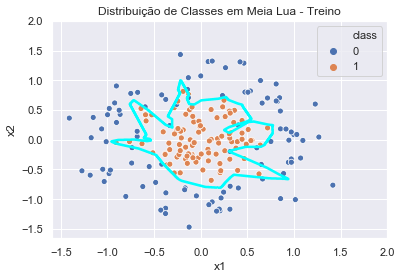

In [55]:
sns.set()
sns.scatterplot(x='x1', y='x2', hue='class', data=data_train)
plt.title('Distribuição de Classes em Meia Lua - Treino')    
plot_plain_separator(mlp, x_train, save=False, grid_range=(-1, 2))

plt.show()

C:\Users\victo\Google Drive\Mestrado\Redes Neurais\Trabalhos\Artigo_03\code\notebooks\utils.py:45: UserWarning: No contour levels were found within the data range.
  plt.contour(x1, x2, z, levels=[0], colors=('cyan',), linewidths=(2.5,))


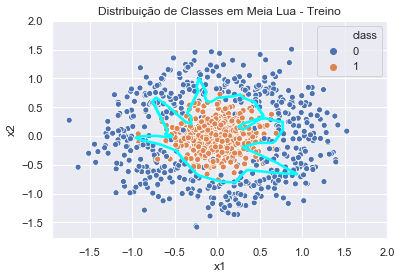

In [56]:
sns.set()
sns.scatterplot(x='x1', y='x2', hue='class', data=data_test)
plt.title('Distribuição de Classes em Meia Lua - Treino')    
plot_plain_separator(mlp, x_train, save=False, grid_range=(-1, 2))

plt.show()

## Run relabeling

## Run training on relabeled dataset

## Generate hyperplane with relabeled dataset